#Data Prepration and Processing

In [ ]:
import re
import unicodedata
import nltk
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from collections import Counter
import csv
random.seed(42)

with open('/kaggle/input/languages1/bot_data_kanuri.txt', 'r', encoding='utf-8') as f:
    bot_data_kanuri = f.read()
with open('/kaggle/input/languages1/human_data_kanuri.txt', 'r', encoding='utf-8') as f:
    human_data_kanuri = f.read()
with open('/kaggle/input/languages1/bot_data_miskito.txt', 'r', encoding='utf-8') as f:
    bot_data_miskito = f.read()
with open('/kaggle/input/languages1/human_data_miskito.txt', 'r', encoding='utf-8') as f:
    human_data_miskito = f.read()


In [ ]:
def summarize_text(text):
  """
  Summarizes the given text by printing the number of words and characters, and the first 20 words.
  """
  # Count the number of words and characters
  num_words = len(text.split())
  num_chars = len(text)

  # Print the summary information
  print(f"Number of words: {num_words}")
  print(f"Number of characters: {num_chars}")

  # Print the first 20 words
  print(f"First 20 words: {text.split()[:20]}")

# Summarize the bot-generated Miskito text
summarize_text(bot_data_miskito)

# Summarize the human-written Miskito text
summarize_text(human_data_miskito)

# Summarize the bot-generated Kanuri text
summarize_text(bot_data_kanuri)

# Summarize the human-written Kanuri text
summarize_text(human_data_kanuri)


Number of words: 18798
Number of characters: 95861
First 20 words: ['Sunsia,', 'mi', 'kai', 'sasbain', 'angla', 'langwiji.', 'Sun', 'taka,', 'mi', 'na', 'inlan', 'miskitu', 'langwiji.', 'Takabri,', 'mi', 'na', 'yulda', 'angla', 'langwiji', 'lang']
Number of words: 41264
Number of characters: 233353
First 20 words: ['Baibil', 'stady', 'ka', 'kum.', 'JAN', 'dukiara.', 'Jisas', 'pana', 'win:', '—Yang', 'sika', 'kli', 'buaia', 'tanka', 'bara', 'rayaka', 'ba', 'sin.', 'Ya', 'yang']
Number of words: 23017
Number of characters: 115700
First 20 words: ['Wannan', 'wani', 'matsala', 'da', 'aka', 'yiwa', 'mini', 'damar', 'rubutun', 'wasa', 'a', 'cikin', 'harshe', 'na', 'Kanuri.', 'Duk', 'da', 'haka,', 'zan', 'yi']
Number of words: 51210
Number of characters: 363884
First 20 words: ['Nodo', 'Kaisar', 'koro', 'Annas-a', 'Kaifas-a', 'ye', 'wurawa', 'ɍimannaye.', 'Jaman', 'adǝn', 'mana', 'Alaye', 'karaan', 'Nawi', 'Yahaya', 'tada', 'Jakariyayero', 'jǝpkeyeno.', 'Daji', 'Yahaya']


In [ ]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
from collections import Counter

def preprocess_text(text):
    # Lowercase and remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text.lower())
    # Tokenize by splitting on whitespace
    tokens = text.split()
    return tokens

def count_frequencies(tokens):
    # Count the frequency of each word
    return Counter(tokens)

def main(corpus_text):
    # Step 1: Preprocess the text
    tokens = preprocess_text(corpus_text)

    # Step 2: Count word frequencies
    word_counts = count_frequencies(tokens)

    # Step 3: Analyze frequencies - display the most common words
    most_common_words = word_counts.most_common(50)

    return most_common_words


corpus_text = human_data_kanuri
print(main(corpus_text))


[('ye', 810), ('yeno', 675), ('tia', 674), ('tiro', 653), ('daji', 583), ('kam', 576), ('isa', 563), ('amma', 558), ('awo', 545), ('duwon', 540), ('koro', 537), ('tayiro', 499), ('am', 474), ('nangaro', 423), ('isaye', 400), ('na', 343), ('laa', 327), ('kla', 298), ('tada', 278), ('nayiro', 255), ('wua', 251), ('ada', 228), ('ti', 221), ('curo', 210), ('bare', 207), ('tayia', 197), ('ad', 190), ('mai', 181), ('yera', 180), ('wo', 177), ('gai', 171), ('nawi', 170), ('isaa', 167), ('nayi', 164), ('sa', 163), ('jauro', 158), ('so', 158), ('wa', 157), ('gni', 154), ('tayi', 150), ('samma', 146), ('wundu', 144), ('wulnjagakki', 143), ('wu', 137), ('yaye', 136), ('yim', 134), ('cne', 134), ('sammaa', 132), ('bi', 127), ('dalilnjud', 121)]


In [ ]:
corpus_text = human_data_miskito
print(main(corpus_text))

[('ba', 2381), ('nani', 1663), ('ra', 1213), ('bara', 1057), ('witin', 738), ('ai', 667), ('man', 596), ('sa', 593), ('jisas', 592), ('kan', 585), ('sin', 498), ('mita', 451), ('yang', 433), ('baku', 378), ('wan', 373), ('wina', 366), ('baha', 345), ('wal', 316), ('naha', 298), ('upla', 294), ('laka', 294), ('gad', 293), ('kum', 279), ('lika', 278), ('bila', 268), ('bamna', 264), ('kasak', 263), ('yawan', 254), ('pali', 252), ('apia', 241), ('gd', 233), ('sut', 222), ('jan', 217), ('kaka', 217), ('na', 213), ('ka', 212), ('uplika', 201), ('sakuna', 190), ('win', 183), ('raya', 180), ('diara', 179), ('dukiara', 169), ('kabia', 168), ('kaia', 165), ('kraist', 163), ('dawan', 160), ('tara', 159), ('mai', 158), ('sika', 157), ('dia', 147)]


In [ ]:
import re
from collections import Counter
def find_frequent_words(text, threshold=150):
    words = text.split()
    word_counts = Counter(words)
    frequent_words = [word for word, count in word_counts.items() if count >= threshold]
    return frequent_words

frequent_words_kanuri_bot = find_frequent_words(human_data_kanuri)
print(frequent_words_kanuri_bot )

['koro', 'ye', 'Nawi', 'tada', 'Daji', 'awo', 'curo', 'na', 'tayiro', 'duwon,', 'tayiro:', 'duwon', 'yeno.', 'tiro:', 'tia', 'kam', 'Koro', 'amma', 'kǝla', 'nayiro', 'laa', 'wua', 'Mai', 'nangaro', 'Isa', 'tiro', 'jauro', 'tayia', 'ti', 'Isaye', 'adǝa', 'am', 'nangaro.', 'Amma', 'yera.']


In [ ]:
import re

# Define morphology classes for Kanuri and Miskito languages
class KanuriMorphology:
    def __init__(self):
        self.prefixes = ['Wann', 'an']
        self.suffixes = {
            'nouns': ['wa'],
            'verbs': ['ni', 'ka', 'ye', 'yi'],
            'adjectives': ['tsala'],
            'adverbs': ['gaw'],
            'pronouns': ['mi'],
            'prepositions': ['damar', 'cikin'],
            'conjunctions': ['da'],
            'interrogative_markers': ['nan'],
            'negation_markers': ['ba']
        }
        self.infixes = ['a', 'ka']

    def tokenize(self, text):
        tokens = []
        words = text.split()
        for word in words:
            current_word = word
            for prefix in self.prefixes:
                if current_word.startswith(prefix):
                    current_word = current_word[len(prefix):]
            for suffix_type, suffix_list in self.suffixes.items():
                for suffix in suffix_list:
                    if current_word.endswith(suffix):
                        current_word = current_word[:-len(suffix)]
            for infix in self.infixes:
                if infix in current_word:
                    parts = current_word.split(infix)
                    current_word = ''.join(parts)
            tokens.append(current_word)
        return tokens

class MiskitoMorphology:
    def __init__(self):
        self.prefixes = ['li', 'ta', 'ka']
        self.suffixes = {
            'nouns': ['ka', 'ma', 'ni'],
            'verbs': ['ka', 'na', 'pi', 'wan'],
            'adjectives': ['la', 'sa', 'na'],
            'adverbs': ['sa', 'la', 'pa'],
            'pronouns': ['li', 'na', 'ta', 'ma'],
            'prepositions': ['sa', 'la', 'na', 'wa'],
            'conjunctions': ['na', 'la', 'ka'],
            'interrogative_markers': ['li', 'sa', 'na'],
            'negation_markers': ['sa', 'la', 'na']
        }

    def tokenize(self, text):
        tokens = []
        words = text.split()
        for word in words:
            current_word = word
            for prefix in self.prefixes:
                if current_word.startswith(prefix):
                    current_word = current_word[len(prefix):]
            for suffix_type, suffix_list in self.suffixes.items():
                for suffix in suffix_list:
                    if current_word.endswith(suffix):
                        current_word = current_word[:-len(suffix)]
            tokens.append(current_word)
        return tokens

# Function to remove stop words
def remove_stop_words(tokens, stopwords):
    return [token for token in tokens if token not in stopwords]

# Function to clean text
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return cleaned_text.strip()

# Stop words lists for both languages
stopwords_kanuri = {
    'ye', 'na', 'amma', 'laa', 'ti', 'am',
    'ni', 'ná', 'ya', 'yi', 'mun', 'mu',
    'ka', 'ku', 'shi', 'ita', 'su', 'wannan',
    'wancan', 'ne', 'da'
}

stopwords_miskito = {
    'ba', 'nani', 'ra', 'bara', 'ai', 'sa', 'kan', 'man', 'sin', 'wan', 'ka', 'na',
    'wal', 'naha', 'gad', 'kum', 'la', 'ta', 'pa', 'wa', 'ma', 'pi', 'li', 'da', 'a', 'kin'
}


# Function to process text through all steps
def process_text(text, morphology, stopwords):
    # Tokenize the text
    tokens = morphology.tokenize(text)
    # Remove stop words
    tokens = remove_stop_words(tokens, stopwords)
    # Clean text
    cleaned_text = clean_text(' '.join(tokens))
    return cleaned_text




# Create instances of the morphology classes
kanuri_morphology = KanuriMorphology()
miskito_morphology = MiskitoMorphology()

# Process texts
processed_kanuri_bot = process_text(bot_data_kanuri, kanuri_morphology, stopwords_kanuri)
processed_kanuri_human = process_text(human_data_kanuri, kanuri_morphology, stopwords_kanuri)
processed_miskito_bot = process_text(bot_data_miskito, miskito_morphology, stopwords_miskito)
processed_miskito_human = process_text(human_data_miskito, miskito_morphology, stopwords_miskito)

# Output the processed texts
print("Processed Kanuri Bot Text:", processed_kanuri_bot)
print("Processed Kanuri Human Text:", processed_kanuri_human)
print("Processed Miskito Bot Text:", processed_miskito_bot)
print("Processed Miskito Human Text:", processed_miskito_human)


Processed Kanuri Bot Text: w m      rubutun ws   hrshe n knuri duk  hk zn  iki  krncin lissfi  wurin nn  knin gskiy  tsreshi mungode g  kwo yyu domin krin byni n kri  hnzri zn yi domin hk zn  wn rubutu  rubutu domin  s ciks  tre   s zm  w mtsl a  rubutu din nn zn  yd buku n littfi mi tsrki john y hn rubutu n by g hk  littfi n kn wnnn  smu hnyoyin gu biyu  ke fuskntr w hny sn  wn littfi kwi wdn hnyoyin gu biyu  kn rubutun idn  iriri  rubutun z  smu bin  yke kwo dg surn rubutun bugu  kri yn  uk  w rubutu domin  gre yn  nzrin    t yin rubutu a  littfin john kwi w m  ke  ryoyin wsu msu krtu h kum kwi w yd ke  mm  gno  rin byni domin tbbtr  wnnn zn  by  kn ryoyin wsu mutne  ke  rubutun domin hk z du ce  smu ryo dg wdn kri wn rubutun bugu  kri  wn rubutun kwi yd z  iy rubutun  wsu rubutu h kum kwi ryo wn  mince dshi  kn rubutun byn smun ryin   buce z iriri rubutun don kri ryoyin yyukn     kn littfin a kn littfi n john kwi wn ryo n msu krtu  kn littfin abin zi iy s ki  msu krtu dliln  fru dom

#Word Embedding

In [ ]:
from gensim.models import Word2Vec
from gensim.models import FastText
import logging
# Train a FastText model
processed_texts_kanuri_bot = [processed_kanuri_bot.split()]
processed_texts_kanuri_human = [processed_kanuri_human.split()]
processed_texts_miskito_bot = [processed_miskito_bot.split()]
processed_texts_miskito_human = [processed_miskito_human.split()]

fasttext_model_kanuri = FastText(processed_texts_kanuri_bot , vector_size=10, window=3, min_count=1, workers=4, sg=1)
fasttext_model_kanuri_human = FastText(processed_texts_kanuri_human, vector_size=10, window=3, min_count=1, workers=4, sg=1)
fasttext_model_miskito = FastText(processed_texts_kanuri_human, vector_size=10, window=3, min_count=1, workers=4, sg=1)
fasttext_model_miskito_human = FastText(processed_texts_kanuri_human, vector_size=10, window=3, min_count=1, workers=4, sg=1)

fasttext_model_kanuri.save("fasttext_gpt_kanuri.model")
print("FastText model trained and saved.")

fasttext_model_kanuri_human.save("fasttext_corpus_kanuri.model")
print("FastText model trained and saved.")

fasttext_model_miskito.save("fasttext_gpt_miskito.model")
print("FastText model trained and saved.")

fasttext_model_miskito_human.save("fasttext_corpus_miskito.model")
print("FastText model trained and saved.")

FastText model trained and saved.
FastText model trained and saved.
FastText model trained and saved.
FastText model trained and saved.


In [ ]:
# Train a Word2Vec model
word2vec_model_kanuri = Word2Vec(processed_texts_kanuri_bot, vector_size=10, window=3, min_count=2, workers=4)
word2vec_model_kanuri_human = Word2Vec(processed_texts_kanuri_human, vector_size=10, window=3, min_count=2, workers=4)
word2vec_model_miskito = Word2Vec(processed_texts_miskito_bot, vector_size=10, window=3, min_count=2, workers=4)
word2vec_model_miskito_human = Word2Vec(processed_texts_miskito_human, vector_size=10, window=3, min_count=2, workers=4)

word2vec_model_kanuri.save("word2vec_gpt_kanuri.model")
print("Word2Vec model trained and saved.")

word2vec_model_kanuri_human.save("word2vec_corpus_kanuri.model")
print("Word2Vec model trained and saved.")

word2vec_model_miskito.save("word2vec_gpt_miskito.model")
print("Word2Vec model trained and saved.")

word2vec_model_miskito_human.save("word2vec_corpus_miskito.model")
print("Word2Vec model trained and saved.")

Word2Vec model trained and saved.
Word2Vec model trained and saved.
Word2Vec model trained and saved.
Word2Vec model trained and saved.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np



# Function to segment text into chunks of 200 words
def segment_text(text, chunk_size=40):
    words = text.split()
    segments = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]
    return segments

# Prepare the segmented corpus
corpus_kanuri_bot = segment_text(processed_kanuri_bot)
corpus_kanuri_human = segment_text(processed_kanuri_human)
corpus_miskito_bot = segment_text(processed_miskito_bot)
corpus_miskito_human = segment_text(processed_miskito_human)

# Print segments to verify
"""print("Kanuri Bot Segments:", corpus_kanuri_bot)
print("Kanuri Human Segments:", corpus_kanuri_human)
print("Miskito Bot Segments:", corpus_miskito_bot)
print("Miskito Human Segments:", corpus_miskito_human)"""

# Load the Universal Sentence Encoder model
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Compute USE embeddings
def compute_use_embeddings(corpus):
    return use_model(corpus).numpy()

vectors_kanuri_bot_use = compute_use_embeddings(corpus_kanuri_bot)
vectors_kanuri_human_use = compute_use_embeddings(corpus_kanuri_human)
vectors_miskito_bot_use = compute_use_embeddings(corpus_miskito_bot)
vectors_miskito_human_use = compute_use_embeddings(corpus_miskito_human)

print(f"Kanuri Bot USE Embedding Shape: {vectors_kanuri_bot_use.shape}")
print(f"Kanuri Human USE Embedding Shape: {vectors_kanuri_human_use.shape}")
print(f"Miskito Bot USE Embedding Shape: {vectors_miskito_bot_use.shape}")
print(f"Miskito Human USE Embedding Shape: {vectors_miskito_human_use.shape}")

# Optionally, save the embeddings
np.save("kanuri_bot_use.npy", vectors_kanuri_bot_use)
np.save("kanuri_human_use.npy", vectors_kanuri_human_use)
np.save("miskito_bot_use.npy", vectors_miskito_bot_use)
np.save("miskito_human_use.npy", vectors_miskito_human_use)


2024-05-17 05:48:19.697607: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 05:48:19.697770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 05:48:19.847939: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Kanuri Bot USE Embedding Shape: (440, 512)
Kanuri Human USE Embedding Shape: (1234, 512)
Miskito Bot USE Embedding Shape: (385, 512)
Miskito Human USE Embedding Shape: (739, 512)


In [ ]:
# Get the number of unique segments
unique_segments_sizes = {
    "Kanuri Bot USE": len(np.unique(processed_texts_kanuri_bot)),
    "Kanuri Human USE": len(np.unique(processed_texts_kanuri_human)),
    "Miskito Bot USE": len(np.unique(processed_texts_miskito_bot)),
    "Miskito Human USE": len(np.unique(processed_texts_miskito_human))
}

vals = []
print("Unique Segments Sizes for USE:")
for dataset, size in unique_segments_sizes.items():
    print(f"{dataset}: {size}")
    vals.append(size)

Unique Segments Sizes for USE:
Kanuri Bot USE: 1294
Kanuri Human USE: 7558
Miskito Bot USE: 331
Miskito Human USE: 3592


In [ ]:
from gensim.models import Word2Vec, FastText


# Corpus models
word2vec_corpus_miskito = Word2Vec.load("word2vec_corpus_miskito.model")
word2vec_corpus_kanuri = Word2Vec.load("word2vec_corpus_kanuri.model")
fasttext_corpus_miskito = FastText.load("fasttext_corpus_miskito.model")
fasttext_corpus_kanuri = FastText.load("fasttext_corpus_kanuri.model")

# GPT models
word2vec_gpt_miskito = Word2Vec.load("word2vec_gpt_miskito.model")
word2vec_gpt_kanuri = Word2Vec.load("word2vec_gpt_kanuri.model")
fasttext_gpt_miskito = FastText.load("fasttext_gpt_miskito.model")
fasttext_gpt_kanuri = FastText.load("fasttext_gpt_kanuri.model")

# Extract vocabulary sizes
vocab_sizes = {
    "Corpus Miskito": {
        "Word2Vec": len(word2vec_corpus_miskito.wv),
        "FastText": len(fasttext_corpus_miskito.wv),
        "USE":vals[3]
    },
    "Corpus Kanuri": {
        "Word2Vec": len(word2vec_corpus_kanuri.wv),
        "FastText": len(fasttext_corpus_kanuri.wv),
        "USE":vals[1]
    },
    "GPT Miskito": {
        "Word2Vec": len(word2vec_gpt_miskito.wv),
        "FastText": len(fasttext_gpt_miskito.wv),
        "USE":vals[2]
    },
    "GPT Kanuri": {
        "Word2Vec": len(word2vec_gpt_kanuri.wv),
        "FastText": len(fasttext_gpt_kanuri.wv),
        "USE":vals[0]
    }
}


In [ ]:
import pandas as pd

# Flatten the dictionary into a list of dictionaries for DataFrame creation
data_for_df = []
for dataset, models in vocab_sizes.items():
    for model, size in models.items():
        data_for_df.append({"Dataset": dataset, "Model": model, "Vocabulary Size": size})

# Create DataFrame
df_vocab_sizes = pd.DataFrame(data_for_df)

# Display DataFrame
print(df_vocab_sizes)


           Dataset     Model  Vocabulary Size
0   Corpus Miskito  Word2Vec             1414
1   Corpus Miskito  FastText             7558
2   Corpus Miskito       USE             3592
3    Corpus Kanuri  Word2Vec             4050
4    Corpus Kanuri  FastText             7558
5    Corpus Kanuri       USE             7558
6      GPT Miskito  Word2Vec              243
7      GPT Miskito  FastText             7558
8      GPT Miskito       USE              331
9       GPT Kanuri  Word2Vec              827
10      GPT Kanuri  FastText             1294
11      GPT Kanuri       USE             1294


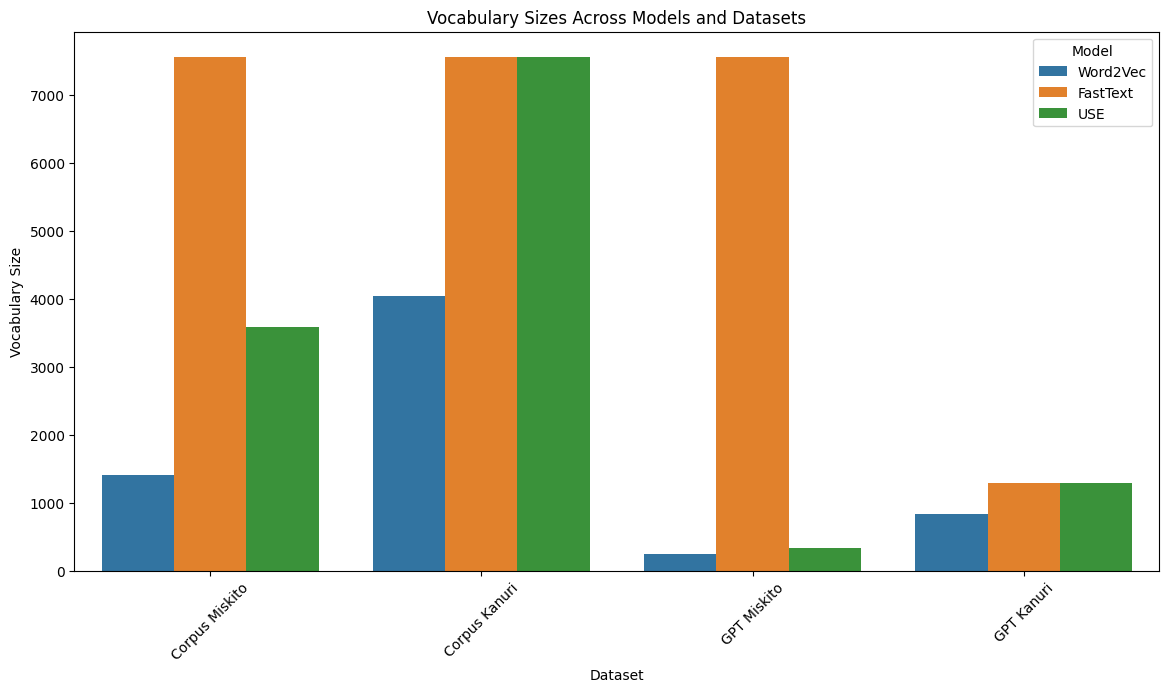

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x="Dataset", y="Vocabulary Size", hue="Model", data=df_vocab_sizes)
plt.title('Vocabulary Sizes Across Models and Datasets')
plt.xticks(rotation=45)
plt.show()


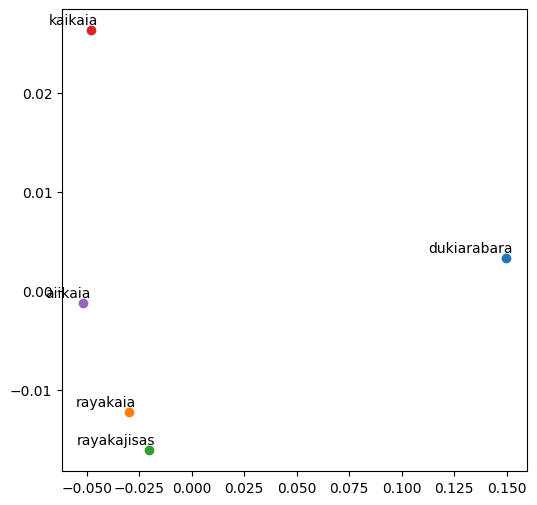

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import FastText
import numpy as np
from sklearn.decomposition import PCA


words =  ['dukiarabara','rayakaia', 'rayakajisas', 'kaikaia', 'aiikaia']
word_vectors = [fasttext_model_miskito_human.wv[word] for word in words]


word_vectors_array = np.array(word_vectors)
pca = PCA(n_components=2)

vectors_2d = pca.fit_transform(word_vectors_array)

# Plotting
plt.figure(figsize=(6, 6))
for i, label in enumerate(words):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()


#Wishart Algorithm

In [ ]:
!pip install hdbscan
!pip install dbscan1d

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 26.0 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl.metadata (3.1 kB)
Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=819466 sha256=3d04de4fc8adda61216928464fd911cbed7b06c83302e59be7475969fe2f281b
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
import warnings
from dbscan1d.core import DBSCAN1D

In [ ]:
from nltk import ngrams
import numpy as np

def generate_ngrams(text_tokens, n=3):
    """ Generate n-grams from the list of tokens. """
    return [ngram for ngram in ngrams(text_tokens, n)]

def ngram_to_vector(ngram, model):
    """ Concatenate word vectors for each word in the n-gram. """
    vector_dim = model.vector_size
    ngram_vector = np.concatenate([model.wv[word] if word in model.wv else np.zeros(vector_dim) for word in ngram])
    return ngram_vector

def create_ngram_dataset(texts, model, n=3):
    """ Create a dataset of n-gram vectors, store only unique n-grams. """
    all_ngrams = []
    all_ngrams_vectors = []
    seen_ngrams = set()  # To track unique n-grams

    for text_tokens in texts:
        ngrams = generate_ngrams(text_tokens, n)
        for ngram in ngrams:
            ngram_tuple = tuple(ngram)  # Convert list to tuple for hashability
            if ngram_tuple not in seen_ngrams:
                seen_ngrams.add(ngram_tuple)
                vector = ngram_to_vector(ngram, model)
                all_ngrams.append(ngram_tuple)
                all_ngrams_vectors.append(vector)

    return all_ngrams, np.array(all_ngrams_vectors)





# Processed texts need to be a list of tokens
processed_texts_kanuri_bot = processed_kanuri_bot.split()
processed_texts_kanuri_human = processed_kanuri_human.split()
processed_texts_miskito_bot = processed_miskito_bot.split()
processed_texts_miskito_human = processed_miskito_human.split()
"""
# Generate datasets and count unique n-grams
ngrams_kanuri_bot, vectors_kanuri_bot = create_ngram_dataset([processed_texts_kanuri_bot], word2vec_corpus_kanuri)
ngrams_kanuri_human, vectors_kanuri_human = create_ngram_dataset([processed_texts_kanuri_human], word2vec_corpus_kanuri)
ngrams_miskito_bot, vectors_miskito_bot = create_ngram_dataset([processed_texts_miskito_bot], word2vec_corpus_miskito)
ngrams_miskito_human, vectors_miskito_human = create_ngram_dataset([processed_texts_miskito_human], word2vec_corpus_miskito)"""


"""vectors_kanuri_bot_use = compute_use_embeddings(corpus_kanuri_bot)
vectors_kanuri_human_use = compute_use_embeddings(corpus_kanuri_human)
vectors_miskito_bot_use = compute_use_embeddings(corpus_miskito_bot)
vectors_miskito_human_use = compute_use_embeddings(corpus_miskito_human)"""

ngrams_kanuri_bot, vectors_kanuri_bot = create_ngram_dataset([processed_texts_kanuri_bot], word2vec_gpt_kanuri)
ngrams_kanuri_human, vectors_kanuri_human = create_ngram_dataset([processed_texts_kanuri_human], word2vec_corpus_kanuri)
ngrams_miskito_bot, vectors_miskito_bot = create_ngram_dataset([processed_texts_miskito_bot], word2vec_gpt_miskito)
ngrams_miskito_human, vectors_miskito_human = create_ngram_dataset([processed_texts_miskito_human], word2vec_corpus_miskito)

ngrams_kanuri_bot_ft, vectors_kanuri_bot_ft = create_ngram_dataset([processed_texts_kanuri_bot], fasttext_gpt_kanuri)
ngrams_kanuri_human_ft, vectors_kanuri_human_ft = create_ngram_dataset([processed_texts_kanuri_human], fasttext_corpus_kanuri)
ngrams_miskito_bot_ft, vectors_miskito_bot_ft = create_ngram_dataset([processed_texts_miskito_bot], fasttext_gpt_miskito)
ngrams_miskito_human_ft, vectors_miskito_human_ft = create_ngram_dataset([processed_texts_miskito_human], fasttext_corpus_miskito)

print(f"Generated {len(ngrams_kanuri_bot)} Kanuri bot n-grams.")
print(f"Generated {len(ngrams_kanuri_human)} Kanuri human n-grams.")
print(f"Generated {len(ngrams_miskito_bot)} Miskito bot n-grams.")
print(f"Generated {len(ngrams_miskito_human)} Miskito human n-grams.")

print("*"*60)

print(f"Generated {len(ngrams_kanuri_bot_ft)} Kanuri bot n-grams.")
print(f"Generated {len(ngrams_kanuri_human_ft)} Kanuri human n-grams.")
print(f"Generated {len(ngrams_miskito_bot_ft)} Miskito bot n-grams.")
print(f"Generated {len(ngrams_miskito_human_ft)} Miskito human n-grams.")


# Function to create n-grams from USE embeddings
def create_ngram_dataset_use(embeddings, n=3):
    all_ngrams = []
    all_ngrams_vectors = []
    seen_ngrams = set()  # To track unique n-grams

    for i in range(len(embeddings) - n + 1):
        ngram_vector = np.concatenate(embeddings[i:i+n])
        ngram_tuple = tuple(ngram_vector)
        if ngram_tuple not in seen_ngrams:
            seen_ngrams.add(ngram_tuple)
            all_ngrams.append(ngram_tuple)
            all_ngrams_vectors.append(ngram_vector)

    return all_ngrams, np.array(all_ngrams_vectors)

# Generate n-grams and their vectors for USE embeddings
ngrams_kanuri_bot_use, vectors_kanuri_bot_use_ngrams = create_ngram_dataset_use(vectors_kanuri_bot_use)
ngrams_kanuri_human_use, vectors_kanuri_human_use_ngrams = create_ngram_dataset_use(vectors_kanuri_human_use)
ngrams_miskito_bot_use, vectors_miskito_bot_use_ngrams = create_ngram_dataset_use(vectors_miskito_bot_use)
ngrams_miskito_human_use, vectors_miskito_human_use_ngrams = create_ngram_dataset_use(vectors_miskito_human_use)
print("*"*60)
print(f"Generated {len(ngrams_kanuri_bot_use)} Kanuri bot n-grams with USE.")
print(f"Generated {len(ngrams_kanuri_human_use)} Kanuri human n-grams with USE.")
print(f"Generated {len(ngrams_miskito_bot_use)} Miskito bot n-grams with USE.")
print(f"Generated {len(ngrams_miskito_human_use)} Miskito human n-grams with USE.")


Generated 12083 Kanuri bot n-grams.
Generated 39676 Kanuri human n-grams.
Generated 2368 Miskito bot n-grams.
Generated 27474 Miskito human n-grams.
************************************************************
Generated 12083 Kanuri bot n-grams.
Generated 39676 Kanuri human n-grams.
Generated 2368 Miskito bot n-grams.
Generated 27474 Miskito human n-grams.
************************************************************
Generated 438 Kanuri bot n-grams with USE.
Generated 1232 Kanuri human n-grams with USE.
Generated 383 Miskito bot n-grams with USE.
Generated 737 Miskito human n-grams with USE.


In [ ]:
import numpy as np
from scipy.special import gamma
from sklearn.neighbors import KDTree
from collections import defaultdict
from tqdm import tqdm

class Wishart:
    def __init__(self, wishart_neighbors, significance_level):
        self.wishart_neighbors = wishart_neighbors  # Number of neighbors
        self.significance_level = significance_level  # Significance level

    def fit(self, X):
        kdt = KDTree(X, metric='euclidean')

        # Query the k-nearest neighbors for each point
        distances, neighbors = kdt.query(X, k=self.wishart_neighbors + 1, return_distance=True)
        neighbors = neighbors[:, 1:]  # Exclude self-neighbor

        # Use the distance to the k-th nearest neighbor
        distances = distances[:, -1]
        indexes = np.argsort(distances)

        size, dim = X.shape
        self.object_labels = np.zeros(size, dtype=int) - 1

        # Initialize clusters and mapping of clusters to objects
        self.clusters = np.array([(1., 1., 0)])
        self.clusters_to_objects = defaultdict(list)
        print('Start clustering')

        for index in indexes:
            neighbors_clusters = np.concatenate([self.object_labels[neighbors[index]], self.object_labels[neighbors[index]]])
            unique_clusters = np.unique(neighbors_clusters).astype(int)
            unique_clusters = unique_clusters[unique_clusters != -1]

            if len(unique_clusters) == 0:
                self._create_new_cluster(index, distances[index])
            else:
                max_cluster = unique_clusters[-1]
                min_cluster = unique_clusters[0]
                if max_cluster == min_cluster:
                    if self.clusters[max_cluster][-1] < 0.5:
                        self._add_elem_to_exist_cluster(index, distances[index], max_cluster)
                    else:
                        self._add_elem_to_noise(index)
                else:
                    my_clusters = self.clusters[unique_clusters]
                    flags = my_clusters[:, -1]
                    if np.min(flags) > 0.5:
                        self._add_elem_to_noise(index)
                    else:
                        significan = np.power(np.maximum(my_clusters[:, 0], 1e-10), -dim) - np.power(np.maximum(my_clusters[:, 1], 1e-10), -dim)
                        significan *= self.wishart_neighbors
                        significan /= size
                        significan /= np.power(np.pi, dim / 2)
                        significan *= gamma(dim / 2 + 1)
                        significan_index = significan >= self.significance_level

                        significan_clusters = unique_clusters[significan_index]
                        not_significan_clusters = unique_clusters[~significan_index]
                        significan_clusters_count = len(significan_clusters)
                        if significan_clusters_count > 1 or min_cluster == 0:
                            self._add_elem_to_noise(index)
                            self.clusters[significan_clusters, -1] = 1
                            for not_sig_cluster in not_significan_clusters:
                                if not_sig_cluster == 0:
                                    continue

                                for bad_index in self.clusters_to_objects[not_sig_cluster]:
                                    self._add_elem_to_noise(bad_index)
                                self.clusters_to_objects[not_sig_cluster].clear()
                        else:
                            for cur_cluster in unique_clusters:
                                if cur_cluster == min_cluster:
                                    continue

                                for bad_index in self.clusters_to_objects[cur_cluster]:
                                    self._add_elem_to_exist_cluster(bad_index, distances[bad_index], min_cluster)
                                self.clusters_to_objects[cur_cluster].clear()

                            self._add_elem_to_exist_cluster(index, distances[index], min_cluster)

        return self.clean_data()

    def clean_data(self):
        unique = np.unique(self.object_labels)
        index = np.argsort(unique)
        if unique[0] != 0:
            index += 1
        true_cluster = {unq: idx for unq, idx in zip(unique, index)}
        result = np.zeros(len(self.object_labels), dtype=int)
        for idx, unq in enumerate(self.object_labels):
            result[idx] = true_cluster[unq]
        return result

    def _add_elem_to_noise(self, index):
        self.object_labels[index] = 0
        self.clusters_to_objects[0].append(index)

    def _create_new_cluster(self, index, dist):
        self.object_labels[index] = len(self.clusters)
        self.clusters_to_objects[len(self.clusters)].append(index)
        self.clusters = np.append(self.clusters, [(dist, dist, 0)], axis=0)

    def _add_elem_to_exist_cluster(self, index, dist, cluster_label):
        self.object_labels[index] = cluster_label
        self.clusters_to_objects[cluster_label].append(index)
        self.clusters[cluster_label][0] = min(self.clusters[cluster_label][0], dist)
        self.clusters[cluster_label][1] = max(self.clusters[cluster_label][1], dist)


class PreTrainWishart:
    def __init__(self, wishart_neighbors, significance_level, distances, neighbors):
        self.wishart_neighbors = wishart_neighbors  # Number of neighbors
        self.significance_level = significance_level  # Significance level
        self.distances = distances
        self.neighbors = neighbors

    def fit(self, X):
        kdt = KDTree(X, metric='euclidean')

        # Use precomputed distances and neighbors
        neighbors = self.neighbors[:, 1:self.wishart_neighbors + 1]
        distances = self.distances[:, self.wishart_neighbors]
        indexes = np.argsort(distances)

        size, dim = X.shape
        self.object_labels = np.zeros(size, dtype=int) - 1

        # Initialize clusters and mapping of clusters to objects
        self.clusters = np.array([(1., 1., 0)])
        self.clusters_to_objects = defaultdict(list)

        for index in indexes:
            neighbors_clusters = np.concatenate([self.object_labels[neighbors[index]], self.object_labels[neighbors[index]]])
            unique_clusters = np.unique(neighbors_clusters).astype(int)
            unique_clusters = unique_clusters[unique_clusters != -1]

            if len(unique_clusters) == 0:
                self._create_new_cluster(index, distances[index])
            else:
                max_cluster = unique_clusters[-1]
                min_cluster = unique_clusters[0]
                if max_cluster == min_cluster:
                    if self.clusters[max_cluster][-1] < 0.5:
                        self._add_elem_to_exist_cluster(index, distances[index], max_cluster)
                    else:
                        self._add_elem_to_noise(index)
                else:
                    my_clusters = self.clusters[unique_clusters]
                    flags = my_clusters[:, -1]
                    if np.min(flags) > 0.5:
                        self._add_elem_to_noise(index)
                    else:
                        significan = np.power(np.maximum(my_clusters[:, 0], 1e-10), -dim) - np.power(np.maximum(my_clusters[:, 1], 1e-10), -dim)
                        significan *= self.wishart_neighbors
                        significan /= size
                        significan /= np.power(np.pi, dim / 2)
                        significan *= gamma(dim / 2 + 1)
                        significan_index = significan >= self.significance_level

                        significan_clusters = unique_clusters[significan_index]
                        not_significan_clusters = unique_clusters[~significan_index]
                        significan_clusters_count = len(significan_clusters)
                        if significan_clusters_count > 1 or min_cluster == 0:
                            self._add_elem_to_noise(index)
                            self.clusters[significan_clusters, -1] = 1
                            for not_sig_cluster in not_significan_clusters:
                                if not_sig_cluster == 0:
                                    continue

                                for bad_index in self.clusters_to_objects[not_sig_cluster]:
                                    self._add_elem_to_noise(bad_index)
                                self.clusters_to_objects[not_sig_cluster].clear()
                        else:
                            for cur_cluster in unique_clusters:
                                if cur_cluster == min_cluster:
                                    continue

                                for bad_index in self.clusters_to_objects[cur_cluster]:
                                    self._add_elem_to_exist_cluster(bad_index, distances[bad_index], min_cluster)
                                self.clusters_to_objects[cur_cluster].clear()

                            self._add_elem_to_exist_cluster(index, distances[index], min_cluster)

        return self.clean_data()

    def clean_data(self):
        unique = np.unique(self.object_labels)
        index = np.argsort(unique)
        if unique[0] != 0:
            index += 1
        true_cluster = {unq: idx for unq, idx in zip(unique, index)}
        result = np.zeros(len(self.object_labels), dtype=int)
        for idx, unq in enumerate(self.object_labels):
            result[idx] = true_cluster[unq]
        return result

    def _add_elem_to_noise(self, index):
        self.object_labels[index] = 0
        self.clusters_to_objects[0].append(index)

    def _create_new_cluster(self, index, dist):
        self.object_labels[index] = len(self.clusters)
        self.clusters_to_objects[len(self.clusters)].append(index)
        self.clusters = np.append(self.clusters, [(dist, dist, 0)], axis=0)

    def _add_elem_to_exist_cluster(self, index, dist, cluster_label):
        self.object_labels[index] = cluster_label
        self.clusters_to_objects[cluster_label].append(index)
        self.clusters[cluster_label][0] = min(self.clusters[cluster_label][0], dist)
        self.clusters[cluster_label][1] = max(self.clusters[cluster_label][1], dist)



In [ ]:
import numpy as np
from scipy.special import gamma
from sklearn.neighbors import KDTree
from collections import defaultdict
from tqdm import tqdm

class Wishart:
    def __init__(self, wishart_neighbors, significance_level):
        self.wishart_neighbors = wishart_neighbors  # Number of neighbors
        self.significance_level = significance_level  # Significance level

    def fit(self, X):
        kdt = KDTree(X, metric='euclidean')

        # Query the k-nearest neighbors for each point
        distances, neighbors = kdt.query(X, k=self.wishart_neighbors + 1, return_distance=True)
        neighbors = neighbors[:, 1:]  # Exclude self-neighbor

        # Use the distance to the k-th nearest neighbor
        distances = distances[:, -1]
        indexes = np.argsort(distances)

        size, dim = X.shape
        self.object_labels = np.zeros(size, dtype=int) - 1

        # Initialize clusters and mapping of clusters to objects
        self.clusters = np.array([(1., 1., 0)])
        self.clusters_to_objects = defaultdict(list)
        print('Start clustering')

        for index in indexes:
            neighbors_clusters = np.concatenate([self.object_labels[neighbors[index]], self.object_labels[neighbors[index]]])
            unique_clusters = np.unique(neighbors_clusters).astype(int)
            unique_clusters = unique_clusters[unique_clusters != -1]

            if len(unique_clusters) == 0:
                self._create_new_cluster(index, distances[index])
            else:
                max_cluster = unique_clusters[-1]
                min_cluster = unique_clusters[0]
                if max_cluster == min_cluster:
                    if self.clusters[max_cluster][-1] < 0.5:
                        self._add_elem_to_exist_cluster(index, distances[index], max_cluster)
                    else:
                        self._add_elem_to_noise(index)
                else:
                    my_clusters = self.clusters[unique_clusters]
                    flags = my_clusters[:, -1]
                    if np.min(flags) > 0.5:
                        self._add_elem_to_noise(index)
                    else:
                        significan = np.power(np.maximum(my_clusters[:, 0], 1e-10), -dim) - np.power(np.maximum(my_clusters[:, 1], 1e-10), -dim)
                        significan *= self.wishart_neighbors
                        significan /= size
                        significan /= np.power(np.pi, dim / 2)
                        significan *= gamma(dim / 2 + 1)
                        significan_index = significan >= self.significance_level

                        significan_clusters = unique_clusters[significan_index]
                        not_significan_clusters = unique_clusters[~significan_index]
                        significan_clusters_count = len(significan_clusters)
                        if significan_clusters_count > 1 or min_cluster == 0:
                            self._add_elem_to_noise(index)
                            self.clusters[significan_clusters, -1] = 1
                            for not_sig_cluster in not_significan_clusters:
                                if not_sig_cluster == 0:
                                    continue

                                for bad_index in self.clusters_to_objects[not_sig_cluster]:
                                    self._add_elem_to_noise(bad_index)
                                self.clusters_to_objects[not_sig_cluster].clear()
                        else:
                            for cur_cluster in unique_clusters:
                                if cur_cluster == min_cluster:
                                    continue

                                for bad_index in self.clusters_to_objects[cur_cluster]:
                                    self._add_elem_to_exist_cluster(bad_index, distances[bad_index], min_cluster)
                                self.clusters_to_objects[cur_cluster].clear()

                            self._add_elem_to_exist_cluster(index, distances[index], min_cluster)

        return self.clean_data()

    def clean_data(self):
        unique = np.unique(self.object_labels)
        index = np.argsort(unique)
        if unique[0] != 0:
            index += 1
        true_cluster = {unq: idx for unq, idx in zip(unique, index)}
        result = np.zeros(len(self.object_labels), dtype=int)
        for idx, unq in enumerate(self.object_labels):
            result[idx] = true_cluster[unq]
        return result

    def _add_elem_to_noise(self, index):
        self.object_labels[index] = 0
        self.clusters_to_objects[0].append(index)

    def _create_new_cluster(self, index, dist):
        self.object_labels[index] = len(self.clusters)
        self.clusters_to_objects[len(self.clusters)].append(index)
        self.clusters = np.append(self.clusters, [(dist, dist, 0)], axis=0)

    def _add_elem_to_exist_cluster(self, index, dist, cluster_label):
        self.object_labels[index] = cluster_label
        self.clusters_to_objects[cluster_label].append(index)
        self.clusters[cluster_label][0] = min(self.clusters[cluster_label][0], dist)
        self.clusters[cluster_label][1] = max(self.clusters[cluster_label][1], dist)


class PreTrainWishart:
    def __init__(self, wishart_neighbors, significance_level, distances, neighbors):
        self.wishart_neighbors = wishart_neighbors  # Number of neighbors
        self.significance_level = significance_level  # Significance level
        self.distances = distances
        self.neighbors = neighbors

    def fit(self, X):
        kdt = KDTree(X, metric='euclidean')

        # Use precomputed distances and neighbors
        neighbors = self.neighbors[:, 1:self.wishart_neighbors + 1]
        distances = self.distances[:, self.wishart_neighbors]
        indexes = np.argsort(distances)

        size, dim = X.shape
        self.object_labels = np.zeros(size, dtype=int) - 1

        # Initialize clusters and mapping of clusters to objects
        self.clusters = np.array([(1., 1., 0)])
        self.clusters_to_objects = defaultdict(list)

        for index in indexes:
            neighbors_clusters = np.concatenate([self.object_labels[neighbors[index]], self.object_labels[neighbors[index]]])
            unique_clusters = np.unique(neighbors_clusters).astype(int)
            unique_clusters = unique_clusters[unique_clusters != -1]

            if len(unique_clusters) == 0:
                self._create_new_cluster(index, distances[index])
            else:
                max_cluster = unique_clusters[-1]
                min_cluster = unique_clusters[0]
                if max_cluster == min_cluster:
                    if self.clusters[max_cluster][-1] < 0.5:
                        self._add_elem_to_exist_cluster(index, distances[index], max_cluster)
                    else:
                        self._add_elem_to_noise(index)
                else:
                    my_clusters = self.clusters[unique_clusters]
                    flags = my_clusters[:, -1]
                    if np.min(flags) > 0.5:
                        self._add_elem_to_noise(index)
                    else:
                        significan = np.power(np.maximum(my_clusters[:, 0], 1e-10), -dim) - np.power(np.maximum(my_clusters[:, 1], 1e-10), -dim)
                        significan *= self.wishart_neighbors
                        significan /= size
                        significan /= np.power(np.pi, dim / 2)
                        significan *= gamma(dim / 2 + 1)
                        significan_index = significan >= self.significance_level

                        significan_clusters = unique_clusters[significan_index]
                        not_significan_clusters = unique_clusters[~significan_index]
                        significan_clusters_count = len(significan_clusters)
                        if significan_clusters_count > 1 or min_cluster == 0:
                            self._add_elem_to_noise(index)
                            self.clusters[significan_clusters, -1] = 1
                            for not_sig_cluster in not_significan_clusters:
                                if not_sig_cluster == 0:
                                    continue

                                for bad_index in self.clusters_to_objects[not_sig_cluster]:
                                    self._add_elem_to_noise(bad_index)
                                self.clusters_to_objects[not_sig_cluster].clear()
                        else:
                            for cur_cluster in unique_clusters:
                                if cur_cluster == min_cluster:
                                    continue

                                for bad_index in self.clusters_to_objects[cur_cluster]:
                                    self._add_elem_to_exist_cluster(bad_index, distances[bad_index], min_cluster)
                                self.clusters_to_objects[cur_cluster].clear()

                            self._add_elem_to_exist_cluster(index, distances[index], min_cluster)

        return self.clean_data()

    def clean_data(self):
        unique = np.unique(self.object_labels)
        index = np.argsort(unique)
        if unique[0] != 0:
            index += 1
        true_cluster = {unq: idx for unq, idx in zip(unique, index)}
        result = np.zeros(len(self.object_labels), dtype=int)
        for idx, unq in enumerate(self.object_labels):
            result[idx] = true_cluster[unq]
        return result

    def _add_elem_to_noise(self, index):
        self.object_labels[index] = 0
        self.clusters_to_objects[0].append(index)

    def _create_new_cluster(self, index, dist):
        self.object_labels[index] = len(self.clusters)
        self.clusters_to_objects[len(self.clusters)].append(index)
        self.clusters = np.append(self.clusters, [(dist, dist, 0)], axis=0)

    def _add_elem_to_exist_cluster(self, index, dist, cluster_label):
        self.object_labels[index] = cluster_label
        self.clusters_to_objects[cluster_label].append(index)
        self.clusters[cluster_label][0] = min(self.clusters[cluster_label][0], dist)
        self.clusters[cluster_label][1] = max(self.clusters[cluster_label][1], dist)

# Instantiate the Wishart clustering model
wishart_neighbors = 20  # Set appropriate number of neighbors
significance_level = 0.05  # Set appropriate significance level

wishart = Wishart(wishart_neighbors, significance_level)

# Fit the Wishart model on the vector datasets
labels_kanuri_bot = wishart.fit(vectors_kanuri_bot)
labels_kanuri_human = wishart.fit(vectors_kanuri_human)
labels_miskito_bot = wishart.fit(vectors_miskito_bot)
labels_miskito_human = wishart.fit(vectors_miskito_human)

labels_kanuri_bot_ft = wishart.fit(vectors_kanuri_bot_ft)
labels_kanuri_human_ft = wishart.fit(vectors_kanuri_human_ft)
labels_miskito_bot_ft = wishart.fit(vectors_miskito_bot_ft)
labels_miskito_human_ft = wishart.fit(vectors_miskito_human_ft)

# Print or analyze the clustering results
print('Kanuri Bot Clusters:', np.unique(labels_kanuri_bot))
print('Kanuri Human Clusters:', np.unique(labels_kanuri_human))
print('Miskito Bot Clusters:', np.unique(labels_miskito_bot))
print('Miskito Human Clusters:', np.unique(labels_miskito_human))

print('Kanuri Bot FastText Clusters:', np.unique(labels_kanuri_bot_ft))
print('Kanuri Human FastText Clusters:', np.unique(labels_kanuri_human_ft))
print('Miskito Bot FastText Clusters:', np.unique(labels_miskito_bot_ft))
print('Miskito Human FastText Clusters:', np.unique(labels_miskito_human_ft))

In [ ]:
# Define different parameter sets to experiment with
param_sets = [
    {'wishart_neighbors': 30, 'significance_level': 0.05},
    {'wishart_neighbors': 20, 'significance_level': 0.10},
    {'wishart_neighbors': 10, 'significance_level': 0.15},
    {'wishart_neighbors': 50, 'significance_level': 0.05},
    {'wishart_neighbors': 40, 'significance_level': 0.10},
    {'wishart_neighbors': 30, 'significance_level': 0.10}
]

# Function to run clustering with different parameters
def run_wishart_clustering(vectors, param_set):
    wishart = Wishart(param_set['wishart_neighbors'], param_set['significance_level'])
    return wishart.fit(vectors)

# Adjust parameters and run clustering again for each dataset
for params in param_sets:
    print(f"Running Wishart Clustering with params: {params}")

    labels_kanuri_bot = run_wishart_clustering(vectors_kanuri_bot, params)
    labels_kanuri_human = run_wishart_clustering(vectors_kanuri_human, params)
    labels_miskito_bot = run_wishart_clustering(vectors_miskito_bot, params)
    labels_miskito_human = run_wishart_clustering(vectors_miskito_human, params)

    labels_kanuri_bot_ft = run_wishart_clustering(vectors_kanuri_bot_ft, params)
    labels_kanuri_human_ft = run_wishart_clustering(vectors_kanuri_human_ft, params)
    labels_miskito_bot_ft = run_wishart_clustering(vectors_miskito_bot_ft, params)
    labels_miskito_human_ft = run_wishart_clustering(vectors_miskito_human_ft, params)

    # Print or analyze the clustering results
    print('Kanuri Bot Clusters:', np.unique(labels_kanuri_bot))
    print('Kanuri Human Clusters:', np.unique(labels_kanuri_human))
    print('Miskito Bot Clusters:', np.unique(labels_miskito_bot))
    print('Miskito Human Clusters:', np.unique(labels_miskito_human))
    print('Kanuri Bot FastText Clusters:', np.unique(labels_kanuri_bot_ft))
    print('Kanuri Human FastText Clusters:', np.unique(labels_kanuri_human_ft))
    print('Miskito Bot FastText Clusters:', np.unique(labels_miskito_bot_ft))
    print('Miskito Human FastText Clusters:', np.unique(labels_miskito_human_ft))


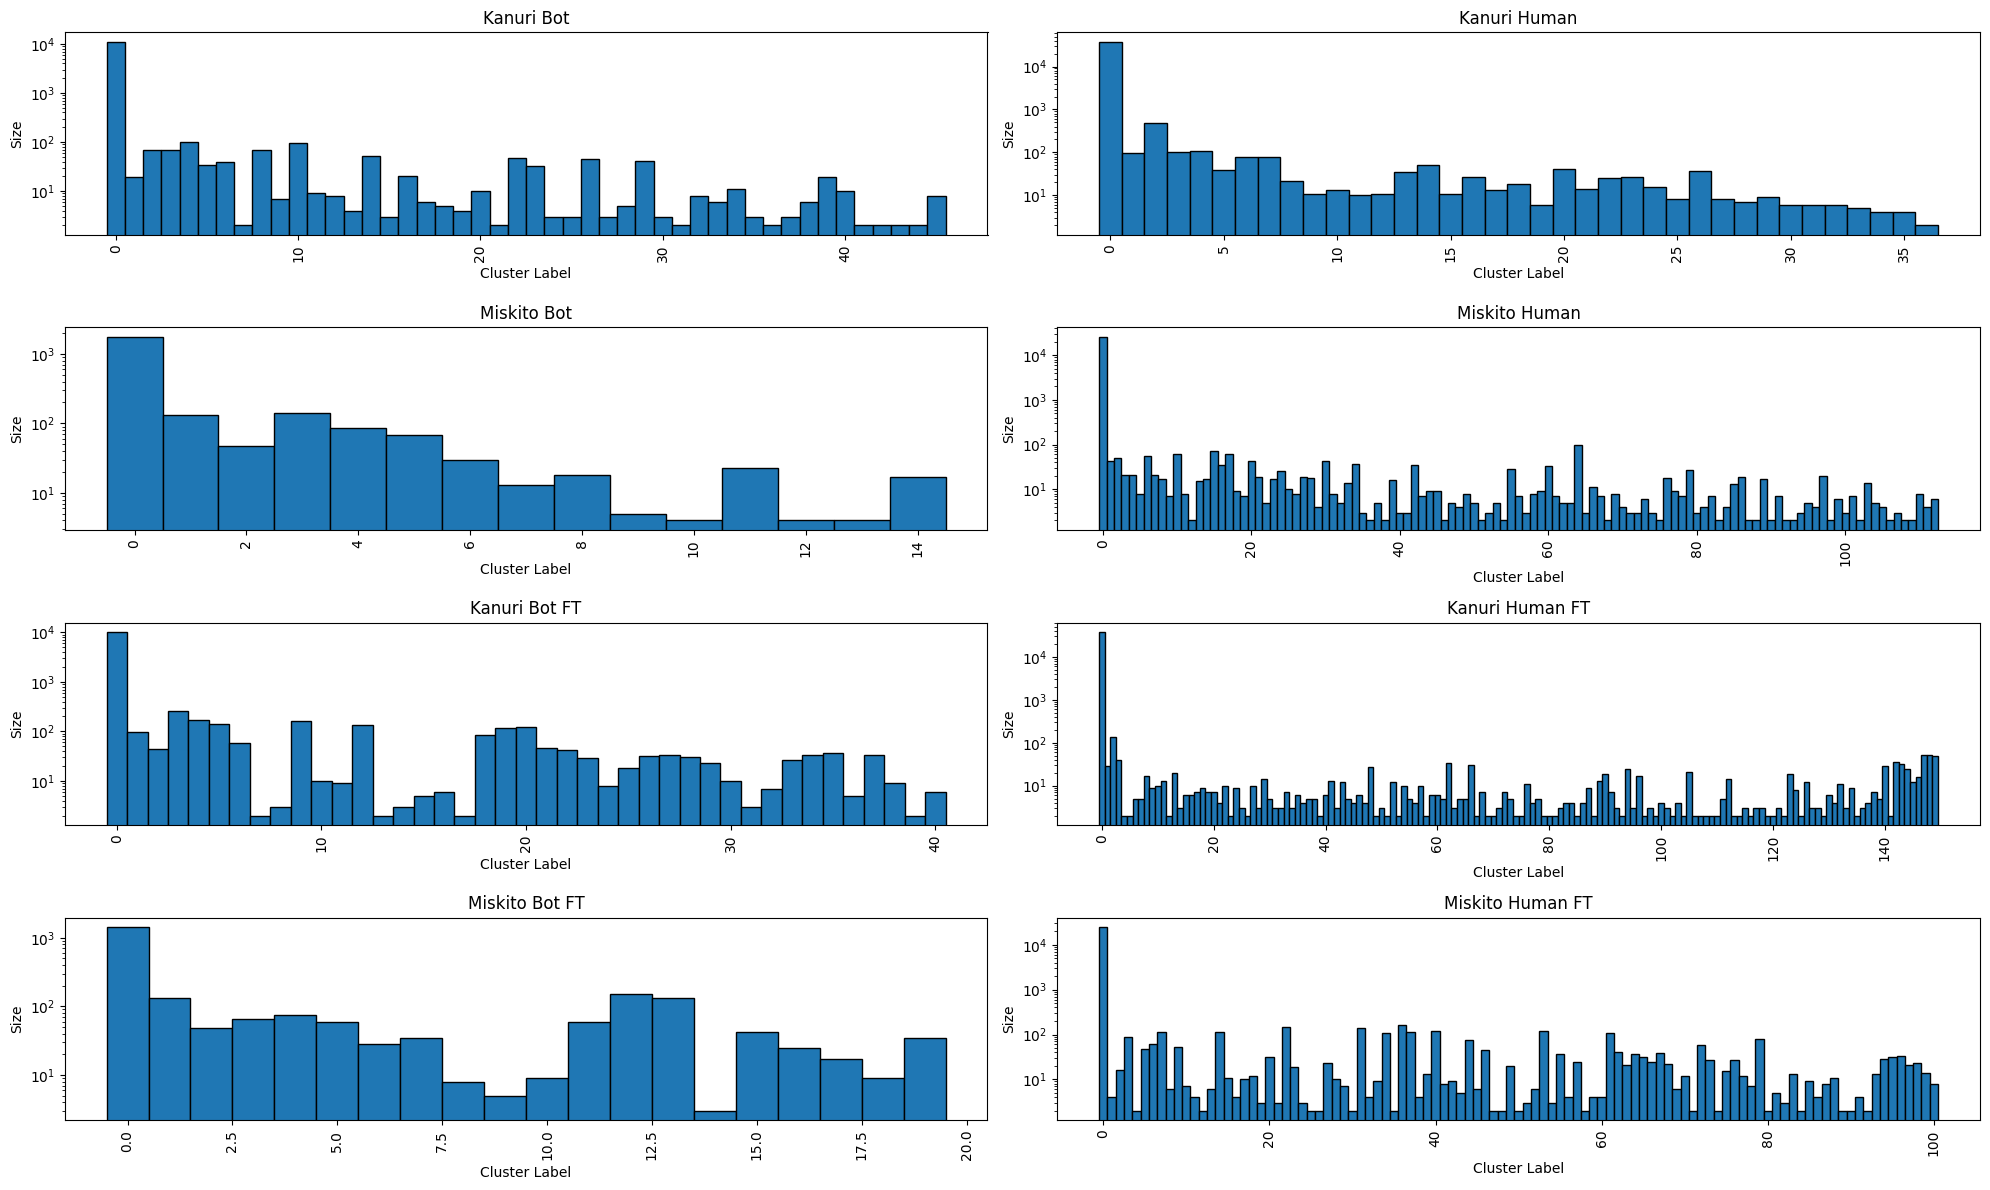

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Create a list of all labels for easy iteration
label_sets = [labels_kanuri_bot, labels_kanuri_human, labels_miskito_bot, labels_miskito_human,
              labels_kanuri_bot_ft, labels_kanuri_human_ft, labels_miskito_bot_ft, labels_miskito_human_ft]
titles = ["Kanuri Bot", "Kanuri Human", "Miskito Bot", "Miskito Human",
          "Kanuri Bot FT", "Kanuri Human FT", "Miskito Bot FT", "Miskito Human FT"]

# Plotting
plt.figure(figsize=(20, 12))
for i, labels in enumerate(label_sets, 1):
    plt.subplot(4, 2, i)
    cluster_sizes = Counter(labels)
    sorted_cluster_sizes = sorted(cluster_sizes.items())
    sorted_labels, sorted_sizes = zip(*sorted_cluster_sizes)

    plt.bar(sorted_labels, sorted_sizes, width=1.0, edgecolor="black")
    plt.title(titles[i-1])
    plt.xlabel('Cluster Label')
    plt.ylabel('Size')
    plt.yscale('log')  # Logarithmic scale
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Processing Miskito Human USE: 100%|██████████| 199/199 [00:12<00:00, 16.33it/s]


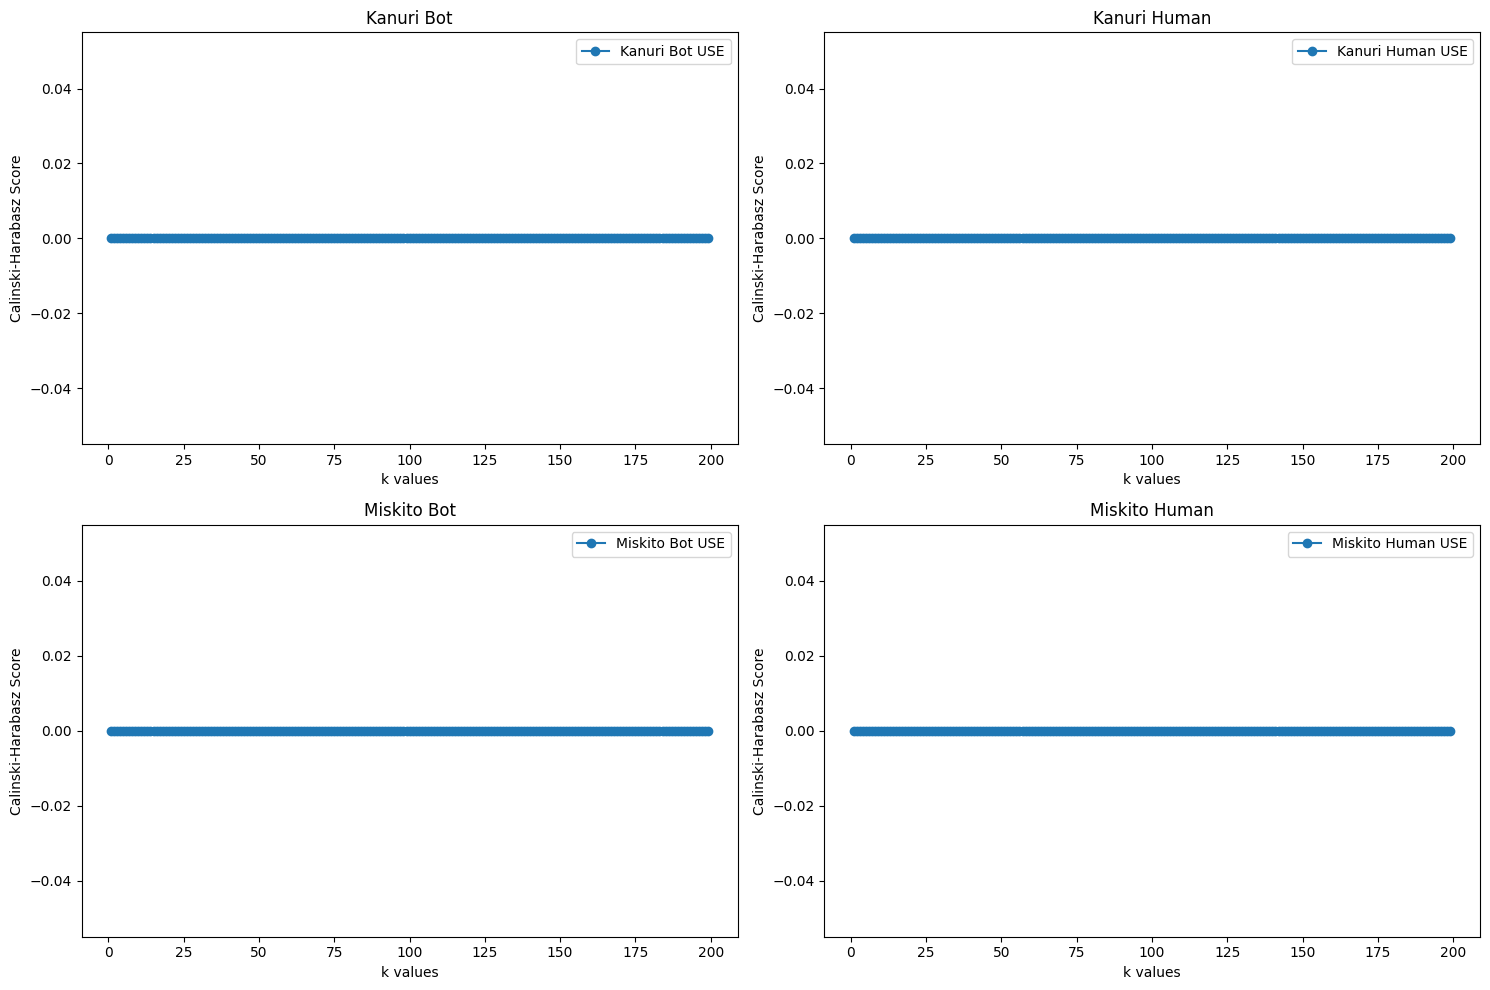

Best k values for each dataset:
Kanuri Bot USE: 0
Kanuri Human USE: 0
Miskito Bot USE: 0
Miskito Human USE: 0


In [ ]:
# Define the datasets and their labels for easier management
# Define the datasets and their labels for easier management
languages = ['Kanuri', 'Miskito']
types = ['Bot', 'Human']
datasets = {
    'Kanuri Bot USE': vectors_kanuri_bot_use_ngrams,
    'Kanuri Human USE': vectors_kanuri_human_use_ngrams,
    'Miskito Bot USE': vectors_miskito_bot_use_ngrams,
    'Miskito Human USE': vectors_miskito_human_use_ngrams
}

# Define k and h values for each dataset
k_h_values = {
    'Kanuri Bot USE': {'k': 10, 'h': 15},
    'Kanuri Human USE': {'k': 58, 'h': 15},
    'Miskito Bot USE': {'k': 22, 'h': 15},
    'Miskito Human USE': {'k': 59, 'h': 15}
}

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust subplot grid as necessary
axs = axs.flatten()
best_k_values = []

for idx, (lang_type, vectors) in enumerate(datasets.items()):
    k_values = range(1, 200)
    ch_scores = []
    max_ch_score = 0
    best_k = 0

    for k in tqdm(k_values, desc=f"Processing {lang_type}"):
        wishart = DBSCAN(eps=k_h_values[lang_type]['h'], min_samples=k)  # Update to use DBSCAN for Wishart clustering
        labels = wishart.fit_predict(vectors)
        if np.unique(labels).size > 1:  # Ensure there's more than one cluster
            ch_score = calinski_harabasz_score(vectors, labels)
            ch_scores.append(ch_score)
            if ch_score > max_ch_score:
                max_ch_score = ch_score
                best_k = k
        else:
            ch_scores.append(0)  # Assign a zero score if only one cluster

    best_k_values.append(best_k)  # Append the best k for this dataset

    # Select the appropriate subplot based on language and type
    if 'Kanuri' in lang_type:
        plot_index = 0 if 'Bot' in lang_type else 1
    else:  # Miskito
        plot_index = 2 if 'Bot' in lang_type else 3

    # Plotting
    axs[plot_index].plot(k_values, ch_scores, marker='o', linestyle='-', label=f'{lang_type}')
    axs[plot_index].set_title(f'{languages[plot_index // 2]} {types[plot_index % 2]}')
    axs[plot_index].set_xlabel('k values')
    axs[plot_index].set_ylabel('Calinski-Harabasz Score')
    axs[plot_index].legend()

plt.tight_layout()
plt.show()

print("Best k values for each dataset:")
for name, k in zip(datasets, best_k_values):
    print(f"{name}: {k}")

Processing Kanuri Bot USE:   0%|          | 0/58 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Processing Kanuri Bot USE:   2%|▏         | 1/58 [00:00<00:26,  2.14it/s]/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Processing Kanuri Bot USE:   3%|▎         | 2/58 [00:01<00:29,  1.93it/s]/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Processing Kanuri Bot USE:   5%|▌         | 3/58 [00:01<00:30,  1.81it/s]/opt/conda/lib/py

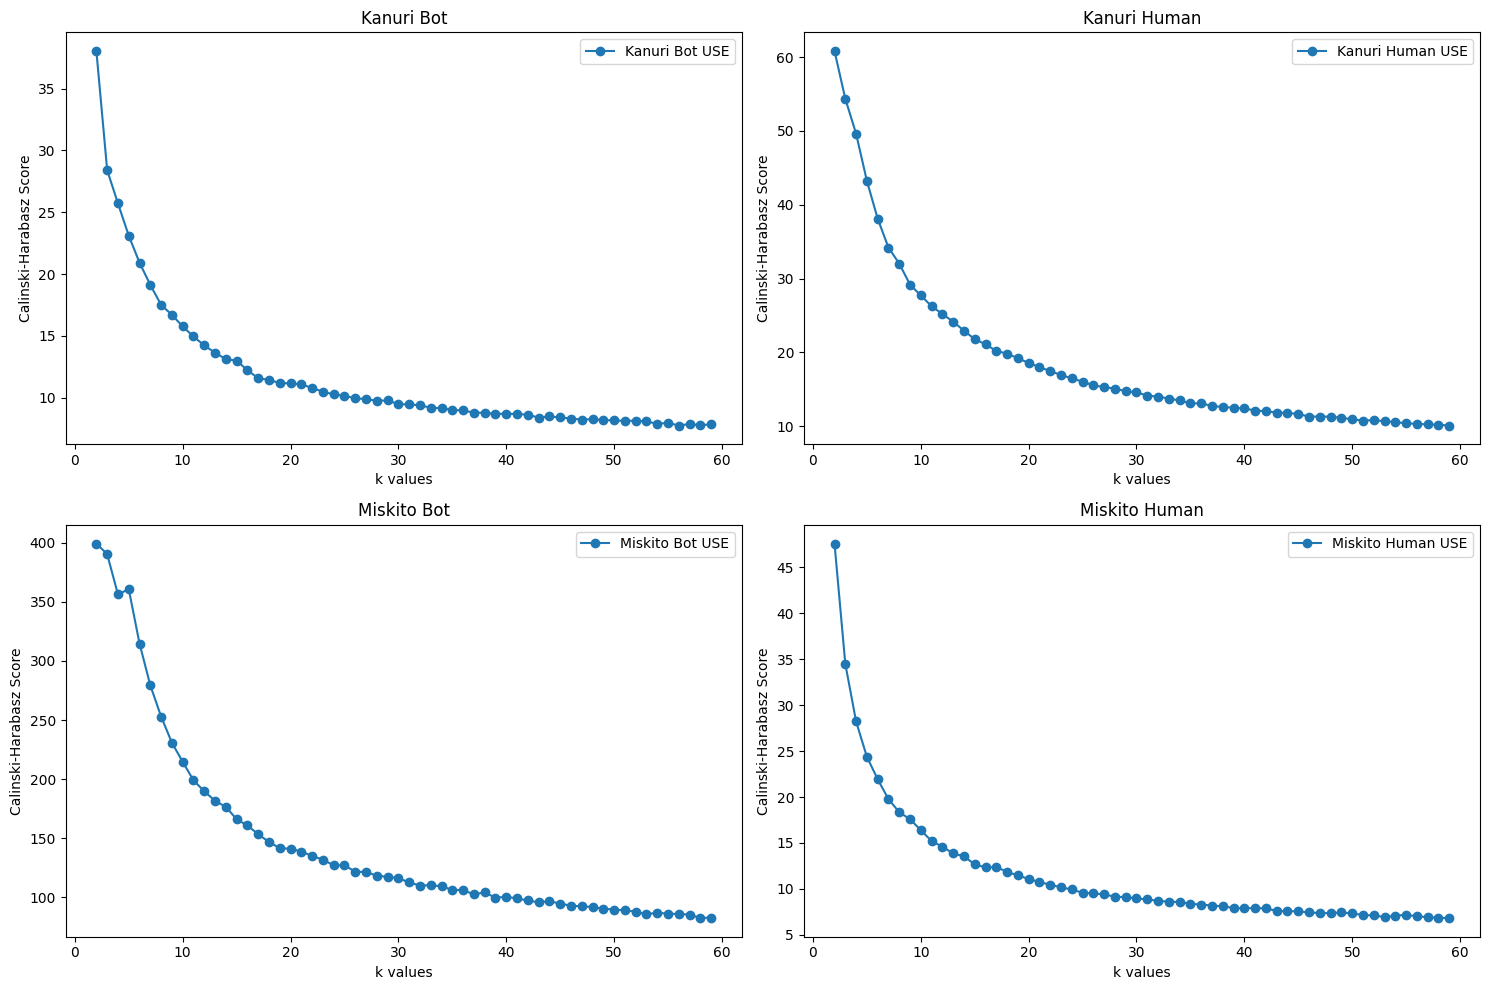

Best k values for each dataset:
Kanuri Bot USE: 2
Kanuri Human USE: 2
Miskito Bot USE: 2
Miskito Human USE: 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from tqdm import tqdm
import tensorflow_hub as hub

# Load Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Function to create n-grams for USE embeddings
def create_ngram_dataset_use(vectors, n=3):
    all_ngrams = []
    all_ngrams_vectors = []
    for i in range(len(vectors) - n + 1):
        ngram = vectors[i:i + n]
        ngram_vector = np.mean(ngram, axis=0)  # Average the n-gram vectors
        all_ngrams.append(ngram)
        all_ngrams_vectors.append(ngram_vector)
    return all_ngrams, np.array(all_ngrams_vectors)

# Assuming vectors_kanuri_bot_use, vectors_kanuri_human_use, vectors_miskito_bot_use, vectors_miskito_human_use are defined
ngrams_kanuri_bot_use, vectors_kanuri_bot_use_ngrams = create_ngram_dataset_use(vectors_kanuri_bot_use)
ngrams_kanuri_human_use, vectors_kanuri_human_use_ngrams = create_ngram_dataset_use(vectors_kanuri_human_use)
ngrams_miskito_bot_use, vectors_miskito_bot_use_ngrams = create_ngram_dataset_use(vectors_miskito_bot_use)
ngrams_miskito_human_use, vectors_miskito_human_use_ngrams = create_ngram_dataset_use(vectors_miskito_human_use)

# Define the datasets and their labels for easier management
datasets = {
    'Kanuri Bot USE': vectors_kanuri_bot_use_ngrams,
    'Kanuri Human USE': vectors_kanuri_human_use_ngrams,
    'Miskito Bot USE': vectors_miskito_bot_use_ngrams,
    'Miskito Human USE': vectors_miskito_human_use_ngrams
}

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust subplot grid as necessary
axs = axs.flatten()
best_k_values = []

for idx, (lang_type, vectors) in enumerate(datasets.items()):
    k_values = range(2, 60)
    ch_scores = []
    max_ch_score = 0
    best_k = 0

    for k in tqdm(k_values, desc=f"Processing {lang_type}"):
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit_predict(vectors)
        if np.unique(labels).size > 1:  # Ensure there's more than one cluster
            ch_score = calinski_harabasz_score(vectors, labels)
            ch_scores.append(ch_score)
            if ch_score > max_ch_score:
                max_ch_score = ch_score
                best_k = k
        else:
            ch_scores.append(0)  # Assign a zero score if only one cluster

    best_k_values.append(best_k)  # Append the best k for this dataset

    # Select the appropriate subplot based on language and type
    if 'Kanuri' in lang_type:
        plot_index = 0 if 'Bot' in lang_type else 1
    else:  # Miskito
        plot_index = 2 if 'Bot' in lang_type else 3

    # Plotting
    axs[plot_index].plot(k_values, ch_scores, marker='o', linestyle='-', label=f'{lang_type}')
    axs[plot_index].set_title(f'{languages[plot_index // 2]} {types[plot_index % 2]}')
    axs[plot_index].set_xlabel('k values')
    axs[plot_index].set_ylabel('Calinski-Harabasz Score')
    axs[plot_index].legend()

plt.tight_layout()
plt.show()

print("Best k values for each dataset:")
for name, k in zip(datasets, best_k_values):
    print(f"{name}: {k}")


Processing Kanuri Bot Word2Vec:   0%|          | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Kanuri Bot Word2Vec:   1%|          | 1/100 [00:01<02:20,  1.42s/it]

Start clustering


Processing Kanuri Bot Word2Vec:   2%|▏         | 2/100 [00:02<02:20,  1.43s/it]

Start clustering


Processing Kanuri Bot Word2Vec:   3%|▎         | 3/100 [00:04<02:21,  1.46s/it]

Start clustering


Processing Kanuri Bot Word2Vec:   4%|▍         | 4/100 [00:05<02:21,  1.47s/it]

Start clustering


Processing Kanuri Bot Word2Vec:   5%|▌         | 5/100 [00:07<02:21,  1.49s/it]

Start clustering


Processing Kanuri Bot Word2Vec:   6%|▌         | 6/100 [00:08<02:23,  1.53s/it]

Start clustering


Processing Kanuri Bot Word2Vec:   7%|▋         | 7/100 [00:10<02:24,  1.55s/it]

Start clustering


Processing Kanuri Bot Word2Vec:   8%|▊         | 8/100 [00:12<02:23,  1.56s/it]

Start clustering


Processing Kanuri Bot Word2Vec:   9%|▉         | 9/100 [00:13<02:23,  1.57s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  10%|█         | 10/100 [00:15<02:22,  1.58s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  11%|█         | 11/100 [00:16<02:22,  1.60s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  12%|█▏        | 12/100 [00:18<02:22,  1.62s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  13%|█▎        | 13/100 [00:20<02:22,  1.64s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  14%|█▍        | 14/100 [00:22<02:22,  1.65s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  15%|█▌        | 15/100 [00:23<02:21,  1.67s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  16%|█▌        | 16/100 [00:25<02:21,  1.68s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  17%|█▋        | 17/100 [00:27<02:20,  1.70s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  18%|█▊        | 18/100 [00:28<02:20,  1.72s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  19%|█▉        | 19/100 [00:30<02:21,  1.75s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  20%|██        | 20/100 [00:32<02:20,  1.76s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  21%|██        | 21/100 [00:34<02:19,  1.77s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  22%|██▏       | 22/100 [00:36<02:18,  1.78s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  23%|██▎       | 23/100 [00:37<02:18,  1.79s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  24%|██▍       | 24/100 [00:39<02:17,  1.80s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  25%|██▌       | 25/100 [00:41<02:16,  1.82s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  26%|██▌       | 26/100 [00:43<02:15,  1.83s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  27%|██▋       | 27/100 [00:45<02:14,  1.84s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  28%|██▊       | 28/100 [00:47<02:13,  1.85s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  29%|██▉       | 29/100 [00:49<02:13,  1.88s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  30%|███       | 30/100 [00:51<02:12,  1.89s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  31%|███       | 31/100 [00:53<02:10,  1.90s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  32%|███▏      | 32/100 [00:54<02:09,  1.90s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  33%|███▎      | 33/100 [00:56<02:07,  1.91s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  34%|███▍      | 34/100 [00:58<02:06,  1.92s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  35%|███▌      | 35/100 [01:00<02:06,  1.95s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  36%|███▌      | 36/100 [01:02<02:05,  1.96s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  37%|███▋      | 37/100 [01:04<02:03,  1.97s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  38%|███▊      | 38/100 [01:06<02:02,  1.98s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  39%|███▉      | 39/100 [01:08<02:02,  2.00s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  40%|████      | 40/100 [01:10<02:00,  2.02s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  41%|████      | 41/100 [01:12<01:59,  2.03s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  42%|████▏     | 42/100 [01:15<01:58,  2.04s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  43%|████▎     | 43/100 [01:17<01:56,  2.04s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  44%|████▍     | 44/100 [01:19<01:55,  2.06s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  45%|████▌     | 45/100 [01:21<01:52,  2.05s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  46%|████▌     | 46/100 [01:23<01:51,  2.07s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  47%|████▋     | 47/100 [01:25<01:49,  2.07s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  48%|████▊     | 48/100 [01:27<01:48,  2.08s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  49%|████▉     | 49/100 [01:29<01:47,  2.10s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  50%|█████     | 50/100 [01:31<01:45,  2.11s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  51%|█████     | 51/100 [01:33<01:44,  2.13s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  52%|█████▏    | 52/100 [01:36<01:42,  2.14s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  53%|█████▎    | 53/100 [01:38<01:41,  2.15s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  54%|█████▍    | 54/100 [01:40<01:39,  2.15s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  55%|█████▌    | 55/100 [01:42<01:36,  2.15s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  56%|█████▌    | 56/100 [01:44<01:34,  2.15s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  57%|█████▋    | 57/100 [01:46<01:32,  2.15s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  58%|█████▊    | 58/100 [01:49<01:30,  2.16s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  59%|█████▉    | 59/100 [01:51<01:29,  2.18s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  60%|██████    | 60/100 [01:53<01:27,  2.18s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  61%|██████    | 61/100 [01:55<01:25,  2.19s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  62%|██████▏   | 62/100 [01:57<01:23,  2.20s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  63%|██████▎   | 63/100 [02:00<01:21,  2.21s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  64%|██████▍   | 64/100 [02:02<01:19,  2.22s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  65%|██████▌   | 65/100 [02:04<01:18,  2.25s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  66%|██████▌   | 66/100 [02:06<01:16,  2.25s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  67%|██████▋   | 67/100 [02:09<01:14,  2.26s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  68%|██████▊   | 68/100 [02:11<01:12,  2.27s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  69%|██████▉   | 69/100 [02:13<01:10,  2.29s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  70%|███████   | 70/100 [02:16<01:09,  2.30s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  71%|███████   | 71/100 [02:18<01:07,  2.32s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  72%|███████▏  | 72/100 [02:20<01:05,  2.33s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  73%|███████▎  | 73/100 [02:23<01:03,  2.36s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  74%|███████▍  | 74/100 [02:25<01:01,  2.37s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  75%|███████▌  | 75/100 [02:28<00:59,  2.38s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  76%|███████▌  | 76/100 [02:30<00:57,  2.39s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  77%|███████▋  | 77/100 [02:33<00:55,  2.41s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  78%|███████▊  | 78/100 [02:35<00:53,  2.42s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  79%|███████▉  | 79/100 [02:37<00:51,  2.45s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  80%|████████  | 80/100 [02:40<00:48,  2.44s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  81%|████████  | 81/100 [02:42<00:46,  2.44s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  82%|████████▏ | 82/100 [02:45<00:43,  2.43s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  83%|████████▎ | 83/100 [02:47<00:41,  2.44s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  84%|████████▍ | 84/100 [02:50<00:38,  2.44s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  85%|████████▌ | 85/100 [02:52<00:36,  2.44s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  86%|████████▌ | 86/100 [02:55<00:34,  2.43s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  87%|████████▋ | 87/100 [02:57<00:31,  2.44s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  88%|████████▊ | 88/100 [02:59<00:29,  2.45s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  89%|████████▉ | 89/100 [03:02<00:27,  2.47s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  90%|█████████ | 90/100 [03:04<00:24,  2.47s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  91%|█████████ | 91/100 [03:07<00:22,  2.50s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  92%|█████████▏| 92/100 [03:10<00:20,  2.52s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  93%|█████████▎| 93/100 [03:12<00:17,  2.52s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  94%|█████████▍| 94/100 [03:15<00:15,  2.52s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  95%|█████████▌| 95/100 [03:17<00:12,  2.52s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  96%|█████████▌| 96/100 [03:20<00:10,  2.51s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  97%|█████████▋| 97/100 [03:22<00:07,  2.51s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  98%|█████████▊| 98/100 [03:25<00:05,  2.51s/it]

Start clustering


Processing Kanuri Bot Word2Vec:  99%|█████████▉| 99/100 [03:27<00:02,  2.51s/it]

Start clustering


Processing Kanuri Human Word2Vec:   0%|          | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Kanuri Human Word2Vec:   1%|          | 1/100 [00:44<1:13:48, 44.73s/it]

Start clustering


Processing Kanuri Human Word2Vec:   2%|▏         | 2/100 [01:32<1:16:21, 46.75s/it]

Start clustering


Processing Kanuri Human Word2Vec:   3%|▎         | 3/100 [02:22<1:18:01, 48.27s/it]

Start clustering


Processing Kanuri Human Word2Vec:   4%|▍         | 4/100 [03:11<1:17:29, 48.43s/it]

Start clustering


Processing Kanuri Human Word2Vec:   5%|▌         | 5/100 [04:00<1:17:09, 48.73s/it]

Start clustering


Processing Kanuri Human Word2Vec:   6%|▌         | 6/100 [04:53<1:18:18, 49.98s/it]

Start clustering


Processing Kanuri Human Word2Vec:   7%|▋         | 7/100 [05:46<1:19:18, 51.16s/it]

Start clustering


Processing Kanuri Human Word2Vec:   8%|▊         | 8/100 [06:43<1:20:54, 52.76s/it]

Start clustering


Processing Kanuri Human Word2Vec:   9%|▉         | 9/100 [07:38<1:21:18, 53.61s/it]

Start clustering


Processing Kanuri Human Word2Vec:  10%|█         | 10/100 [08:33<1:20:54, 53.94s/it]

Start clustering


Processing Kanuri Human Word2Vec:  11%|█         | 11/100 [09:27<1:20:21, 54.17s/it]

Start clustering


Processing Kanuri Human Word2Vec:  12%|█▏        | 12/100 [10:24<1:20:18, 54.76s/it]

Start clustering


Processing Kanuri Human Word2Vec:  13%|█▎        | 13/100 [11:21<1:20:34, 55.57s/it]

Start clustering


Processing Kanuri Human Word2Vec:  14%|█▍        | 14/100 [12:17<1:19:38, 55.56s/it]

Start clustering


Processing Kanuri Human Word2Vec:  15%|█▌        | 15/100 [13:11<1:18:09, 55.17s/it]

Start clustering


Processing Kanuri Human Word2Vec:  16%|█▌        | 16/100 [14:04<1:16:25, 54.59s/it]

Start clustering


Processing Kanuri Human Word2Vec:  17%|█▋        | 17/100 [14:58<1:15:24, 54.51s/it]

Start clustering


Processing Kanuri Human Word2Vec:  18%|█▊        | 18/100 [15:54<1:14:57, 54.84s/it]

Start clustering


Processing Kanuri Human Word2Vec:  19%|█▉        | 19/100 [16:50<1:14:37, 55.27s/it]

Start clustering


Processing Kanuri Human Word2Vec:  20%|██        | 20/100 [17:47<1:14:10, 55.63s/it]

Start clustering


Processing Kanuri Human Word2Vec:  21%|██        | 21/100 [18:42<1:13:03, 55.49s/it]

Start clustering


Processing Kanuri Human Word2Vec:  22%|██▏       | 22/100 [19:38<1:12:21, 55.66s/it]

Start clustering


Processing Kanuri Human Word2Vec:  23%|██▎       | 23/100 [20:33<1:11:04, 55.38s/it]

Start clustering


Processing Kanuri Human Word2Vec:  24%|██▍       | 24/100 [21:28<1:10:03, 55.31s/it]

Start clustering


Processing Kanuri Human Word2Vec:  25%|██▌       | 25/100 [22:27<1:10:45, 56.61s/it]

Start clustering


Processing Kanuri Human Word2Vec:  26%|██▌       | 26/100 [23:28<1:11:06, 57.66s/it]

Start clustering


Processing Kanuri Human Word2Vec:  27%|██▋       | 27/100 [24:25<1:09:54, 57.47s/it]

Start clustering


Processing Kanuri Human Word2Vec:  28%|██▊       | 28/100 [25:20<1:08:22, 56.99s/it]

Start clustering


Processing Kanuri Human Word2Vec:  29%|██▉       | 29/100 [26:18<1:07:28, 57.02s/it]

Start clustering


Processing Kanuri Human Word2Vec:  30%|███       | 30/100 [27:18<1:07:51, 58.17s/it]

Start clustering


Processing Kanuri Human Word2Vec:  31%|███       | 31/100 [28:15<1:06:12, 57.57s/it]

Start clustering


Processing Kanuri Human Word2Vec:  32%|███▏      | 32/100 [29:14<1:05:49, 58.08s/it]

Start clustering


Processing Kanuri Human Word2Vec:  33%|███▎      | 33/100 [30:15<1:05:45, 58.88s/it]

Start clustering


Processing Kanuri Human Word2Vec:  34%|███▍      | 34/100 [31:15<1:05:14, 59.31s/it]

Start clustering


Processing Kanuri Human Word2Vec:  35%|███▌      | 35/100 [32:14<1:04:06, 59.18s/it]

Start clustering


Processing Kanuri Human Word2Vec:  36%|███▌      | 36/100 [33:14<1:03:20, 59.39s/it]

Start clustering


Processing Kanuri Human Word2Vec:  37%|███▋      | 37/100 [34:14<1:02:42, 59.73s/it]

Start clustering


Processing Kanuri Human Word2Vec:  38%|███▊      | 38/100 [35:15<1:01:59, 59.99s/it]

Start clustering


Processing Kanuri Human Word2Vec:  39%|███▉      | 39/100 [36:13<1:00:20, 59.35s/it]

Start clustering


Processing Kanuri Human Word2Vec:  40%|████      | 40/100 [37:14<59:59, 59.99s/it]  

Start clustering


Processing Kanuri Human Word2Vec:  41%|████      | 41/100 [38:14<59:05, 60.09s/it]

Start clustering


Processing Kanuri Human Word2Vec:  42%|████▏     | 42/100 [39:17<58:55, 60.96s/it]

Start clustering


Processing Kanuri Human Word2Vec:  43%|████▎     | 43/100 [40:20<58:18, 61.38s/it]

Start clustering


Processing Kanuri Human Word2Vec:  44%|████▍     | 44/100 [41:22<57:35, 61.71s/it]

Start clustering


Processing Kanuri Human Word2Vec:  45%|████▌     | 45/100 [42:20<55:26, 60.48s/it]

Start clustering


Processing Kanuri Human Word2Vec:  46%|████▌     | 46/100 [43:17<53:35, 59.55s/it]

Start clustering


Processing Kanuri Human Word2Vec:  47%|████▋     | 47/100 [44:15<52:04, 58.95s/it]

Start clustering


Processing Kanuri Human Word2Vec:  48%|████▊     | 48/100 [45:11<50:23, 58.15s/it]

Start clustering


Processing Kanuri Human Word2Vec:  49%|████▉     | 49/100 [46:08<49:09, 57.83s/it]

Start clustering


Processing Kanuri Human Word2Vec:  50%|█████     | 50/100 [47:06<48:05, 57.71s/it]

Start clustering


Processing Kanuri Human Word2Vec:  51%|█████     | 51/100 [48:05<47:28, 58.13s/it]

Start clustering


Processing Kanuri Human Word2Vec:  52%|█████▏    | 52/100 [49:02<46:18, 57.88s/it]

Start clustering


Processing Kanuri Human Word2Vec:  53%|█████▎    | 53/100 [50:00<45:28, 58.06s/it]

Start clustering


Processing Kanuri Human Word2Vec:  54%|█████▍    | 54/100 [50:59<44:34, 58.13s/it]

Start clustering


Processing Kanuri Human Word2Vec:  55%|█████▌    | 55/100 [51:58<43:53, 58.52s/it]

Start clustering


Processing Kanuri Human Word2Vec:  56%|█████▌    | 56/100 [52:58<43:06, 58.79s/it]

Start clustering


Processing Kanuri Human Word2Vec:  57%|█████▋    | 57/100 [53:57<42:18, 59.04s/it]

Start clustering


Processing Kanuri Human Word2Vec:  58%|█████▊    | 58/100 [55:02<42:30, 60.72s/it]

Start clustering


Processing Kanuri Human Word2Vec:  59%|█████▉    | 59/100 [56:03<41:34, 60.83s/it]

Start clustering


Processing Kanuri Human Word2Vec:  60%|██████    | 60/100 [57:03<40:22, 60.56s/it]

Start clustering


Processing Kanuri Human Word2Vec:  61%|██████    | 61/100 [58:02<39:09, 60.23s/it]

Start clustering


Processing Kanuri Human Word2Vec:  62%|██████▏   | 62/100 [59:04<38:19, 60.51s/it]

Start clustering


Processing Kanuri Human Word2Vec:  63%|██████▎   | 63/100 [1:00:04<37:18, 60.50s/it]

Start clustering


Processing Kanuri Human Word2Vec:  64%|██████▍   | 64/100 [1:01:04<36:14, 60.40s/it]

Start clustering


Processing Kanuri Human Word2Vec:  65%|██████▌   | 65/100 [1:02:04<35:11, 60.32s/it]

Start clustering


Processing Kanuri Human Word2Vec:  66%|██████▌   | 66/100 [1:03:05<34:18, 60.55s/it]

Start clustering


Processing Kanuri Human Word2Vec:  67%|██████▋   | 67/100 [1:04:08<33:39, 61.20s/it]

Start clustering


Processing Kanuri Human Word2Vec:  68%|██████▊   | 68/100 [1:05:11<32:54, 61.70s/it]

Start clustering


Processing Kanuri Human Word2Vec:  69%|██████▉   | 69/100 [1:06:14<32:00, 61.96s/it]

Start clustering


Processing Kanuri Human Word2Vec:  70%|███████   | 70/100 [1:07:15<30:55, 61.86s/it]

Start clustering


Processing Kanuri Human Word2Vec:  71%|███████   | 71/100 [1:08:18<30:00, 62.09s/it]

Start clustering


Processing Kanuri Human Word2Vec:  72%|███████▏  | 72/100 [1:09:18<28:46, 61.65s/it]

Start clustering


Processing Kanuri Human Word2Vec:  73%|███████▎  | 73/100 [1:10:22<28:01, 62.29s/it]

Start clustering


Processing Kanuri Human Word2Vec:  74%|███████▍  | 74/100 [1:11:23<26:49, 61.92s/it]

Start clustering


Processing Kanuri Human Word2Vec:  75%|███████▌  | 75/100 [1:12:24<25:36, 61.47s/it]

Start clustering


Processing Kanuri Human Word2Vec:  76%|███████▌  | 76/100 [1:13:27<24:51, 62.15s/it]

Start clustering


Processing Kanuri Human Word2Vec:  77%|███████▋  | 77/100 [1:14:35<24:27, 63.79s/it]

Start clustering


Processing Kanuri Human Word2Vec:  78%|███████▊  | 78/100 [1:15:40<23:33, 64.23s/it]

Start clustering


Processing Kanuri Human Word2Vec:  79%|███████▉  | 79/100 [1:16:48<22:50, 65.27s/it]

Start clustering


Processing Kanuri Human Word2Vec:  80%|████████  | 80/100 [1:17:57<22:07, 66.36s/it]

Start clustering


Processing Kanuri Human Word2Vec:  81%|████████  | 81/100 [1:19:05<21:10, 66.85s/it]

Start clustering


Processing Kanuri Human Word2Vec:  82%|████████▏ | 82/100 [1:20:11<20:01, 66.77s/it]

Start clustering


Processing Kanuri Human Word2Vec:  83%|████████▎ | 83/100 [1:21:16<18:45, 66.19s/it]

Start clustering


Processing Kanuri Human Word2Vec:  84%|████████▍ | 84/100 [1:22:21<17:32, 65.79s/it]

Start clustering


Processing Kanuri Human Word2Vec:  85%|████████▌ | 85/100 [1:23:26<16:21, 65.41s/it]

Start clustering


Processing Kanuri Human Word2Vec:  86%|████████▌ | 86/100 [1:24:31<15:17, 65.51s/it]

Start clustering


Processing Kanuri Human Word2Vec:  87%|████████▋ | 87/100 [1:25:37<14:10, 65.44s/it]

Start clustering


Processing Kanuri Human Word2Vec:  88%|████████▊ | 88/100 [1:26:43<13:06, 65.56s/it]

Start clustering


Processing Kanuri Human Word2Vec:  89%|████████▉ | 89/100 [1:27:48<12:00, 65.51s/it]

Start clustering


Processing Kanuri Human Word2Vec:  90%|█████████ | 90/100 [1:28:54<10:55, 65.54s/it]

Start clustering


Processing Kanuri Human Word2Vec:  91%|█████████ | 91/100 [1:29:58<09:47, 65.31s/it]

Start clustering


Processing Kanuri Human Word2Vec:  92%|█████████▏| 92/100 [1:31:03<08:41, 65.14s/it]

Start clustering


Processing Kanuri Human Word2Vec:  93%|█████████▎| 93/100 [1:32:09<07:36, 65.24s/it]

Start clustering


Processing Kanuri Human Word2Vec:  94%|█████████▍| 94/100 [1:33:15<06:34, 65.69s/it]

Start clustering


Processing Kanuri Human Word2Vec:  95%|█████████▌| 95/100 [1:34:21<05:28, 65.65s/it]

Start clustering


Processing Kanuri Human Word2Vec:  96%|█████████▌| 96/100 [1:35:27<04:23, 65.77s/it]

Start clustering


Processing Kanuri Human Word2Vec:  97%|█████████▋| 97/100 [1:36:34<03:18, 66.09s/it]

Start clustering


Processing Kanuri Human Word2Vec:  98%|█████████▊| 98/100 [1:37:42<02:13, 66.77s/it]

Start clustering


Processing Kanuri Human Word2Vec:  99%|█████████▉| 99/100 [1:38:49<01:06, 66.91s/it]

Start clustering


Processing Miskito Bot Word2Vec:   1%|          | 1/100 [00:00<00:14,  6.96it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:   4%|▍         | 4/100 [00:00<00:13,  6.89it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:   5%|▌         | 5/100 [00:00<00:13,  6.80it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:   7%|▋         | 7/100 [00:01<00:14,  6.53it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:   9%|▉         | 9/100 [00:01<00:14,  6.37it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:  11%|█         | 11/100 [00:01<00:14,  6.19it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:  13%|█▎        | 13/100 [00:02<00:14,  5.99it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:  15%|█▌        | 15/100 [00:02<00:14,  5.87it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:  17%|█▋        | 17/100 [00:02<00:14,  5.70it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:  19%|█▉        | 19/100 [00:03<00:14,  5.52it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:  21%|██        | 21/100 [00:03<00:14,  5.40it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:  23%|██▎       | 23/100 [00:03<00:14,  5.27it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:  25%|██▌       | 25/100 [00:04<00:14,  5.22it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:  27%|██▋       | 27/100 [00:04<00:14,  5.18it/s]

Start clustering
Start clustering


Processing Miskito Bot Word2Vec:  29%|██▉       | 29/100 [00:05<00:13,  5.10it/s]

Start clustering


Processing Miskito Bot Word2Vec:  30%|███       | 30/100 [00:05<00:13,  5.04it/s]

Start clustering


Processing Miskito Bot Word2Vec:  31%|███       | 31/100 [00:05<00:13,  5.02it/s]

Start clustering


Processing Miskito Bot Word2Vec:  32%|███▏      | 32/100 [00:05<00:13,  4.98it/s]

Start clustering


Processing Miskito Bot Word2Vec:  33%|███▎      | 33/100 [00:05<00:13,  4.95it/s]

Start clustering


Processing Miskito Bot Word2Vec:  34%|███▍      | 34/100 [00:06<00:13,  4.91it/s]

Start clustering


Processing Miskito Bot Word2Vec:  35%|███▌      | 35/100 [00:06<00:13,  4.83it/s]

Start clustering


Processing Miskito Bot Word2Vec:  36%|███▌      | 36/100 [00:06<00:13,  4.77it/s]

Start clustering


Processing Miskito Bot Word2Vec:  37%|███▋      | 37/100 [00:06<00:13,  4.74it/s]

Start clustering


Processing Miskito Bot Word2Vec:  38%|███▊      | 38/100 [00:06<00:13,  4.68it/s]

Start clustering


Processing Miskito Bot Word2Vec:  39%|███▉      | 39/100 [00:07<00:13,  4.62it/s]

Start clustering


Processing Miskito Bot Word2Vec:  40%|████      | 40/100 [00:07<00:13,  4.58it/s]

Start clustering


Processing Miskito Bot Word2Vec:  41%|████      | 41/100 [00:07<00:13,  4.53it/s]

Start clustering


Processing Miskito Bot Word2Vec:  42%|████▏     | 42/100 [00:07<00:12,  4.47it/s]

Start clustering


Processing Miskito Bot Word2Vec:  43%|████▎     | 43/100 [00:08<00:12,  4.45it/s]

Start clustering


Processing Miskito Bot Word2Vec:  44%|████▍     | 44/100 [00:08<00:12,  4.40it/s]

Start clustering


Processing Miskito Bot Word2Vec:  45%|████▌     | 45/100 [00:08<00:12,  4.37it/s]

Start clustering


Processing Miskito Bot Word2Vec:  46%|████▌     | 46/100 [00:08<00:12,  4.36it/s]

Start clustering


Processing Miskito Bot Word2Vec:  47%|████▋     | 47/100 [00:09<00:12,  4.31it/s]

Start clustering


Processing Miskito Bot Word2Vec:  48%|████▊     | 48/100 [00:09<00:12,  4.29it/s]

Start clustering


Processing Miskito Bot Word2Vec:  49%|████▉     | 49/100 [00:09<00:12,  3.97it/s]

Start clustering


Processing Miskito Bot Word2Vec:  50%|█████     | 50/100 [00:09<00:13,  3.82it/s]

Start clustering


Processing Miskito Bot Word2Vec:  51%|█████     | 51/100 [00:10<00:12,  3.90it/s]

Start clustering


Processing Miskito Bot Word2Vec:  52%|█████▏    | 52/100 [00:10<00:12,  3.97it/s]

Start clustering


Processing Miskito Bot Word2Vec:  53%|█████▎    | 53/100 [00:10<00:11,  3.99it/s]

Start clustering


Processing Miskito Bot Word2Vec:  54%|█████▍    | 54/100 [00:10<00:11,  4.05it/s]

Start clustering


Processing Miskito Bot Word2Vec:  55%|█████▌    | 55/100 [00:11<00:11,  4.08it/s]

Start clustering


Processing Miskito Bot Word2Vec:  56%|█████▌    | 56/100 [00:11<00:10,  4.10it/s]

Start clustering


Processing Miskito Bot Word2Vec:  57%|█████▋    | 57/100 [00:11<00:10,  4.10it/s]

Start clustering


Processing Miskito Bot Word2Vec:  58%|█████▊    | 58/100 [00:11<00:10,  4.11it/s]

Start clustering


Processing Miskito Bot Word2Vec:  59%|█████▉    | 59/100 [00:12<00:09,  4.10it/s]

Start clustering


Processing Miskito Bot Word2Vec:  60%|██████    | 60/100 [00:12<00:09,  4.11it/s]

Start clustering


Processing Miskito Bot Word2Vec:  61%|██████    | 61/100 [00:12<00:09,  4.05it/s]

Start clustering


Processing Miskito Bot Word2Vec:  62%|██████▏   | 62/100 [00:12<00:09,  4.01it/s]

Start clustering


Processing Miskito Bot Word2Vec:  63%|██████▎   | 63/100 [00:13<00:09,  4.02it/s]

Start clustering


Processing Miskito Bot Word2Vec:  64%|██████▍   | 64/100 [00:13<00:08,  4.02it/s]

Start clustering


Processing Miskito Bot Word2Vec:  65%|██████▌   | 65/100 [00:13<00:08,  4.01it/s]

Start clustering


Processing Miskito Bot Word2Vec:  66%|██████▌   | 66/100 [00:13<00:08,  3.99it/s]

Start clustering


Processing Miskito Bot Word2Vec:  67%|██████▋   | 67/100 [00:14<00:08,  3.96it/s]

Start clustering


Processing Miskito Bot Word2Vec:  68%|██████▊   | 68/100 [00:14<00:08,  3.94it/s]

Start clustering


Processing Miskito Bot Word2Vec:  69%|██████▉   | 69/100 [00:14<00:07,  3.90it/s]

Start clustering


Processing Miskito Bot Word2Vec:  70%|███████   | 70/100 [00:14<00:07,  3.86it/s]

Start clustering


Processing Miskito Bot Word2Vec:  71%|███████   | 71/100 [00:15<00:07,  3.84it/s]

Start clustering


Processing Miskito Bot Word2Vec:  72%|███████▏  | 72/100 [00:15<00:07,  3.80it/s]

Start clustering


Processing Miskito Bot Word2Vec:  73%|███████▎  | 73/100 [00:15<00:07,  3.77it/s]

Start clustering


Processing Miskito Bot Word2Vec:  74%|███████▍  | 74/100 [00:15<00:06,  3.75it/s]

Start clustering


Processing Miskito Bot Word2Vec:  75%|███████▌  | 75/100 [00:16<00:06,  3.74it/s]

Start clustering


Processing Miskito Bot Word2Vec:  76%|███████▌  | 76/100 [00:16<00:06,  3.71it/s]

Start clustering


Processing Miskito Bot Word2Vec:  77%|███████▋  | 77/100 [00:16<00:06,  3.70it/s]

Start clustering


Processing Miskito Bot Word2Vec:  78%|███████▊  | 78/100 [00:16<00:05,  3.68it/s]

Start clustering


Processing Miskito Bot Word2Vec:  79%|███████▉  | 79/100 [00:17<00:05,  3.69it/s]

Start clustering


Processing Miskito Bot Word2Vec:  80%|████████  | 80/100 [00:17<00:05,  3.69it/s]

Start clustering


Processing Miskito Bot Word2Vec:  81%|████████  | 81/100 [00:17<00:05,  3.69it/s]

Start clustering


Processing Miskito Bot Word2Vec:  82%|████████▏ | 82/100 [00:18<00:04,  3.69it/s]

Start clustering


Processing Miskito Bot Word2Vec:  83%|████████▎ | 83/100 [00:18<00:04,  3.68it/s]

Start clustering


Processing Miskito Bot Word2Vec:  84%|████████▍ | 84/100 [00:18<00:04,  3.67it/s]

Start clustering


Processing Miskito Bot Word2Vec:  85%|████████▌ | 85/100 [00:18<00:04,  3.68it/s]

Start clustering


Processing Miskito Bot Word2Vec:  86%|████████▌ | 86/100 [00:19<00:03,  3.69it/s]

Start clustering


Processing Miskito Bot Word2Vec:  87%|████████▋ | 87/100 [00:19<00:03,  3.70it/s]

Start clustering


Processing Miskito Bot Word2Vec:  88%|████████▊ | 88/100 [00:19<00:03,  3.59it/s]

Start clustering


Processing Miskito Bot Word2Vec:  89%|████████▉ | 89/100 [00:19<00:03,  3.61it/s]

Start clustering


Processing Miskito Bot Word2Vec:  90%|█████████ | 90/100 [00:20<00:02,  3.62it/s]

Start clustering


Processing Miskito Bot Word2Vec:  91%|█████████ | 91/100 [00:20<00:02,  3.63it/s]

Start clustering


Processing Miskito Bot Word2Vec:  92%|█████████▏| 92/100 [00:20<00:02,  3.63it/s]

Start clustering


Processing Miskito Bot Word2Vec:  93%|█████████▎| 93/100 [00:21<00:01,  3.63it/s]

Start clustering


Processing Miskito Bot Word2Vec:  94%|█████████▍| 94/100 [00:21<00:01,  3.63it/s]

Start clustering


Processing Miskito Bot Word2Vec:  95%|█████████▌| 95/100 [00:21<00:01,  3.61it/s]

Start clustering


Processing Miskito Bot Word2Vec:  96%|█████████▌| 96/100 [00:21<00:01,  3.59it/s]

Start clustering


Processing Miskito Bot Word2Vec:  97%|█████████▋| 97/100 [00:22<00:00,  3.60it/s]

Start clustering


Processing Miskito Bot Word2Vec:  98%|█████████▊| 98/100 [00:22<00:00,  3.57it/s]

Start clustering


Processing Miskito Bot Word2Vec:  99%|█████████▉| 99/100 [00:22<00:00,  3.60it/s]

Start clustering


Processing Miskito Bot Word2Vec: 100%|██████████| 100/100 [00:23<00:00,  4.34it/s]


Start clustering


Processing Miskito Human Word2Vec:   0%|          | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Miskito Human Word2Vec:   1%|          | 1/100 [00:03<06:00,  3.65s/it]

Start clustering


Processing Miskito Human Word2Vec:   2%|▏         | 2/100 [00:07<06:00,  3.68s/it]

Start clustering


Processing Miskito Human Word2Vec:   3%|▎         | 3/100 [00:11<05:57,  3.69s/it]

Start clustering


Processing Miskito Human Word2Vec:   4%|▍         | 4/100 [00:14<05:57,  3.72s/it]

Start clustering


Processing Miskito Human Word2Vec:   5%|▌         | 5/100 [00:18<06:01,  3.80s/it]

Start clustering


Processing Miskito Human Word2Vec:   6%|▌         | 6/100 [00:22<06:01,  3.84s/it]

Start clustering


Processing Miskito Human Word2Vec:   7%|▋         | 7/100 [00:26<06:01,  3.89s/it]

Start clustering


Processing Miskito Human Word2Vec:   8%|▊         | 8/100 [00:30<06:01,  3.93s/it]

Start clustering


Processing Miskito Human Word2Vec:   9%|▉         | 9/100 [00:34<06:01,  3.98s/it]

Start clustering


Processing Miskito Human Word2Vec:  10%|█         | 10/100 [00:38<06:02,  4.03s/it]

Start clustering


Processing Miskito Human Word2Vec:  11%|█         | 11/100 [00:43<06:00,  4.05s/it]

Start clustering


Processing Miskito Human Word2Vec:  12%|█▏        | 12/100 [00:47<06:02,  4.12s/it]

Start clustering


Processing Miskito Human Word2Vec:  13%|█▎        | 13/100 [00:51<06:02,  4.17s/it]

Start clustering


Processing Miskito Human Word2Vec:  14%|█▍        | 14/100 [00:55<06:01,  4.20s/it]

Start clustering


Processing Miskito Human Word2Vec:  15%|█▌        | 15/100 [01:00<06:01,  4.25s/it]

Start clustering


Processing Miskito Human Word2Vec:  16%|█▌        | 16/100 [01:04<06:01,  4.30s/it]

Start clustering


Processing Miskito Human Word2Vec:  17%|█▋        | 17/100 [01:09<06:00,  4.34s/it]

Start clustering


Processing Miskito Human Word2Vec:  18%|█▊        | 18/100 [01:13<05:58,  4.37s/it]

Start clustering


Processing Miskito Human Word2Vec:  19%|█▉        | 19/100 [01:18<05:58,  4.43s/it]

Start clustering


Processing Miskito Human Word2Vec:  20%|██        | 20/100 [01:22<05:57,  4.47s/it]

Start clustering


Processing Miskito Human Word2Vec:  21%|██        | 21/100 [01:27<05:52,  4.46s/it]

Start clustering


Processing Miskito Human Word2Vec:  22%|██▏       | 22/100 [01:31<05:49,  4.49s/it]

Start clustering


Processing Miskito Human Word2Vec:  23%|██▎       | 23/100 [01:36<05:46,  4.51s/it]

Start clustering


Processing Miskito Human Word2Vec:  24%|██▍       | 24/100 [01:40<05:45,  4.55s/it]

Start clustering


Processing Miskito Human Word2Vec:  25%|██▌       | 25/100 [01:45<05:42,  4.57s/it]

Start clustering


Processing Miskito Human Word2Vec:  26%|██▌       | 26/100 [01:50<05:42,  4.62s/it]

Start clustering


Processing Miskito Human Word2Vec:  27%|██▋       | 27/100 [01:55<05:42,  4.69s/it]

Start clustering


Processing Miskito Human Word2Vec:  28%|██▊       | 28/100 [01:59<05:39,  4.72s/it]

Start clustering


Processing Miskito Human Word2Vec:  29%|██▉       | 29/100 [02:04<05:36,  4.74s/it]

Start clustering


Processing Miskito Human Word2Vec:  30%|███       | 30/100 [02:09<05:33,  4.77s/it]

Start clustering


Processing Miskito Human Word2Vec:  31%|███       | 31/100 [02:14<05:30,  4.79s/it]

Start clustering


Processing Miskito Human Word2Vec:  32%|███▏      | 32/100 [02:19<05:27,  4.82s/it]

Start clustering


Processing Miskito Human Word2Vec:  33%|███▎      | 33/100 [02:24<05:23,  4.82s/it]

Start clustering


Processing Miskito Human Word2Vec:  34%|███▍      | 34/100 [02:29<05:22,  4.88s/it]

Start clustering


Processing Miskito Human Word2Vec:  35%|███▌      | 35/100 [02:33<05:18,  4.91s/it]

Start clustering


Processing Miskito Human Word2Vec:  36%|███▌      | 36/100 [02:39<05:16,  4.95s/it]

Start clustering


Processing Miskito Human Word2Vec:  37%|███▋      | 37/100 [02:43<05:11,  4.95s/it]

Start clustering


Processing Miskito Human Word2Vec:  38%|███▊      | 38/100 [02:49<05:13,  5.06s/it]

Start clustering


Processing Miskito Human Word2Vec:  39%|███▉      | 39/100 [02:54<05:11,  5.11s/it]

Start clustering


Processing Miskito Human Word2Vec:  40%|████      | 40/100 [02:59<05:12,  5.21s/it]

Start clustering


Processing Miskito Human Word2Vec:  41%|████      | 41/100 [03:05<05:09,  5.25s/it]

Start clustering


Processing Miskito Human Word2Vec:  42%|████▏     | 42/100 [03:10<05:08,  5.32s/it]

Start clustering


Processing Miskito Human Word2Vec:  43%|████▎     | 43/100 [03:16<05:03,  5.33s/it]

Start clustering


Processing Miskito Human Word2Vec:  44%|████▍     | 44/100 [03:21<05:00,  5.36s/it]

Start clustering


Processing Miskito Human Word2Vec:  45%|████▌     | 45/100 [03:26<04:53,  5.33s/it]

Start clustering


Processing Miskito Human Word2Vec:  46%|████▌     | 46/100 [03:32<04:49,  5.36s/it]

Start clustering


Processing Miskito Human Word2Vec:  47%|████▋     | 47/100 [03:37<04:45,  5.38s/it]

Start clustering


Processing Miskito Human Word2Vec:  48%|████▊     | 48/100 [03:43<04:41,  5.42s/it]

Start clustering


Processing Miskito Human Word2Vec:  49%|████▉     | 49/100 [03:48<04:37,  5.43s/it]

Start clustering


Processing Miskito Human Word2Vec:  50%|█████     | 50/100 [03:54<04:32,  5.45s/it]

Start clustering


Processing Miskito Human Word2Vec:  51%|█████     | 51/100 [03:59<04:29,  5.50s/it]

Start clustering


Processing Miskito Human Word2Vec:  52%|█████▏    | 52/100 [04:05<04:24,  5.52s/it]

Start clustering


Processing Miskito Human Word2Vec:  53%|█████▎    | 53/100 [04:10<04:20,  5.54s/it]

Start clustering


Processing Miskito Human Word2Vec:  54%|█████▍    | 54/100 [04:16<04:15,  5.55s/it]

Start clustering


Processing Miskito Human Word2Vec:  55%|█████▌    | 55/100 [04:22<04:11,  5.59s/it]

Start clustering


Processing Miskito Human Word2Vec:  56%|█████▌    | 56/100 [04:27<04:06,  5.61s/it]

Start clustering


Processing Miskito Human Word2Vec:  57%|█████▋    | 57/100 [04:33<04:02,  5.64s/it]

Start clustering


Processing Miskito Human Word2Vec:  58%|█████▊    | 58/100 [04:39<03:58,  5.67s/it]

Start clustering


Processing Miskito Human Word2Vec:  59%|█████▉    | 59/100 [04:45<03:54,  5.71s/it]

Start clustering


Processing Miskito Human Word2Vec:  60%|██████    | 60/100 [04:50<03:49,  5.74s/it]

Start clustering


Processing Miskito Human Word2Vec:  61%|██████    | 61/100 [04:56<03:44,  5.74s/it]

Start clustering


Processing Miskito Human Word2Vec:  62%|██████▏   | 62/100 [05:02<03:39,  5.79s/it]

Start clustering


Processing Miskito Human Word2Vec:  63%|██████▎   | 63/100 [05:08<03:34,  5.79s/it]

Start clustering


Processing Miskito Human Word2Vec:  64%|██████▍   | 64/100 [05:14<03:27,  5.77s/it]

Start clustering


Processing Miskito Human Word2Vec:  65%|██████▌   | 65/100 [05:19<03:22,  5.80s/it]

Start clustering


Processing Miskito Human Word2Vec:  66%|██████▌   | 66/100 [05:25<03:18,  5.84s/it]

Start clustering


Processing Miskito Human Word2Vec:  67%|██████▋   | 67/100 [05:31<03:12,  5.82s/it]

Start clustering


Processing Miskito Human Word2Vec:  68%|██████▊   | 68/100 [05:37<03:06,  5.84s/it]

Start clustering


Processing Miskito Human Word2Vec:  69%|██████▉   | 69/100 [05:43<03:00,  5.83s/it]

Start clustering


Processing Miskito Human Word2Vec:  70%|███████   | 70/100 [05:49<02:56,  5.90s/it]

Start clustering


Processing Miskito Human Word2Vec:  71%|███████   | 71/100 [05:55<02:50,  5.89s/it]

Start clustering


Processing Miskito Human Word2Vec:  72%|███████▏  | 72/100 [06:01<02:46,  5.93s/it]

Start clustering


Processing Miskito Human Word2Vec:  73%|███████▎  | 73/100 [06:07<02:41,  6.00s/it]

Start clustering


Processing Miskito Human Word2Vec:  74%|███████▍  | 74/100 [06:13<02:35,  5.97s/it]

Start clustering


Processing Miskito Human Word2Vec:  75%|███████▌  | 75/100 [06:19<02:30,  6.00s/it]

Start clustering


Processing Miskito Human Word2Vec:  76%|███████▌  | 76/100 [06:25<02:23,  5.98s/it]

Start clustering


Processing Miskito Human Word2Vec:  77%|███████▋  | 77/100 [06:31<02:17,  5.99s/it]

Start clustering


Processing Miskito Human Word2Vec:  78%|███████▊  | 78/100 [06:37<02:12,  6.03s/it]

Start clustering


Processing Miskito Human Word2Vec:  79%|███████▉  | 79/100 [06:43<02:06,  6.03s/it]

Start clustering


Processing Miskito Human Word2Vec:  80%|████████  | 80/100 [06:49<02:01,  6.07s/it]

Start clustering


Processing Miskito Human Word2Vec:  81%|████████  | 81/100 [06:55<01:55,  6.09s/it]

Start clustering


Processing Miskito Human Word2Vec:  82%|████████▏ | 82/100 [07:02<01:50,  6.15s/it]

Start clustering


Processing Miskito Human Word2Vec:  83%|████████▎ | 83/100 [07:08<01:44,  6.16s/it]

Start clustering


Processing Miskito Human Word2Vec:  84%|████████▍ | 84/100 [07:14<01:38,  6.18s/it]

Start clustering


Processing Miskito Human Word2Vec:  85%|████████▌ | 85/100 [07:20<01:32,  6.19s/it]

Start clustering


Processing Miskito Human Word2Vec:  86%|████████▌ | 86/100 [07:27<01:27,  6.22s/it]

Start clustering


Processing Miskito Human Word2Vec:  87%|████████▋ | 87/100 [07:33<01:20,  6.23s/it]

Start clustering


Processing Miskito Human Word2Vec:  88%|████████▊ | 88/100 [07:39<01:14,  6.24s/it]

Start clustering


Processing Miskito Human Word2Vec:  89%|████████▉ | 89/100 [07:45<01:08,  6.26s/it]

Start clustering


Processing Miskito Human Word2Vec:  90%|█████████ | 90/100 [07:52<01:02,  6.27s/it]

Start clustering


Processing Miskito Human Word2Vec:  91%|█████████ | 91/100 [07:58<00:56,  6.26s/it]

Start clustering


Processing Miskito Human Word2Vec:  92%|█████████▏| 92/100 [08:04<00:50,  6.29s/it]

Start clustering


Processing Miskito Human Word2Vec:  93%|█████████▎| 93/100 [08:11<00:44,  6.31s/it]

Start clustering


Processing Miskito Human Word2Vec:  94%|█████████▍| 94/100 [08:17<00:38,  6.36s/it]

Start clustering


Processing Miskito Human Word2Vec:  95%|█████████▌| 95/100 [08:24<00:31,  6.40s/it]

Start clustering


Processing Miskito Human Word2Vec:  96%|█████████▌| 96/100 [08:30<00:25,  6.39s/it]

Start clustering


Processing Miskito Human Word2Vec:  97%|█████████▋| 97/100 [08:36<00:19,  6.41s/it]

Start clustering


Processing Miskito Human Word2Vec:  98%|█████████▊| 98/100 [08:43<00:12,  6.41s/it]

Start clustering


Processing Miskito Human Word2Vec:  99%|█████████▉| 99/100 [08:49<00:06,  6.45s/it]

Start clustering


Processing Kanuri Bot FastText:   0%|          | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Kanuri Bot FastText:   1%|          | 1/100 [00:03<06:20,  3.84s/it]

Start clustering


Processing Kanuri Bot FastText:   2%|▏         | 2/100 [00:07<06:29,  3.97s/it]

Start clustering


Processing Kanuri Bot FastText:   3%|▎         | 3/100 [00:12<06:35,  4.07s/it]

Start clustering


Processing Kanuri Bot FastText:   4%|▍         | 4/100 [00:16<06:39,  4.16s/it]

Start clustering


Processing Kanuri Bot FastText:   5%|▌         | 5/100 [00:20<06:47,  4.29s/it]

Start clustering


Processing Kanuri Bot FastText:   6%|▌         | 6/100 [00:25<06:53,  4.39s/it]

Start clustering


Processing Kanuri Bot FastText:   7%|▋         | 7/100 [00:30<06:55,  4.47s/it]

Start clustering


Processing Kanuri Bot FastText:   8%|▊         | 8/100 [00:34<06:58,  4.55s/it]

Start clustering


Processing Kanuri Bot FastText:   9%|▉         | 9/100 [00:39<07:02,  4.64s/it]

Start clustering


Processing Kanuri Bot FastText:  10%|█         | 10/100 [00:44<07:05,  4.73s/it]

Start clustering


Processing Kanuri Bot FastText:  11%|█         | 11/100 [00:49<07:07,  4.80s/it]

Start clustering


Processing Kanuri Bot FastText:  12%|█▏        | 12/100 [00:54<07:11,  4.90s/it]

Start clustering


Processing Kanuri Bot FastText:  13%|█▎        | 13/100 [00:59<07:12,  4.98s/it]

Start clustering


Processing Kanuri Bot FastText:  14%|█▍        | 14/100 [01:05<07:14,  5.05s/it]

Start clustering


Processing Kanuri Bot FastText:  15%|█▌        | 15/100 [01:10<07:17,  5.14s/it]

Start clustering


Processing Kanuri Bot FastText:  16%|█▌        | 16/100 [01:15<07:17,  5.21s/it]

Start clustering


Processing Kanuri Bot FastText:  17%|█▋        | 17/100 [01:21<07:18,  5.29s/it]

Start clustering


Processing Kanuri Bot FastText:  18%|█▊        | 18/100 [01:26<07:21,  5.38s/it]

Start clustering


Processing Kanuri Bot FastText:  19%|█▉        | 19/100 [01:32<07:20,  5.44s/it]

Start clustering


Processing Kanuri Bot FastText:  20%|██        | 20/100 [01:38<07:20,  5.50s/it]

Start clustering


Processing Kanuri Bot FastText:  21%|██        | 21/100 [01:43<07:18,  5.55s/it]

Start clustering


Processing Kanuri Bot FastText:  22%|██▏       | 22/100 [01:49<07:17,  5.61s/it]

Start clustering


Processing Kanuri Bot FastText:  23%|██▎       | 23/100 [01:55<07:20,  5.72s/it]

Start clustering


Processing Kanuri Bot FastText:  24%|██▍       | 24/100 [02:01<07:19,  5.78s/it]

Start clustering


Processing Kanuri Bot FastText:  25%|██▌       | 25/100 [02:07<07:16,  5.82s/it]

Start clustering


Processing Kanuri Bot FastText:  26%|██▌       | 26/100 [02:13<07:14,  5.87s/it]

Start clustering


Processing Kanuri Bot FastText:  27%|██▋       | 27/100 [02:19<07:10,  5.90s/it]

Start clustering


Processing Kanuri Bot FastText:  28%|██▊       | 28/100 [02:25<07:11,  6.00s/it]

Start clustering


Processing Kanuri Bot FastText:  29%|██▉       | 29/100 [02:31<07:09,  6.05s/it]

Start clustering


Processing Kanuri Bot FastText:  30%|███       | 30/100 [02:37<07:04,  6.07s/it]

Start clustering


Processing Kanuri Bot FastText:  31%|███       | 31/100 [02:44<07:01,  6.11s/it]

Start clustering


Processing Kanuri Bot FastText:  32%|███▏      | 32/100 [02:50<06:58,  6.16s/it]

Start clustering


Processing Kanuri Bot FastText:  33%|███▎      | 33/100 [02:56<06:55,  6.20s/it]

Start clustering


Processing Kanuri Bot FastText:  34%|███▍      | 34/100 [03:02<06:53,  6.26s/it]

Start clustering


Processing Kanuri Bot FastText:  35%|███▌      | 35/100 [03:09<06:47,  6.28s/it]

Start clustering


Processing Kanuri Bot FastText:  36%|███▌      | 36/100 [03:15<06:44,  6.32s/it]

Start clustering


Processing Kanuri Bot FastText:  37%|███▋      | 37/100 [03:22<06:41,  6.38s/it]

Start clustering


Processing Kanuri Bot FastText:  38%|███▊      | 38/100 [03:28<06:39,  6.44s/it]

Start clustering


Processing Kanuri Bot FastText:  39%|███▉      | 39/100 [03:35<06:34,  6.47s/it]

Start clustering


Processing Kanuri Bot FastText:  40%|████      | 40/100 [03:41<06:29,  6.49s/it]

Start clustering


Processing Kanuri Bot FastText:  41%|████      | 41/100 [03:48<06:23,  6.50s/it]

Start clustering


Processing Kanuri Bot FastText:  42%|████▏     | 42/100 [03:55<06:21,  6.57s/it]

Start clustering


Processing Kanuri Bot FastText:  43%|████▎     | 43/100 [04:01<06:18,  6.65s/it]

Start clustering


Processing Kanuri Bot FastText:  44%|████▍     | 44/100 [04:08<06:14,  6.68s/it]

Start clustering


Processing Kanuri Bot FastText:  45%|████▌     | 45/100 [04:15<06:09,  6.72s/it]

Start clustering


Processing Kanuri Bot FastText:  46%|████▌     | 46/100 [04:22<06:05,  6.77s/it]

Start clustering


Processing Kanuri Bot FastText:  47%|████▋     | 47/100 [04:29<05:59,  6.78s/it]

Start clustering


Processing Kanuri Bot FastText:  48%|████▊     | 48/100 [04:36<05:55,  6.84s/it]

Start clustering


Processing Kanuri Bot FastText:  49%|████▉     | 49/100 [04:43<05:50,  6.87s/it]

Start clustering


Processing Kanuri Bot FastText:  50%|█████     | 50/100 [04:50<05:44,  6.90s/it]

Start clustering


Processing Kanuri Bot FastText:  51%|█████     | 51/100 [04:57<05:39,  6.93s/it]

Start clustering


Processing Kanuri Bot FastText:  52%|█████▏    | 52/100 [05:04<05:35,  7.00s/it]

Start clustering


Processing Kanuri Bot FastText:  53%|█████▎    | 53/100 [05:11<05:30,  7.04s/it]

Start clustering


Processing Kanuri Bot FastText:  54%|█████▍    | 54/100 [05:18<05:23,  7.04s/it]

Start clustering


Processing Kanuri Bot FastText:  55%|█████▌    | 55/100 [05:25<05:18,  7.08s/it]

Start clustering


Processing Kanuri Bot FastText:  56%|█████▌    | 56/100 [05:32<05:13,  7.12s/it]

Start clustering


Processing Kanuri Bot FastText:  57%|█████▋    | 57/100 [05:40<05:08,  7.18s/it]

Start clustering


Processing Kanuri Bot FastText:  58%|█████▊    | 58/100 [05:47<05:01,  7.18s/it]

Start clustering


Processing Kanuri Bot FastText:  59%|█████▉    | 59/100 [05:54<04:54,  7.19s/it]

Start clustering


Processing Kanuri Bot FastText:  60%|██████    | 60/100 [06:01<04:48,  7.21s/it]

Start clustering


Processing Kanuri Bot FastText:  61%|██████    | 61/100 [06:09<04:42,  7.24s/it]

Start clustering


Processing Kanuri Bot FastText:  62%|██████▏   | 62/100 [06:16<04:37,  7.29s/it]

Start clustering


Processing Kanuri Bot FastText:  63%|██████▎   | 63/100 [06:23<04:31,  7.34s/it]

Start clustering


Processing Kanuri Bot FastText:  64%|██████▍   | 64/100 [06:31<04:25,  7.36s/it]

Start clustering


Processing Kanuri Bot FastText:  65%|██████▌   | 65/100 [06:38<04:19,  7.41s/it]

Start clustering


Processing Kanuri Bot FastText:  66%|██████▌   | 66/100 [06:46<04:12,  7.43s/it]

Start clustering


Processing Kanuri Bot FastText:  67%|██████▋   | 67/100 [06:53<04:06,  7.46s/it]

Start clustering


Processing Kanuri Bot FastText:  68%|██████▊   | 68/100 [07:01<03:59,  7.49s/it]

Start clustering


Processing Kanuri Bot FastText:  69%|██████▉   | 69/100 [07:09<03:53,  7.53s/it]

Start clustering


Processing Kanuri Bot FastText:  70%|███████   | 70/100 [07:16<03:47,  7.59s/it]

Start clustering


Processing Kanuri Bot FastText:  71%|███████   | 71/100 [07:24<03:40,  7.61s/it]

Start clustering


Processing Kanuri Bot FastText:  72%|███████▏  | 72/100 [07:32<03:33,  7.61s/it]

Start clustering


Processing Kanuri Bot FastText:  73%|███████▎  | 73/100 [07:39<03:25,  7.62s/it]

Start clustering


Processing Kanuri Bot FastText:  74%|███████▍  | 74/100 [07:47<03:19,  7.66s/it]

Start clustering


Processing Kanuri Bot FastText:  75%|███████▌  | 75/100 [07:55<03:11,  7.67s/it]

Start clustering


Processing Kanuri Bot FastText:  76%|███████▌  | 76/100 [08:02<03:04,  7.69s/it]

Start clustering


Processing Kanuri Bot FastText:  77%|███████▋  | 77/100 [08:10<02:57,  7.71s/it]

Start clustering


Processing Kanuri Bot FastText:  78%|███████▊  | 78/100 [08:18<02:50,  7.73s/it]

Start clustering


Processing Kanuri Bot FastText:  79%|███████▉  | 79/100 [08:26<02:43,  7.78s/it]

Start clustering


Processing Kanuri Bot FastText:  80%|████████  | 80/100 [08:34<02:36,  7.81s/it]

Start clustering


Processing Kanuri Bot FastText:  81%|████████  | 81/100 [08:42<02:29,  7.85s/it]

Start clustering


Processing Kanuri Bot FastText:  82%|████████▏ | 82/100 [08:50<02:22,  7.89s/it]

Start clustering


Processing Kanuri Bot FastText:  83%|████████▎ | 83/100 [08:58<02:14,  7.91s/it]

Start clustering


Processing Kanuri Bot FastText:  84%|████████▍ | 84/100 [09:06<02:06,  7.93s/it]

Start clustering


Processing Kanuri Bot FastText:  85%|████████▌ | 85/100 [09:14<01:59,  7.93s/it]

Start clustering


Processing Kanuri Bot FastText:  86%|████████▌ | 86/100 [09:22<01:51,  7.99s/it]

Start clustering


Processing Kanuri Bot FastText:  87%|████████▋ | 87/100 [09:30<01:43,  7.99s/it]

Start clustering


Processing Kanuri Bot FastText:  88%|████████▊ | 88/100 [09:38<01:35,  7.99s/it]

Start clustering


Processing Kanuri Bot FastText:  89%|████████▉ | 89/100 [09:46<01:28,  8.01s/it]

Start clustering


Processing Kanuri Bot FastText:  90%|█████████ | 90/100 [09:54<01:20,  8.05s/it]

Start clustering


Processing Kanuri Bot FastText:  91%|█████████ | 91/100 [10:02<01:12,  8.08s/it]

Start clustering


Processing Kanuri Bot FastText:  92%|█████████▏| 92/100 [10:10<01:04,  8.10s/it]

Start clustering


Processing Kanuri Bot FastText:  93%|█████████▎| 93/100 [10:18<00:56,  8.13s/it]

Start clustering


Processing Kanuri Bot FastText:  94%|█████████▍| 94/100 [10:27<00:48,  8.16s/it]

Start clustering


Processing Kanuri Bot FastText:  95%|█████████▌| 95/100 [10:35<00:40,  8.17s/it]

Start clustering


Processing Kanuri Bot FastText:  96%|█████████▌| 96/100 [10:43<00:32,  8.19s/it]

Start clustering


Processing Kanuri Bot FastText:  97%|█████████▋| 97/100 [10:51<00:24,  8.22s/it]

Start clustering


Processing Kanuri Bot FastText:  98%|█████████▊| 98/100 [10:59<00:16,  8.22s/it]

Start clustering


Processing Kanuri Bot FastText:  99%|█████████▉| 99/100 [11:08<00:08,  8.22s/it]

Start clustering


Processing Kanuri Human FastText:   0%|          | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Kanuri Human FastText:   1%|          | 1/100 [00:04<07:40,  4.65s/it]

Start clustering


Processing Kanuri Human FastText:   2%|▏         | 2/100 [00:09<07:40,  4.70s/it]

Start clustering


Processing Kanuri Human FastText:   3%|▎         | 3/100 [00:14<07:35,  4.70s/it]

Start clustering


Processing Kanuri Human FastText:   4%|▍         | 4/100 [00:18<07:34,  4.73s/it]

Start clustering


Processing Kanuri Human FastText:   5%|▌         | 5/100 [00:23<07:35,  4.80s/it]

Start clustering


Processing Kanuri Human FastText:   6%|▌         | 6/100 [00:28<07:35,  4.84s/it]

Start clustering


Processing Kanuri Human FastText:   7%|▋         | 7/100 [00:33<07:35,  4.90s/it]

Start clustering


Processing Kanuri Human FastText:   8%|▊         | 8/100 [00:38<07:37,  4.97s/it]

Start clustering


Processing Kanuri Human FastText:   9%|▉         | 9/100 [00:43<07:37,  5.02s/it]

Start clustering


Processing Kanuri Human FastText:  10%|█         | 10/100 [00:49<07:39,  5.11s/it]

Start clustering


Processing Kanuri Human FastText:  11%|█         | 11/100 [00:54<07:39,  5.16s/it]

Start clustering


Processing Kanuri Human FastText:  12%|█▏        | 12/100 [00:59<07:37,  5.20s/it]

Start clustering


Processing Kanuri Human FastText:  13%|█▎        | 13/100 [01:05<07:38,  5.27s/it]

Start clustering


Processing Kanuri Human FastText:  14%|█▍        | 14/100 [01:10<07:38,  5.33s/it]

Start clustering


Processing Kanuri Human FastText:  15%|█▌        | 15/100 [01:16<07:37,  5.39s/it]

Start clustering


Processing Kanuri Human FastText:  16%|█▌        | 16/100 [01:21<07:37,  5.45s/it]

Start clustering


Processing Kanuri Human FastText:  17%|█▋        | 17/100 [01:27<07:36,  5.50s/it]

Start clustering


Processing Kanuri Human FastText:  18%|█▊        | 18/100 [01:33<07:36,  5.57s/it]

Start clustering


Processing Kanuri Human FastText:  19%|█▉        | 19/100 [01:38<07:34,  5.61s/it]

Start clustering


Processing Kanuri Human FastText:  20%|██        | 20/100 [01:44<07:32,  5.66s/it]

Start clustering


Processing Kanuri Human FastText:  21%|██        | 21/100 [01:50<07:31,  5.71s/it]

Start clustering


Processing Kanuri Human FastText:  22%|██▏       | 22/100 [01:56<07:29,  5.76s/it]

Start clustering


Processing Kanuri Human FastText:  23%|██▎       | 23/100 [02:02<07:27,  5.81s/it]

Start clustering


Processing Kanuri Human FastText:  24%|██▍       | 24/100 [02:08<07:26,  5.88s/it]

Start clustering


Processing Kanuri Human FastText:  25%|██▌       | 25/100 [02:14<07:26,  5.96s/it]

Start clustering


Processing Kanuri Human FastText:  26%|██▌       | 26/100 [02:20<07:24,  6.01s/it]

Start clustering


Processing Kanuri Human FastText:  27%|██▋       | 27/100 [02:26<07:21,  6.05s/it]

Start clustering


Processing Kanuri Human FastText:  28%|██▊       | 28/100 [02:32<07:17,  6.07s/it]

Start clustering


Processing Kanuri Human FastText:  29%|██▉       | 29/100 [02:39<07:17,  6.17s/it]

Start clustering


Processing Kanuri Human FastText:  30%|███       | 30/100 [02:45<07:18,  6.26s/it]

Start clustering


Processing Kanuri Human FastText:  31%|███       | 31/100 [02:52<07:14,  6.30s/it]

Start clustering


Processing Kanuri Human FastText:  32%|███▏      | 32/100 [02:58<07:12,  6.36s/it]

Start clustering


Processing Kanuri Human FastText:  33%|███▎      | 33/100 [03:05<07:07,  6.39s/it]

Start clustering


Processing Kanuri Human FastText:  34%|███▍      | 34/100 [03:11<07:03,  6.42s/it]

Start clustering


Processing Kanuri Human FastText:  35%|███▌      | 35/100 [03:18<06:59,  6.45s/it]

Start clustering


Processing Kanuri Human FastText:  36%|███▌      | 36/100 [03:24<06:54,  6.48s/it]

Start clustering


Processing Kanuri Human FastText:  37%|███▋      | 37/100 [03:31<06:49,  6.50s/it]

Start clustering


Processing Kanuri Human FastText:  38%|███▊      | 38/100 [03:37<06:47,  6.57s/it]

Start clustering


Processing Kanuri Human FastText:  39%|███▉      | 39/100 [03:44<06:43,  6.61s/it]

Start clustering


Processing Kanuri Human FastText:  40%|████      | 40/100 [03:51<06:39,  6.65s/it]

Start clustering


Processing Kanuri Human FastText:  41%|████      | 41/100 [03:58<06:34,  6.68s/it]

Start clustering


Processing Kanuri Human FastText:  42%|████▏     | 42/100 [04:04<06:28,  6.70s/it]

Start clustering


Processing Kanuri Human FastText:  43%|████▎     | 43/100 [04:11<06:23,  6.73s/it]

Start clustering


Processing Kanuri Human FastText:  44%|████▍     | 44/100 [04:18<06:20,  6.80s/it]

Start clustering


Processing Kanuri Human FastText:  45%|████▌     | 45/100 [04:25<06:17,  6.86s/it]

Start clustering


Processing Kanuri Human FastText:  46%|████▌     | 46/100 [04:32<06:10,  6.86s/it]

Start clustering


Processing Kanuri Human FastText:  47%|████▋     | 47/100 [04:39<06:07,  6.93s/it]

Start clustering


Processing Kanuri Human FastText:  48%|████▊     | 48/100 [04:46<06:02,  6.98s/it]

Start clustering


Processing Kanuri Human FastText:  49%|████▉     | 49/100 [04:54<06:00,  7.07s/it]

Start clustering


Processing Kanuri Human FastText:  50%|█████     | 50/100 [05:01<05:56,  7.12s/it]

Start clustering


Processing Kanuri Human FastText:  51%|█████     | 51/100 [05:08<05:50,  7.16s/it]

Start clustering


Processing Kanuri Human FastText:  52%|█████▏    | 52/100 [05:15<05:44,  7.17s/it]

Start clustering


Processing Kanuri Human FastText:  53%|█████▎    | 53/100 [05:23<05:39,  7.22s/it]

Start clustering


Processing Kanuri Human FastText:  54%|█████▍    | 54/100 [05:30<05:33,  7.24s/it]

Start clustering


Processing Kanuri Human FastText:  55%|█████▌    | 55/100 [05:37<05:26,  7.27s/it]

Start clustering


Processing Kanuri Human FastText:  56%|█████▌    | 56/100 [05:44<05:20,  7.29s/it]

Start clustering


Processing Kanuri Human FastText:  57%|█████▋    | 57/100 [05:52<05:15,  7.33s/it]

Start clustering


Processing Kanuri Human FastText:  58%|█████▊    | 58/100 [05:59<05:09,  7.38s/it]

Start clustering


Processing Kanuri Human FastText:  59%|█████▉    | 59/100 [06:07<05:04,  7.43s/it]

Start clustering


Processing Kanuri Human FastText:  60%|██████    | 60/100 [06:14<04:56,  7.42s/it]

Start clustering


Processing Kanuri Human FastText:  61%|██████    | 61/100 [06:22<04:51,  7.48s/it]

Start clustering


Processing Kanuri Human FastText:  62%|██████▏   | 62/100 [06:30<04:47,  7.55s/it]

Start clustering


Processing Kanuri Human FastText:  63%|██████▎   | 63/100 [06:37<04:41,  7.62s/it]

Start clustering


Processing Kanuri Human FastText:  64%|██████▍   | 64/100 [06:45<04:35,  7.65s/it]

Start clustering


Processing Kanuri Human FastText:  65%|██████▌   | 65/100 [06:53<04:28,  7.66s/it]

Start clustering


Processing Kanuri Human FastText:  66%|██████▌   | 66/100 [07:01<04:22,  7.73s/it]

Start clustering


Processing Kanuri Human FastText:  67%|██████▋   | 67/100 [07:09<04:16,  7.77s/it]

Start clustering


Processing Kanuri Human FastText:  68%|██████▊   | 68/100 [07:17<04:09,  7.81s/it]

Start clustering


Processing Kanuri Human FastText:  69%|██████▉   | 69/100 [07:24<04:03,  7.84s/it]

Start clustering


Processing Kanuri Human FastText:  70%|███████   | 70/100 [07:32<03:57,  7.91s/it]

Start clustering


Processing Kanuri Human FastText:  71%|███████   | 71/100 [07:40<03:49,  7.93s/it]

Start clustering


Processing Kanuri Human FastText:  72%|███████▏  | 72/100 [07:48<03:42,  7.94s/it]

Start clustering


Processing Kanuri Human FastText:  73%|███████▎  | 73/100 [07:57<03:36,  8.00s/it]

Start clustering


Processing Kanuri Human FastText:  74%|███████▍  | 74/100 [08:05<03:29,  8.06s/it]

Start clustering


Processing Kanuri Human FastText:  75%|███████▌  | 75/100 [08:13<03:22,  8.09s/it]

Start clustering


Processing Kanuri Human FastText:  76%|███████▌  | 76/100 [08:21<03:15,  8.14s/it]

Start clustering


Processing Kanuri Human FastText:  77%|███████▋  | 77/100 [08:30<03:08,  8.19s/it]

Start clustering


Processing Kanuri Human FastText:  78%|███████▊  | 78/100 [08:38<03:01,  8.25s/it]

Start clustering


Processing Kanuri Human FastText:  79%|███████▉  | 79/100 [08:46<02:54,  8.29s/it]

Start clustering


Processing Kanuri Human FastText:  80%|████████  | 80/100 [08:55<02:46,  8.32s/it]

Start clustering


Processing Kanuri Human FastText:  81%|████████  | 81/100 [09:03<02:38,  8.36s/it]

Start clustering


Processing Kanuri Human FastText:  82%|████████▏ | 82/100 [09:12<02:30,  8.37s/it]

Start clustering


Processing Kanuri Human FastText:  83%|████████▎ | 83/100 [09:20<02:23,  8.43s/it]

Start clustering


Processing Kanuri Human FastText:  84%|████████▍ | 84/100 [09:29<02:15,  8.49s/it]

Start clustering


Processing Kanuri Human FastText:  85%|████████▌ | 85/100 [09:38<02:08,  8.58s/it]

Start clustering


Processing Kanuri Human FastText:  86%|████████▌ | 86/100 [09:46<02:01,  8.66s/it]

Start clustering


Processing Kanuri Human FastText:  87%|████████▋ | 87/100 [09:55<01:53,  8.69s/it]

Start clustering


Processing Kanuri Human FastText:  88%|████████▊ | 88/100 [10:04<01:44,  8.73s/it]

Start clustering


Processing Kanuri Human FastText:  89%|████████▉ | 89/100 [10:13<01:36,  8.78s/it]

Start clustering


Processing Kanuri Human FastText:  90%|█████████ | 90/100 [10:22<01:28,  8.83s/it]

Start clustering


Processing Kanuri Human FastText:  91%|█████████ | 91/100 [10:31<01:19,  8.88s/it]

Start clustering


Processing Kanuri Human FastText:  92%|█████████▏| 92/100 [10:40<01:12,  9.12s/it]

Start clustering


Processing Kanuri Human FastText:  93%|█████████▎| 93/100 [10:50<01:03,  9.12s/it]

Start clustering


Processing Kanuri Human FastText:  94%|█████████▍| 94/100 [10:59<00:54,  9.12s/it]

Start clustering


Processing Kanuri Human FastText:  95%|█████████▌| 95/100 [11:08<00:46,  9.21s/it]

Start clustering


Processing Kanuri Human FastText:  96%|█████████▌| 96/100 [11:17<00:36,  9.17s/it]

Start clustering


Processing Kanuri Human FastText:  97%|█████████▋| 97/100 [11:26<00:27,  9.17s/it]

Start clustering


Processing Kanuri Human FastText:  98%|█████████▊| 98/100 [11:36<00:18,  9.18s/it]

Start clustering


Processing Kanuri Human FastText:  99%|█████████▉| 99/100 [11:45<00:09,  9.24s/it]

Start clustering


Processing Miskito Bot FastText:   2%|▏         | 2/100 [00:00<00:11,  8.51it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:   4%|▍         | 4/100 [00:00<00:11,  8.38it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:   6%|▌         | 6/100 [00:00<00:11,  8.26it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:   8%|▊         | 8/100 [00:00<00:11,  8.19it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  10%|█         | 10/100 [00:01<00:11,  8.12it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  12%|█▏        | 12/100 [00:01<00:11,  7.91it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  14%|█▍        | 14/100 [00:01<00:11,  7.66it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  16%|█▌        | 16/100 [00:02<00:11,  7.54it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  18%|█▊        | 18/100 [00:02<00:11,  7.45it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  20%|██        | 20/100 [00:02<00:10,  7.39it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  22%|██▏       | 22/100 [00:02<00:10,  7.31it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  24%|██▍       | 24/100 [00:03<00:10,  7.15it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  25%|██▌       | 25/100 [00:03<00:10,  7.06it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  27%|██▋       | 27/100 [00:03<00:10,  6.91it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  29%|██▉       | 29/100 [00:03<00:10,  6.62it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  31%|███       | 31/100 [00:04<00:10,  6.51it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  33%|███▎      | 33/100 [00:04<00:10,  6.44it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  35%|███▌      | 35/100 [00:04<00:10,  6.33it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  37%|███▋      | 37/100 [00:05<00:09,  6.46it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  39%|███▉      | 39/100 [00:05<00:09,  6.40it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  41%|████      | 41/100 [00:05<00:09,  6.36it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  43%|████▎     | 43/100 [00:06<00:09,  6.25it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  45%|████▌     | 45/100 [00:06<00:08,  6.19it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  47%|████▋     | 47/100 [00:06<00:08,  6.23it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  49%|████▉     | 49/100 [00:07<00:08,  6.28it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  51%|█████     | 51/100 [00:07<00:08,  6.04it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  53%|█████▎    | 53/100 [00:07<00:07,  5.89it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  55%|█████▌    | 55/100 [00:08<00:07,  5.75it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  57%|█████▋    | 57/100 [00:08<00:07,  5.69it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  59%|█████▉    | 59/100 [00:08<00:07,  5.48it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  61%|██████    | 61/100 [00:09<00:07,  5.43it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  63%|██████▎   | 63/100 [00:09<00:06,  5.49it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  65%|██████▌   | 65/100 [00:09<00:06,  5.60it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  67%|██████▋   | 67/100 [00:10<00:05,  5.65it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  69%|██████▉   | 69/100 [00:10<00:05,  5.62it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  71%|███████   | 71/100 [00:10<00:05,  5.49it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  73%|███████▎  | 73/100 [00:11<00:05,  5.36it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  75%|███████▌  | 75/100 [00:11<00:04,  5.28it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  77%|███████▋  | 77/100 [00:12<00:04,  5.31it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  79%|███████▉  | 79/100 [00:12<00:03,  5.27it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  81%|████████  | 81/100 [00:12<00:03,  5.24it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  83%|████████▎ | 83/100 [00:13<00:03,  5.20it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  85%|████████▌ | 85/100 [00:13<00:02,  5.17it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  87%|████████▋ | 87/100 [00:14<00:02,  5.11it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  89%|████████▉ | 89/100 [00:14<00:02,  5.05it/s]

Start clustering


Processing Miskito Bot FastText:  90%|█████████ | 90/100 [00:14<00:01,  5.02it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  92%|█████████▏| 92/100 [00:15<00:01,  5.01it/s]

Start clustering
Start clustering


Processing Miskito Bot FastText:  94%|█████████▍| 94/100 [00:15<00:01,  4.99it/s]

Start clustering


Processing Miskito Bot FastText:  95%|█████████▌| 95/100 [00:15<00:01,  4.94it/s]

Start clustering


Processing Miskito Bot FastText:  96%|█████████▌| 96/100 [00:15<00:00,  4.90it/s]

Start clustering


Processing Miskito Bot FastText:  97%|█████████▋| 97/100 [00:16<00:00,  4.92it/s]

Start clustering


Processing Miskito Bot FastText:  98%|█████████▊| 98/100 [00:16<00:00,  4.83it/s]

Start clustering


Processing Miskito Bot FastText:  99%|█████████▉| 99/100 [00:16<00:00,  4.72it/s]

Start clustering


Processing Miskito Bot FastText: 100%|██████████| 100/100 [00:16<00:00,  5.97it/s]


Start clustering


Processing Miskito Human FastText:   0%|          | 0/100 [00:00<?, ?it/s]

Start clustering


Processing Miskito Human FastText:   1%|          | 1/100 [00:04<06:37,  4.01s/it]

Start clustering


Processing Miskito Human FastText:   2%|▏         | 2/100 [00:08<06:34,  4.03s/it]

Start clustering


Processing Miskito Human FastText:   3%|▎         | 3/100 [00:12<06:35,  4.08s/it]

Start clustering


Processing Miskito Human FastText:   4%|▍         | 4/100 [00:16<06:35,  4.12s/it]

Start clustering


Processing Miskito Human FastText:   5%|▌         | 5/100 [00:20<06:36,  4.18s/it]

Start clustering


Processing Miskito Human FastText:   6%|▌         | 6/100 [00:25<06:47,  4.34s/it]

Start clustering


Processing Miskito Human FastText:   7%|▋         | 7/100 [00:30<06:54,  4.46s/it]

Start clustering


Processing Miskito Human FastText:   8%|▊         | 8/100 [00:34<07:02,  4.59s/it]

Start clustering


Processing Miskito Human FastText:   9%|▉         | 9/100 [00:39<07:01,  4.63s/it]

Start clustering


Processing Miskito Human FastText:  10%|█         | 10/100 [00:44<06:59,  4.66s/it]

Start clustering


Processing Miskito Human FastText:  11%|█         | 11/100 [00:49<06:57,  4.69s/it]

Start clustering


Processing Miskito Human FastText:  12%|█▏        | 12/100 [00:53<06:56,  4.73s/it]

Start clustering


Processing Miskito Human FastText:  13%|█▎        | 13/100 [00:58<06:56,  4.79s/it]

Start clustering


Processing Miskito Human FastText:  14%|█▍        | 14/100 [01:03<06:56,  4.85s/it]

Start clustering


Processing Miskito Human FastText:  15%|█▌        | 15/100 [01:08<06:54,  4.88s/it]

Start clustering


Processing Miskito Human FastText:  16%|█▌        | 16/100 [01:13<06:50,  4.88s/it]

Start clustering


Processing Miskito Human FastText:  17%|█▋        | 17/100 [01:18<06:46,  4.90s/it]

Start clustering


Processing Miskito Human FastText:  18%|█▊        | 18/100 [01:23<06:44,  4.93s/it]

Start clustering


Processing Miskito Human FastText:  19%|█▉        | 19/100 [01:28<06:40,  4.94s/it]

Start clustering


Processing Miskito Human FastText:  20%|██        | 20/100 [01:33<06:36,  4.96s/it]

Start clustering


Processing Miskito Human FastText:  21%|██        | 21/100 [01:38<06:36,  5.02s/it]

Start clustering


Processing Miskito Human FastText:  22%|██▏       | 22/100 [01:43<06:33,  5.04s/it]

Start clustering


Processing Miskito Human FastText:  23%|██▎       | 23/100 [01:48<06:27,  5.03s/it]

Start clustering


Processing Miskito Human FastText:  24%|██▍       | 24/100 [01:54<06:26,  5.08s/it]

Start clustering


Processing Miskito Human FastText:  25%|██▌       | 25/100 [01:59<06:25,  5.15s/it]

Start clustering


Processing Miskito Human FastText:  26%|██▌       | 26/100 [02:04<06:30,  5.27s/it]

Start clustering


Processing Miskito Human FastText:  27%|██▋       | 27/100 [02:10<06:27,  5.31s/it]

Start clustering


Processing Miskito Human FastText:  28%|██▊       | 28/100 [02:15<06:24,  5.34s/it]

Start clustering


Processing Miskito Human FastText:  29%|██▉       | 29/100 [02:21<06:20,  5.36s/it]

Start clustering


Processing Miskito Human FastText:  30%|███       | 30/100 [02:26<06:17,  5.39s/it]

Start clustering


Processing Miskito Human FastText:  31%|███       | 31/100 [02:32<06:13,  5.41s/it]

Start clustering


Processing Miskito Human FastText:  32%|███▏      | 32/100 [02:37<06:11,  5.47s/it]

Start clustering


Processing Miskito Human FastText:  33%|███▎      | 33/100 [02:43<06:07,  5.48s/it]

Start clustering


Processing Miskito Human FastText:  34%|███▍      | 34/100 [02:48<06:03,  5.50s/it]

Start clustering


Processing Miskito Human FastText:  35%|███▌      | 35/100 [02:54<06:00,  5.55s/it]

Start clustering


Processing Miskito Human FastText:  36%|███▌      | 36/100 [02:59<05:56,  5.57s/it]

Start clustering


Processing Miskito Human FastText:  37%|███▋      | 37/100 [03:05<05:53,  5.61s/it]

Start clustering


Processing Miskito Human FastText:  38%|███▊      | 38/100 [03:11<05:50,  5.65s/it]

Start clustering


Processing Miskito Human FastText:  39%|███▉      | 39/100 [03:17<05:45,  5.67s/it]

Start clustering


Processing Miskito Human FastText:  40%|████      | 40/100 [03:22<05:40,  5.67s/it]

Start clustering


Processing Miskito Human FastText:  41%|████      | 41/100 [03:28<05:38,  5.73s/it]

Start clustering


Processing Miskito Human FastText:  42%|████▏     | 42/100 [03:34<05:33,  5.75s/it]

Start clustering


Processing Miskito Human FastText:  43%|████▎     | 43/100 [03:40<05:27,  5.74s/it]

Start clustering


Processing Miskito Human FastText:  44%|████▍     | 44/100 [03:46<05:23,  5.77s/it]

Start clustering


Processing Miskito Human FastText:  45%|████▌     | 45/100 [03:51<05:15,  5.74s/it]

Start clustering


Processing Miskito Human FastText:  46%|████▌     | 46/100 [03:57<05:11,  5.77s/it]

Start clustering


Processing Miskito Human FastText:  47%|████▋     | 47/100 [04:03<05:05,  5.77s/it]

Start clustering


Processing Miskito Human FastText:  48%|████▊     | 48/100 [04:09<05:01,  5.80s/it]

Start clustering


Processing Miskito Human FastText:  49%|████▉     | 49/100 [04:15<04:59,  5.88s/it]

Start clustering


Processing Miskito Human FastText:  50%|█████     | 50/100 [04:21<04:53,  5.88s/it]

Start clustering


Processing Miskito Human FastText:  51%|█████     | 51/100 [04:27<04:49,  5.90s/it]

Start clustering


Processing Miskito Human FastText:  52%|█████▏    | 52/100 [04:32<04:42,  5.89s/it]

Start clustering


Processing Miskito Human FastText:  53%|█████▎    | 53/100 [04:38<04:37,  5.90s/it]

Start clustering


Processing Miskito Human FastText:  54%|█████▍    | 54/100 [04:44<04:34,  5.96s/it]

Start clustering


Processing Miskito Human FastText:  55%|█████▌    | 55/100 [04:50<04:29,  5.98s/it]

Start clustering


Processing Miskito Human FastText:  56%|█████▌    | 56/100 [04:57<04:24,  6.01s/it]

Start clustering


Processing Miskito Human FastText:  57%|█████▋    | 57/100 [05:03<04:19,  6.04s/it]

Start clustering


Processing Miskito Human FastText:  58%|█████▊    | 58/100 [05:09<04:14,  6.06s/it]

Start clustering


Processing Miskito Human FastText:  59%|█████▉    | 59/100 [05:15<04:09,  6.08s/it]

Start clustering


Processing Miskito Human FastText:  60%|██████    | 60/100 [05:21<04:04,  6.10s/it]

Start clustering


Processing Miskito Human FastText:  61%|██████    | 61/100 [05:27<03:58,  6.12s/it]

Start clustering


Processing Miskito Human FastText:  62%|██████▏   | 62/100 [05:33<03:52,  6.12s/it]

Start clustering


Processing Miskito Human FastText:  63%|██████▎   | 63/100 [05:40<03:47,  6.15s/it]

Start clustering


Processing Miskito Human FastText:  64%|██████▍   | 64/100 [05:46<03:41,  6.16s/it]

Start clustering


Processing Miskito Human FastText:  65%|██████▌   | 65/100 [05:52<03:37,  6.22s/it]

Start clustering


Processing Miskito Human FastText:  66%|██████▌   | 66/100 [05:59<03:33,  6.29s/it]

Start clustering


Processing Miskito Human FastText:  67%|██████▋   | 67/100 [06:05<03:28,  6.31s/it]

Start clustering


Processing Miskito Human FastText:  68%|██████▊   | 68/100 [06:11<03:23,  6.35s/it]

Start clustering


Processing Miskito Human FastText:  69%|██████▉   | 69/100 [06:18<03:18,  6.42s/it]

Start clustering


Processing Miskito Human FastText:  70%|███████   | 70/100 [06:25<03:14,  6.49s/it]

Start clustering


Processing Miskito Human FastText:  71%|███████   | 71/100 [06:31<03:08,  6.51s/it]

Start clustering


Processing Miskito Human FastText:  72%|███████▏  | 72/100 [06:38<03:02,  6.53s/it]

Start clustering


Processing Miskito Human FastText:  73%|███████▎  | 73/100 [06:44<02:55,  6.52s/it]

Start clustering


Processing Miskito Human FastText:  74%|███████▍  | 74/100 [06:51<02:49,  6.52s/it]

Start clustering


Processing Miskito Human FastText:  75%|███████▌  | 75/100 [06:57<02:43,  6.53s/it]

Start clustering


Processing Miskito Human FastText:  76%|███████▌  | 76/100 [07:04<02:36,  6.52s/it]

Start clustering


Processing Miskito Human FastText:  77%|███████▋  | 77/100 [07:10<02:30,  6.54s/it]

Start clustering


Processing Miskito Human FastText:  78%|███████▊  | 78/100 [07:17<02:24,  6.55s/it]

Start clustering


Processing Miskito Human FastText:  79%|███████▉  | 79/100 [07:24<02:18,  6.59s/it]

Start clustering


Processing Miskito Human FastText:  80%|████████  | 80/100 [07:30<02:11,  6.56s/it]

Start clustering


Processing Miskito Human FastText:  81%|████████  | 81/100 [07:37<02:04,  6.57s/it]

Start clustering


Processing Miskito Human FastText:  82%|████████▏ | 82/100 [07:43<01:58,  6.59s/it]

Start clustering


Processing Miskito Human FastText:  83%|████████▎ | 83/100 [07:50<01:51,  6.58s/it]

Start clustering


Processing Miskito Human FastText:  84%|████████▍ | 84/100 [07:57<01:46,  6.64s/it]

Start clustering


Processing Miskito Human FastText:  85%|████████▌ | 85/100 [08:03<01:39,  6.65s/it]

Start clustering


Processing Miskito Human FastText:  86%|████████▌ | 86/100 [08:10<01:33,  6.68s/it]

Start clustering


Processing Miskito Human FastText:  87%|████████▋ | 87/100 [08:17<01:27,  6.72s/it]

Start clustering


Processing Miskito Human FastText:  88%|████████▊ | 88/100 [08:24<01:21,  6.77s/it]

Start clustering


Processing Miskito Human FastText:  89%|████████▉ | 89/100 [08:31<01:14,  6.80s/it]

Start clustering


Processing Miskito Human FastText:  90%|█████████ | 90/100 [08:38<01:08,  6.80s/it]

Start clustering


Processing Miskito Human FastText:  91%|█████████ | 91/100 [08:44<01:01,  6.85s/it]

Start clustering


Processing Miskito Human FastText:  92%|█████████▏| 92/100 [08:51<00:54,  6.87s/it]

Start clustering


Processing Miskito Human FastText:  93%|█████████▎| 93/100 [08:59<00:48,  6.95s/it]

Start clustering


Processing Miskito Human FastText:  94%|█████████▍| 94/100 [09:06<00:42,  7.03s/it]

Start clustering


Processing Miskito Human FastText:  95%|█████████▌| 95/100 [09:13<00:35,  7.08s/it]

Start clustering


Processing Miskito Human FastText:  96%|█████████▌| 96/100 [09:20<00:28,  7.08s/it]

Start clustering


Processing Miskito Human FastText:  97%|█████████▋| 97/100 [09:27<00:21,  7.06s/it]

Start clustering


Processing Miskito Human FastText:  98%|█████████▊| 98/100 [09:34<00:14,  7.03s/it]

Start clustering


Processing Miskito Human FastText:  99%|█████████▉| 99/100 [09:41<00:07,  7.01s/it]

Start clustering


Processing Miskito Human FastText: 100%|██████████| 100/100 [09:48<00:00,  5.88s/it]


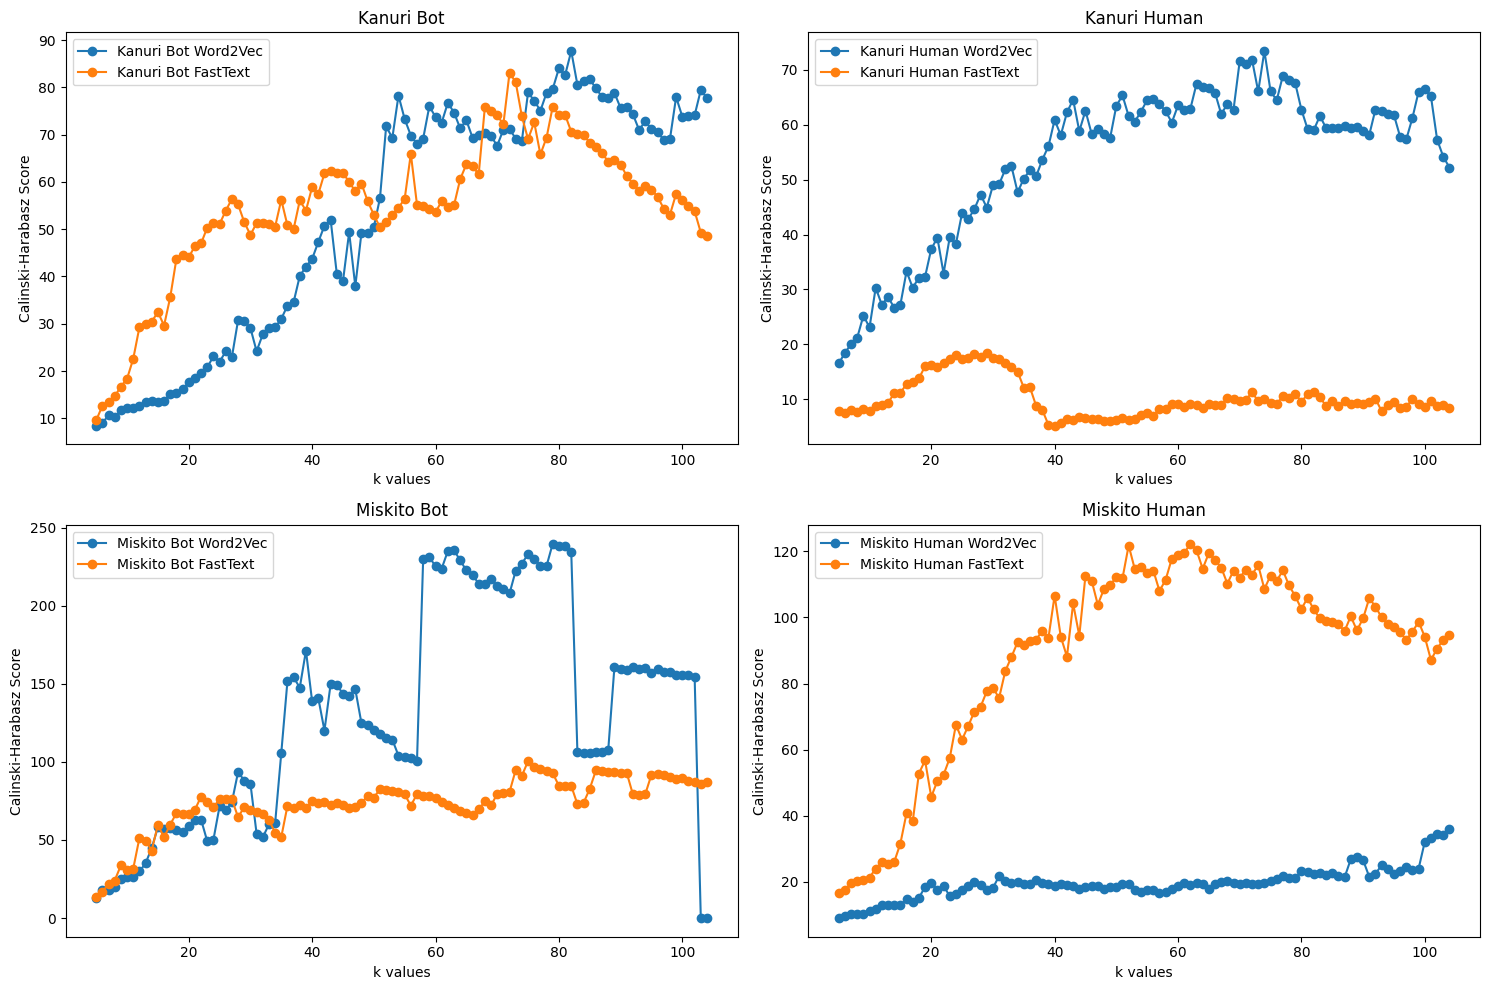

Best k values for each dataset:
Kanuri Bot Word2Vec: 82
Kanuri Human Word2Vec: 74
Miskito Bot Word2Vec: 79
Miskito Human Word2Vec: 104
Kanuri Bot FastText: 72
Kanuri Human FastText: 29
Miskito Bot FastText: 75
Miskito Human FastText: 62


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
from tqdm import tqdm

# Define the datasets and their labels for easier management
languages = ['Kanuri', 'Miskito']
types = ['Bot', 'Human']
models = ['Word2Vec', 'FastText']
datasets = {
    'Kanuri Bot Word2Vec': vectors_kanuri_bot,
    'Kanuri Human Word2Vec': vectors_kanuri_human,
    'Miskito Bot Word2Vec': vectors_miskito_bot,
    'Miskito Human Word2Vec': vectors_miskito_human,
    'Kanuri Bot FastText': vectors_kanuri_bot_ft,
    'Kanuri Human FastText': vectors_kanuri_human_ft,
    'Miskito Bot FastText': vectors_miskito_bot_ft,
    'Miskito Human FastText': vectors_miskito_human_ft
}

# Define k and h values for each dataset
k_h_values = {
    'Kanuri Bot Word2Vec': {'k': 10, 'h': 15},
    'Kanuri Human Word2Vec': {'k': 58, 'h': 15},
    'Miskito Bot Word2Vec': {'k': 22, 'h': 15},
    'Miskito Human Word2Vec': {'k': 59, 'h': 15},
    'Kanuri Bot FastText': {'k': 59, 'h': 15},
    'Kanuri Human FastText': {'k': 6, 'h': 15},
    'Miskito Bot FastText': {'k': 58, 'h': 15},
    'Miskito Human FastText': {'k': 57, 'h': 15}
}

fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust subplot grid as necessary
axs = axs.flatten()
best_k_values = []

for idx, (lang_type, vectors) in enumerate(datasets.items()):
    k_values = range(5, 105)
    ch_scores = []
    max_ch_score = 0
    best_k = 0

    for k in tqdm(k_values, desc=f"Processing {lang_type}"):
        wishart = Wishart(wishart_neighbors=k, significance_level=k_h_values[lang_type]['h'])
        labels = wishart.fit(vectors)
        if np.unique(labels).size > 1:  # Ensure there's more than one cluster
            ch_score = calinski_harabasz_score(vectors, labels)
            ch_scores.append(ch_score)
            if ch_score > max_ch_score:
                max_ch_score = ch_score
                best_k = k
        else:
            ch_scores.append(0)  # Assign a zero score if only one cluster

    best_k_values.append(best_k)  # Append the best k for this dataset

    # Select the appropriate subplot based on language and type
    if 'Kanuri' in lang_type:
        plot_index = 0 if 'Bot' in lang_type else 1
    else:  # Miskito
        plot_index = 2 if 'Bot' in lang_type else 3

    # Plotting
    axs[plot_index].plot(k_values, ch_scores, marker='o', linestyle='-', label=f'{lang_type}')
    axs[plot_index].set_title(f'{languages[plot_index // 2]} {types[plot_index % 2]}')
    axs[plot_index].set_xlabel('k values')
    axs[plot_index].set_ylabel('Calinski-Harabasz Score')
    axs[plot_index].legend()

plt.tight_layout()
plt.show()

print("Best k values for each dataset:")
for name, k in zip(datasets, best_k_values):
    print(f"{name}: {k}")


#Synthetic dataset (not used in our case, but can test to check the cluster metric quality)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from tqdm import tqdm
import json

# Assuming these functions are in the same script or defined above
# Include the provided clustering metric functions here

eps = 0.00001

def dist_point(dist, point):
    def my_dist(x):
        return dist(x, point)
    return my_dist

def min_dist_between_2_clusters(cluster_1, cluster_2, dist, objects):
    distance = 1000000
    for i in cluster_1:
        my_dist = dist_point(dist, objects[i])
        distance = min(distance, np.min(np.apply_along_axis(my_dist, axis = -1, arr = objects[cluster_2])))
    return distance

def max_dist_between_2_clusters(cluster_1, cluster_2, dist, objects):
    distance = 0
    for i in cluster_1:
        my_dist = dist_point(dist, objects[i])
        distance = max(distance, np.max(np.apply_along_axis(my_dist, axis = -1, arr = objects[cluster_2])))
    return distance

#great better
def dann_index(clusters, dist, objects):
    min_dist = 1000000
    max_diameter = 0

    for i in range(len(clusters) - 1):
        if len(clusters[1]) == 1:
            continue

        max_diameter = max(max_diameter, max_dist_between_2_clusters(clusters[i], clusters[i], dist, objects))
        for j in range(i + 1, len(clusters)):
            if len(clusters[j]) == 1:
                continue
            min_dist = min(min_dist, min_dist_between_2_clusters(clusters[i], clusters[j], dist, objects))

    return min_dist / (max_diameter + eps)

def std_of_set(X, center):
    return np.mean(np.power(X - center, 2), axis = 0)

def calc_density(cluster, center, dist, stdev):
    my_dist = dist_point(dist, center)
    diff = np.apply_along_axis(my_dist, axis = -1, arr = cluster)
    return np.sum(diff < stdev)

def calc_density_2(cluster_1, cluster_2, mid_point, dist, stdev):
    density = calc_density(cluster_1, mid_point, dist, stdev)
    density += calc_density(cluster_2, mid_point, dist, stdev)
    return density

#less better
def sd_index(clusters, means, dist, objects, alpha = 1):
    stds = np.empty(shape = (len(clusters), objects.shape[1]))
    for i in range(len(clusters)):
        stds[i] = std_of_set(objects[clusters[i]], means[i])
    std_of_all = std_of_set(objects, np.mean(objects, axis = 0))

    scatt = np.mean(np.linalg.norm(stds, axis = 1))
    scatt /= np.linalg.norm(std_of_all)

    mmax = 0
    mmin = np.inf
    dists = 0
    for index, center in enumerate(means):
        my_dist = dist_point(dist, center)
        diff = np.apply_along_axis(my_dist, axis = -1, arr = means)
        dists += np.power(np.sum(diff), -1)
        mmax = max(mmax, np.max(diff))
        buf = np.delete(diff, index)
        if len(buf) == 0:
            buf = [0]
        mmin = min(mmin, np.min(buf))
    dists /= (mmin + eps)
    dists *= mmax
    return scatt * alpha + dists

#less better
def sdwb_index(clusters, means, dist, objects):
    if len(clusters) <= 1:
        return 100000
    stds = np.empty(shape = (len(clusters), objects.shape[1]))
    for i in range(len(clusters)):
        stds[i] = std_of_set(objects[clusters[i]], means[i])
    std_of_all = std_of_set(objects, np.mean(objects, axis = 0))

    scatt = np.mean(np.linalg.norm(stds, axis = 1))
    scatt /= (np.linalg.norm(std_of_all) + eps)
    stdev = np.mean(np.sqrt(np.linalg.norm(stds, axis = 1)))

    density = np.empty(shape = (len(clusters), len(clusters)))
    dens_bw = 0
    for i in range(means.shape[0]):
        if len(clusters[i]) == 1:
            continue
        density[i][i] = calc_density(objects[clusters[i]], means[i], dist, stdev)

        for j in range(i):
            if len(clusters[j]) == 1:
                continue
            dens_bw += density[j][i] / max(density[j][j], density[i][i])

        for j in range(i + 1, len(clusters)):
            if len(clusters[j]) == 1:
                continue
            density[j][i] = calc_density_2(objects[clusters[i]], objects[clusters[j]],\
                                            (means[i] + means[j]) * 0.5, dist, stdev)


    dens_bw /= len(clusters)
    dens_bw /= len(clusters) - 1
    return scatt + dens_bw

#great better
def silhouette_index(clusters, dist, objects):
    objects_vals = [None] * len(objects)
    for my_index, my_cluster in enumerate(clusters):
        for i in my_cluster:
            x = objects[i]
            my_dist = dist_point(dist, x)
            objects_vals[i] = [None, np.inf]

            for not_my_index, not_my_cluster in enumerate(clusters):
                dist_sum = np.sum(np.apply_along_axis(my_dist, axis = -1, arr = objects[not_my_cluster]))

                if not_my_index == my_index:
                    objects_vals[i][0] = dist_sum / (len(my_cluster) - 1)
                else:
                    dist_sum /= len(not_my_cluster)
                    objects_vals[i][1] = min(dist_sum, objects_vals[i][1])

            objects_vals[i] = (objects_vals[i][1] - objects_vals[i][0]) / max(objects_vals[i][1], objects_vals[i][0])

    return sum(objects_vals) / len(objects)

#great better
def simple_silhouette_index(clusters, means, dist, objects):
    objects_vals = [None] * len(objects)
    for index, cluster in enumerate(clusters):
        for i in cluster:
            x = objects[i]
            my_dist = dist_point(dist, x)
            diff = np.apply_along_axis(my_dist, axis = -1, arr = means)
            a = diff[index]
            buf = np.delete(diff, index)
            if len(buf) == 0:
                buf = [0]
            b = np.min(buf)
            objects_vals[i] = (b - a) / max(a, b)
    return sum(objects_vals) / len(objects)

#less better
def cs_index(clusters, means, dist, objects):
    numerator = 0
    for cluster in clusters:
        add = 0
        for x in objects[cluster]:
            my_dist = dist_point(dist, x)
            add += np.max(np.apply_along_axis(my_dist, axis = -1, arr = objects[cluster]))
        add /= len(cluster)
        numerator += add

    denominator = eps
    for index, center in enumerate(means):
        my_dist = dist_point(dist, center)
        buf = np.delete(np.apply_along_axis(my_dist, axis = -1, arr = means), index)
        if len(buf) == 0:
            buf = [0]
        denominator += np.min(buf)

    return numerator / denominator

#less better
def vnnd_index(clusters, dist, objects):
    if len(clusters) <= 1:
        return 100000
    vnnd = 0
    for cluster in clusters:
        means = np.empty(len(cluster))
        for i, x in enumerate(objects[cluster]):
            my_dist = dist_point(dist, x)
            buf = np.delete(np.apply_along_axis(my_dist, axis = -1, arr = objects[cluster]), i)
            if len(buf) == 0:
                buf = [0]
            means[i] = np.min(buf)
        vnnd += np.power(np.std(means, ddof = 1), 2)
    return vnnd

#great better
def score_index(clusters, means, dist, objects):
    if len(clusters) <= 1:
        return 0
    center = np.mean(means, axis = 0)
    my_dist = dist_point(dist, center)
    diff = np.apply_along_axis(my_dist, axis = -1, arr = means)
    diff *= np.array(list(map(len, clusters)))
    return np.sum(diff) / (len(objects) * len(clusters))

#great better
def mb_index(clusters, means, dist, objects, p = 2):
    if len(clusters) <= 1:
        return 0
    e_c = 0
    d = 0
    for index, center in enumerate(means):
        my_dist = dist_point(dist, center)
        e_c += np.sum(np.apply_along_axis(my_dist, axis = -1, arr = objects[clusters[index]]))
        d = max(d, np.max(np.apply_along_axis(my_dist, axis = -1, arr = means)))

    my_dist = dist_point(dist, np.mean(objects, axis = 0))
    e_i = np.sum(np.apply_along_axis(my_dist, axis = -1, arr = objects))

    return np.power(e_i * d / (e_c * len(clusters)), p)


def dist_point(dist, point):
    def my_dist(x):
        return dist(x - point)
    return my_dist

def min_dist_between_2_clusters(cluster_1, cluster_2, dist, objects):
    distance = np.inf
    for i in cluster_1:
        my_dist = dist_point(dist, objects[i])
        distance = min(distance, np.min(np.apply_along_axis(my_dist, axis=-1, arr=objects[cluster_2])))
    return distance

def max_dist_between_2_clusters(cluster_1, cluster_2, dist, objects):
    distance = -np.inf
    for i in cluster_1:
        my_dist = dist_point(dist, objects[i])
        distance = max(distance, np.max(np.apply_along_axis(my_dist, axis=-1, arr=objects[cluster_2])))
    return distance

def dann_index(clusters, dist, objects):
    min_dist = np.inf
    max_diameter = -np.inf

    for i in range(len(clusters) - 1):
        if len(clusters[i]) == 1:
            continue

        max_diameter = max(max_diameter, max_dist_between_2_clusters(clusters[i], clusters[i], dist, objects))
        for j in range(i + 1, len(clusters)):
            if len(clusters[j]) == 1:
                continue
            min_dist = min(min_dist, min_dist_between_2_clusters(clusters[i], clusters[j], dist, objects))

    return min_dist / (max_diameter + eps)


# Synthetic Data Generation Functions
def create_well_separated(X, distance_factor=4.5):
    kmeans = KMeans(n_clusters=3)
    labels = kmeans.fit_predict(X)
    new_centroids = kmeans.cluster_centers_ * distance_factor
    return make_blobs(n_samples=[sum(labels == i) for i in range(3)], centers=new_centroids, cluster_std=0.5)[0]

def create_different_density(X):
    kmeans = KMeans(n_clusters=3)
    labels = kmeans.fit_predict(X)
    new_data = []
    for i in range(3):
        cluster_data = X[labels == i]
        std_dev = np.std(cluster_data) * (i+1)
        new_data.append(cluster_data * std_dev / np.std(cluster_data))
    return np.vstack(new_data)

def create_separated_with_noise(X, noise_level=0.3):
    separated_data = create_well_separated(X)
    noise = np.random.normal(size=separated_data.shape) * noise_level
    return separated_data + noise

def create_subclusters(X):
    kmeans = KMeans(n_clusters=3)
    labels = kmeans.fit_predict(X)
    subclustered_data = []
    for i in range(3):
        cluster_data = X[labels == i]
        sub_means = np.random.normal(loc=0, scale=0.1, size=(2, cluster_data.shape[1]))
        for sub_mean in sub_means:
            sub_data = cluster_data + sub_mean
            subclustered_data.append(sub_data)
    return np.vstack(subclustered_data)

def create_skewed_distributions(X):
    kmeans = KMeans(n_clusters=3, n_init=10)
    labels = kmeans.fit_predict(X)
    skewed_data = []
    skew_factors = np.linspace(1, 2, X.shape[1])
    for i in range(3):
        cluster_data = X[labels == i]
        skewed_cluster_data = cluster_data * skew_factors
        skewed_data.append(skewed_cluster_data)
    return np.vstack(skewed_data)

# Main Script to Run Clustering and Metrics Calculation
data_functions = [create_well_separated, create_different_density, create_separated_with_noise, create_subclusters, create_skewed_distributions]
vector_data = np.random.randn(3000, 10)  # Example high-dimensional data

all_metrics = []

for i, data_function in enumerate(data_functions, 1):
    X_synthetic = data_function(vector_data)
    k_range = range(2, 101)
    h_percentiles = [15]

    for k in tqdm(k_range, desc=f"Processing {data_function.__name__}"):
        for h in h_percentiles:
            wishart = Wishart(wishart_neighbors=k, significance_level=h)
            labels = wishart.fit(X_synthetic)
            if np.unique(labels).size > 1:  # Ensure more than one cluster exists
                silhouette = silhouette_score(X_synthetic, labels)
                db_index = davies_bouldin_score(X_synthetic, labels)
                ch_index = calinski_harabasz_score(X_synthetic, labels)
                clusters = [np.where(labels == j)[0] for j in np.unique(labels)]
                means = np.array([X_synthetic[labels == j].mean(axis=0) for j in np.unique(labels)])
                metrics = {
                    "Silhouette": silhouette,
                    "Davies-Bouldin": db_index,
                    "Calinski-Harabasz": ch_index,
                    "Dunn Index": dann_index(clusters, np.linalg.norm, X_synthetic),
                    "SD Index": sd_index(clusters, means, np.linalg.norm, X_synthetic),
                    "SDbw Index": sdwb_index(clusters, means, np.linalg.norm, X_synthetic),
                    "Simple Silhouette Index": simple_silhouette_index(clusters, means, np.linalg.norm, X_synthetic),
                    "CS Index": cs_index(clusters, means, np.linalg.norm, X_synthetic),
                    "VNND Index": vnnd_index(clusters, np.linalg.norm, X_synthetic),
                    "Score Index": score_index(clusters, means, np.linalg.norm, X_synthetic),
                    "MB Index": mb_index(clusters, means, np.linalg.norm, X_synthetic)
                }
                all_metrics.append((k, h, metrics))

    # Save metrics for further analysis
    with open(f"clustering_metrics_{data_function.__name__}.json", "w") as f:
        json.dump(all_metrics, f)



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Processing create_well_separated:   1%|          | 1/99 [00:00<00:17,  5.73it/s]

Start clustering
Start clustering


Processing create_well_separated:   3%|▎         | 3/99 [00:00<00:16,  5.79it/s]

Start clustering
Start clustering


Processing create_well_separated:   5%|▌         | 5/99 [00:00<00:16,  5.86it/s]

Start clustering
Start clustering


Processing create_well_separated:   7%|▋         | 7/99 [00:01<00:16,  5.73it/s]

Start clustering
Start clustering


Processing create_well_separated:   9%|▉         | 9/99 [00:01<00:16,  5.60it/s]

Start clustering
Start clustering


Processing create_well_separated:  11%|█         | 11/99 [00:01<00:16,  5.49it/s]

Start clustering
Start clustering


Processing create_well_separated:  13%|█▎        | 13/99 [00:02<00:16,  5.31it/s]

Start clustering
Start clustering


Processing create_well_separated:  15%|█▌        | 15/99 [00:02<00:16,  5.23it/s]

Start clustering
Start clustering


Processing create_well_separated:  17%|█▋        | 17/99 [00:03<00:15,  5.16it/s]

Start clustering
Start clustering


Processing create_well_separated:  19%|█▉        | 19/99 [00:03<00:15,  5.07it/s]

Start clustering


Processing create_well_separated:  20%|██        | 20/99 [00:03<00:15,  5.06it/s]

Start clustering


Processing create_well_separated:  21%|██        | 21/99 [00:03<00:15,  5.02it/s]

Start clustering
Start clustering


Processing create_well_separated:  23%|██▎       | 23/99 [00:04<00:15,  4.98it/s]

Start clustering


Processing create_well_separated:  24%|██▍       | 24/99 [00:04<00:15,  4.94it/s]

Start clustering


Processing create_well_separated:  25%|██▌       | 25/99 [00:04<00:15,  4.93it/s]

Start clustering


Processing create_well_separated:  26%|██▋       | 26/99 [00:04<00:14,  4.92it/s]

Start clustering


Processing create_well_separated:  27%|██▋       | 27/99 [00:05<00:14,  4.88it/s]

Start clustering


Processing create_well_separated:  28%|██▊       | 28/99 [00:05<00:14,  4.85it/s]

Start clustering


Processing create_well_separated:  29%|██▉       | 29/99 [00:05<00:14,  4.82it/s]

Start clustering


Processing create_well_separated:  30%|███       | 30/99 [00:05<00:14,  4.83it/s]

Start clustering


Processing create_well_separated:  31%|███▏      | 31/99 [00:05<00:14,  4.81it/s]

Start clustering


Processing create_well_separated:  32%|███▏      | 32/99 [00:06<00:14,  4.77it/s]

Start clustering


Processing create_well_separated:  33%|███▎      | 33/99 [00:06<00:13,  4.76it/s]

Start clustering


Processing create_well_separated:  34%|███▍      | 34/99 [00:06<00:13,  4.73it/s]

Start clustering


Processing create_well_separated:  35%|███▌      | 35/99 [00:06<00:13,  4.67it/s]

Start clustering


Processing create_well_separated:  36%|███▋      | 36/99 [00:07<00:13,  4.59it/s]

Start clustering


Processing create_well_separated:  37%|███▋      | 37/99 [00:07<00:13,  4.58it/s]

Start clustering


Processing create_well_separated:  38%|███▊      | 38/99 [00:07<00:13,  4.53it/s]

Start clustering


Processing create_well_separated:  39%|███▉      | 39/99 [00:07<00:13,  4.43it/s]

Start clustering


Processing create_well_separated:  40%|████      | 40/99 [00:07<00:13,  4.43it/s]

Start clustering


Processing create_well_separated:  41%|████▏     | 41/99 [00:08<00:13,  4.40it/s]

Start clustering


Processing create_well_separated:  42%|████▏     | 42/99 [00:08<00:12,  4.39it/s]

Start clustering


Processing create_well_separated:  43%|████▎     | 43/99 [00:08<00:12,  4.40it/s]

Start clustering


Processing create_well_separated:  44%|████▍     | 44/99 [00:08<00:12,  4.40it/s]

Start clustering


Processing create_well_separated:  45%|████▌     | 45/99 [00:09<00:12,  4.27it/s]

Start clustering


Processing create_well_separated:  46%|████▋     | 46/99 [00:09<00:12,  4.31it/s]

Start clustering


Processing create_well_separated:  47%|████▋     | 47/99 [00:09<00:12,  4.32it/s]

Start clustering


Processing create_well_separated:  48%|████▊     | 48/99 [00:09<00:12,  4.24it/s]

Start clustering


Processing create_well_separated:  49%|████▉     | 49/99 [00:10<00:11,  4.24it/s]

Start clustering


Processing create_well_separated:  51%|█████     | 50/99 [00:10<00:11,  4.25it/s]

Start clustering


Processing create_well_separated:  52%|█████▏    | 51/99 [00:10<00:11,  4.27it/s]

Start clustering


Processing create_well_separated:  53%|█████▎    | 52/99 [00:10<00:11,  4.26it/s]

Start clustering


Processing create_well_separated:  54%|█████▎    | 53/99 [00:11<00:10,  4.22it/s]

Start clustering


Processing create_well_separated:  55%|█████▍    | 54/99 [00:11<00:10,  4.14it/s]

Start clustering


Processing create_well_separated:  56%|█████▌    | 55/99 [00:11<00:10,  4.09it/s]

Start clustering


Processing create_well_separated:  57%|█████▋    | 56/99 [00:11<00:10,  4.10it/s]

Start clustering


Processing create_well_separated:  58%|█████▊    | 57/99 [00:12<00:10,  4.07it/s]

Start clustering


Processing create_well_separated:  59%|█████▊    | 58/99 [00:12<00:10,  4.08it/s]

Start clustering


Processing create_well_separated:  60%|█████▉    | 59/99 [00:12<00:09,  4.08it/s]

Start clustering


Processing create_well_separated:  61%|██████    | 60/99 [00:12<00:09,  4.05it/s]

Start clustering


Processing create_well_separated:  62%|██████▏   | 61/99 [00:13<00:09,  4.00it/s]

Start clustering


Processing create_well_separated:  63%|██████▎   | 62/99 [00:13<00:09,  4.00it/s]

Start clustering


Processing create_well_separated:  64%|██████▎   | 63/99 [00:13<00:09,  3.99it/s]

Start clustering


Processing create_well_separated:  65%|██████▍   | 64/99 [00:13<00:08,  4.00it/s]

Start clustering


Processing create_well_separated:  66%|██████▌   | 65/99 [00:14<00:08,  3.96it/s]

Start clustering


Processing create_well_separated:  67%|██████▋   | 66/99 [00:14<00:08,  3.95it/s]

Start clustering


Processing create_well_separated:  68%|██████▊   | 67/99 [00:14<00:08,  3.94it/s]

Start clustering


Processing create_well_separated:  69%|██████▊   | 68/99 [00:14<00:07,  3.94it/s]

Start clustering


Processing create_well_separated:  70%|██████▉   | 69/99 [00:15<00:07,  3.95it/s]

Start clustering


Processing create_well_separated:  71%|███████   | 70/99 [00:15<00:07,  3.91it/s]

Start clustering


Processing create_well_separated:  72%|███████▏  | 71/99 [00:15<00:07,  3.90it/s]

Start clustering


Processing create_well_separated:  73%|███████▎  | 72/99 [00:15<00:06,  3.91it/s]

Start clustering


Processing create_well_separated:  74%|███████▎  | 73/99 [00:16<00:06,  3.84it/s]

Start clustering


Processing create_well_separated:  75%|███████▍  | 74/99 [00:16<00:06,  3.77it/s]

Start clustering


Processing create_well_separated:  76%|███████▌  | 75/99 [00:16<00:06,  3.73it/s]

Start clustering


Processing create_well_separated:  77%|███████▋  | 76/99 [00:16<00:06,  3.74it/s]

Start clustering


Processing create_well_separated:  78%|███████▊  | 77/99 [00:17<00:05,  3.72it/s]

Start clustering


Processing create_well_separated:  79%|███████▉  | 78/99 [00:17<00:05,  3.72it/s]

Start clustering


Processing create_well_separated:  80%|███████▉  | 79/99 [00:17<00:05,  3.73it/s]

Start clustering


Processing create_well_separated:  81%|████████  | 80/99 [00:17<00:05,  3.74it/s]

Start clustering


Processing create_well_separated:  82%|████████▏ | 81/99 [00:18<00:04,  3.74it/s]

Start clustering


Processing create_well_separated:  83%|████████▎ | 82/99 [00:18<00:04,  3.72it/s]

Start clustering


Processing create_well_separated:  84%|████████▍ | 83/99 [00:18<00:04,  3.70it/s]

Start clustering


Processing create_well_separated:  85%|████████▍ | 84/99 [00:19<00:04,  3.62it/s]

Start clustering


Processing create_well_separated:  86%|████████▌ | 85/99 [00:19<00:03,  3.60it/s]

Start clustering


Processing create_well_separated:  87%|████████▋ | 86/99 [00:19<00:03,  3.63it/s]

Start clustering


Processing create_well_separated:  88%|████████▊ | 87/99 [00:19<00:03,  3.64it/s]

Start clustering


Processing create_well_separated:  89%|████████▉ | 88/99 [00:20<00:03,  3.60it/s]

Start clustering


Processing create_well_separated:  90%|████████▉ | 89/99 [00:20<00:02,  3.64it/s]

Start clustering


Processing create_well_separated:  91%|█████████ | 90/99 [00:20<00:02,  3.65it/s]

Start clustering


Processing create_well_separated:  92%|█████████▏| 91/99 [00:21<00:02,  3.61it/s]

Start clustering


Processing create_well_separated:  93%|█████████▎| 92/99 [00:21<00:01,  3.61it/s]

Start clustering


Processing create_well_separated:  94%|█████████▍| 93/99 [00:21<00:01,  3.58it/s]

Start clustering


Processing create_well_separated:  95%|█████████▍| 94/99 [00:21<00:01,  3.60it/s]

Start clustering


Processing create_well_separated:  96%|█████████▌| 95/99 [00:22<00:01,  3.57it/s]

Start clustering


Processing create_well_separated:  97%|█████████▋| 96/99 [00:22<00:00,  3.53it/s]

Start clustering


Processing create_well_separated:  98%|█████████▊| 97/99 [00:22<00:00,  3.51it/s]

Start clustering


Processing create_well_separated:  99%|█████████▉| 98/99 [00:22<00:00,  3.52it/s]

Start clustering


Processing create_well_separated: 100%|██████████| 99/99 [00:23<00:00,  4.25it/s]

Start clustering



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Processing create_different_density:   0%|          | 0/99 [00:00<?, ?it/s]

Start clustering


Processing create_different_density:   2%|▏         | 2/99 [02:35<1:43:53, 64.26s/it] 

Start clustering


Processing create_different_density:   3%|▎         | 3/99 [02:36<56:02, 35.03s/it]  

Start clustering


Processing create_different_density:   4%|▍         | 4/99 [02:36<33:42, 21.29s/it]

Start clustering


Processing create_different_density:   5%|▌         | 5/99 [02:36<21:28, 13.70s/it]

Start clustering


Processing create_different_density:   6%|▌         | 6/99 [02:36<14:09,  9.13s/it]

Start clustering


Processing create_different_density:   7%|▋         | 7/99 [02:37<09:33,  6.23s/it]

Start clustering


Processing create_different_density:   8%|▊         | 8/99 [02:37<06:34,  4.33s/it]

Start clustering


Processing create_different_density:   9%|▉         | 9/99 [02:37<04:35,  3.06s/it]

Start clustering


Processing create_different_density:  10%|█         | 10/99 [02:37<03:15,  2.20s/it]

Start clustering


Processing create_different_density:  11%|█         | 11/99 [02:38<02:21,  1.60s/it]

Start clustering


Processing create_different_density:  12%|█▏        | 12/99 [02:38<01:43,  1.19s/it]

Start clustering


Processing create_different_density:  13%|█▎        | 13/99 [02:38<01:18,  1.10it/s]

Start clustering


Processing create_different_density:  14%|█▍        | 14/99 [02:39<01:00,  1.40it/s]

Start clustering


Processing create_different_density:  15%|█▌        | 15/99 [02:39<00:48,  1.72it/s]

Start clustering


Processing create_different_density:  16%|█▌        | 16/99 [02:39<00:40,  2.05it/s]

Start clustering


Processing create_different_density:  17%|█▋        | 17/99 [02:39<00:34,  2.37it/s]

Start clustering


Processing create_different_density:  18%|█▊        | 18/99 [02:40<00:30,  2.65it/s]

Start clustering


Processing create_different_density:  19%|█▉        | 19/99 [02:40<00:27,  2.87it/s]

Start clustering


Processing create_different_density:  20%|██        | 20/99 [02:40<00:26,  3.03it/s]

Start clustering


Processing create_different_density:  21%|██        | 21/99 [02:40<00:24,  3.17it/s]

Start clustering


Processing create_different_density:  22%|██▏       | 22/99 [02:41<00:23,  3.25it/s]

Start clustering


Processing create_different_density:  23%|██▎       | 23/99 [02:41<00:23,  3.26it/s]

Start clustering


Processing create_different_density:  24%|██▍       | 24/99 [02:41<00:22,  3.28it/s]

Start clustering


Processing create_different_density:  25%|██▌       | 25/99 [02:42<00:22,  3.34it/s]

Start clustering


Processing create_different_density:  26%|██▋       | 26/99 [02:42<00:21,  3.37it/s]

Start clustering


Processing create_different_density:  27%|██▋       | 27/99 [02:42<00:21,  3.40it/s]

Start clustering


Processing create_different_density:  28%|██▊       | 28/99 [02:43<00:21,  3.35it/s]

Start clustering


Processing create_different_density:  29%|██▉       | 29/99 [02:43<00:21,  3.28it/s]

Start clustering


Processing create_different_density:  30%|███       | 30/99 [02:43<00:21,  3.28it/s]

Start clustering


Processing create_different_density:  31%|███▏      | 31/99 [02:43<00:20,  3.30it/s]

Start clustering


Processing create_different_density:  32%|███▏      | 32/99 [02:44<00:20,  3.28it/s]

Start clustering


Processing create_different_density:  33%|███▎      | 33/99 [02:44<00:20,  3.27it/s]

Start clustering


Processing create_different_density:  34%|███▍      | 34/99 [02:44<00:19,  3.30it/s]

Start clustering


Processing create_different_density:  35%|███▌      | 35/99 [02:45<00:19,  3.32it/s]

Start clustering


Processing create_different_density:  36%|███▋      | 36/99 [02:45<00:19,  3.30it/s]

Start clustering


Processing create_different_density:  37%|███▋      | 37/99 [02:45<00:18,  3.31it/s]

Start clustering


Processing create_different_density:  38%|███▊      | 38/99 [02:46<00:18,  3.33it/s]

Start clustering


Processing create_different_density:  39%|███▉      | 39/99 [02:46<00:18,  3.33it/s]

Start clustering


Processing create_different_density:  40%|████      | 40/99 [02:46<00:17,  3.29it/s]

Start clustering


Processing create_different_density:  41%|████▏     | 41/99 [02:46<00:17,  3.28it/s]

Start clustering


Processing create_different_density:  42%|████▏     | 42/99 [02:47<00:17,  3.28it/s]

Start clustering


Processing create_different_density:  43%|████▎     | 43/99 [02:47<00:17,  3.28it/s]

Start clustering


Processing create_different_density:  44%|████▍     | 44/99 [02:47<00:16,  3.27it/s]

Start clustering


Processing create_different_density:  45%|████▌     | 45/99 [02:48<00:16,  3.22it/s]

Start clustering


Processing create_different_density:  46%|████▋     | 46/99 [02:48<00:16,  3.22it/s]

Start clustering


Processing create_different_density:  47%|████▋     | 47/99 [02:48<00:16,  3.22it/s]

Start clustering


Processing create_different_density:  48%|████▊     | 48/99 [02:49<00:15,  3.20it/s]

Start clustering


Processing create_different_density:  49%|████▉     | 49/99 [02:49<00:15,  3.18it/s]

Start clustering


Processing create_different_density:  51%|█████     | 50/99 [02:49<00:15,  3.17it/s]

Start clustering


Processing create_different_density:  52%|█████▏    | 51/99 [02:50<00:15,  3.16it/s]

Start clustering


Processing create_different_density:  53%|█████▎    | 52/99 [02:50<00:15,  3.12it/s]

Start clustering


Processing create_different_density:  54%|█████▎    | 53/99 [02:50<00:14,  3.09it/s]

Start clustering


Processing create_different_density:  55%|█████▍    | 54/99 [02:51<00:14,  3.10it/s]

Start clustering


Processing create_different_density:  56%|█████▌    | 55/99 [02:51<00:14,  3.09it/s]

Start clustering


Processing create_different_density:  57%|█████▋    | 56/99 [02:51<00:13,  3.10it/s]

Start clustering


Processing create_different_density:  58%|█████▊    | 57/99 [02:52<00:13,  3.10it/s]

Start clustering


Processing create_different_density:  59%|█████▊    | 58/99 [02:52<00:13,  3.10it/s]

Start clustering


Processing create_different_density:  60%|█████▉    | 59/99 [02:52<00:13,  3.07it/s]

Start clustering


Processing create_different_density:  61%|██████    | 60/99 [02:53<00:12,  3.06it/s]

Start clustering


Processing create_different_density:  62%|██████▏   | 61/99 [02:53<00:12,  3.02it/s]

Start clustering


Processing create_different_density:  63%|██████▎   | 62/99 [02:53<00:12,  3.02it/s]

Start clustering


Processing create_different_density:  64%|██████▎   | 63/99 [02:54<00:11,  3.03it/s]

Start clustering


Processing create_different_density:  65%|██████▍   | 64/99 [02:54<00:11,  2.94it/s]

Start clustering


Processing create_different_density:  66%|██████▌   | 65/99 [02:54<00:11,  2.96it/s]

Start clustering


Processing create_different_density:  67%|██████▋   | 66/99 [02:55<00:11,  2.98it/s]

Start clustering


Processing create_different_density:  68%|██████▊   | 67/99 [02:55<00:10,  2.99it/s]

Start clustering


Processing create_different_density:  69%|██████▊   | 68/99 [02:55<00:10,  2.98it/s]

Start clustering


Processing create_different_density:  70%|██████▉   | 69/99 [02:56<00:10,  2.99it/s]

Start clustering


Processing create_different_density:  71%|███████   | 70/99 [02:56<00:09,  2.99it/s]

Start clustering


Processing create_different_density:  72%|███████▏  | 71/99 [02:56<00:09,  2.98it/s]

Start clustering


Processing create_different_density:  73%|███████▎  | 72/99 [02:57<00:09,  2.99it/s]

Start clustering


Processing create_different_density:  74%|███████▎  | 73/99 [02:57<00:08,  2.99it/s]

Start clustering


Processing create_different_density:  75%|███████▍  | 74/99 [02:57<00:08,  2.98it/s]

Start clustering


Processing create_different_density:  76%|███████▌  | 75/99 [02:58<00:08,  2.97it/s]

Start clustering


Processing create_different_density:  77%|███████▋  | 76/99 [02:58<00:07,  2.94it/s]

Start clustering


Processing create_different_density:  78%|███████▊  | 77/99 [02:58<00:07,  2.91it/s]

Start clustering


Processing create_different_density:  79%|███████▉  | 78/99 [02:59<00:07,  2.90it/s]

Start clustering


Processing create_different_density:  80%|███████▉  | 79/99 [02:59<00:06,  2.89it/s]

Start clustering


Processing create_different_density:  81%|████████  | 80/99 [02:59<00:06,  2.88it/s]

Start clustering


Processing create_different_density:  82%|████████▏ | 81/99 [03:00<00:06,  2.89it/s]

Start clustering


Processing create_different_density:  83%|████████▎ | 82/99 [03:00<00:05,  2.88it/s]

Start clustering


Processing create_different_density:  84%|████████▍ | 83/99 [03:00<00:05,  2.83it/s]

Start clustering


Processing create_different_density:  85%|████████▍ | 84/99 [03:01<00:05,  2.81it/s]

Start clustering


Processing create_different_density:  86%|████████▌ | 85/99 [03:01<00:05,  2.76it/s]

Start clustering


Processing create_different_density:  87%|████████▋ | 86/99 [03:02<00:04,  2.78it/s]

Start clustering


Processing create_different_density:  88%|████████▊ | 87/99 [03:02<00:04,  2.80it/s]

Start clustering


Processing create_different_density:  89%|████████▉ | 88/99 [03:02<00:03,  2.80it/s]

Start clustering


Processing create_different_density:  90%|████████▉ | 89/99 [03:03<00:03,  2.81it/s]

Start clustering


Processing create_different_density:  91%|█████████ | 90/99 [03:03<00:03,  2.82it/s]

Start clustering


Processing create_different_density:  92%|█████████▏| 91/99 [03:03<00:02,  2.81it/s]

Start clustering


Processing create_different_density:  93%|█████████▎| 92/99 [03:04<00:02,  2.80it/s]

Start clustering


Processing create_different_density:  94%|█████████▍| 93/99 [03:04<00:02,  2.75it/s]

Start clustering


Processing create_different_density:  95%|█████████▍| 94/99 [03:04<00:01,  2.76it/s]

Start clustering


Processing create_different_density:  96%|█████████▌| 95/99 [03:05<00:01,  2.76it/s]

Start clustering


Processing create_different_density:  97%|█████████▋| 96/99 [03:05<00:01,  2.73it/s]

Start clustering


Processing create_different_density:  98%|█████████▊| 97/99 [03:05<00:00,  2.72it/s]

Start clustering


Processing create_different_density:  99%|█████████▉| 98/99 [03:06<00:00,  2.73it/s]

Start clustering


Processing create_different_density: 100%|██████████| 99/99 [03:06<00:00,  1.89s/it]

Start clustering



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Processing create_separated_with_noise:   1%|          | 1/99 [00:00<00:16,  5.92it/s]

Start clustering
Start clustering


Processing create_separated_with_noise:   3%|▎         | 3/99 [00:00<00:16,  5.82it/s]

Start clustering
Start clustering


Processing create_separated_with_noise:   5%|▌         | 5/99 [00:00<00:16,  5.66it/s]

Start clustering
Start clustering


Processing create_separated_with_noise:   7%|▋         | 7/99 [00:01<00:16,  5.58it/s]

Start clustering
Start clustering


Processing create_separated_with_noise:   9%|▉         | 9/99 [00:01<00:16,  5.54it/s]

Start clustering
Start clustering


Processing create_separated_with_noise:  11%|█         | 11/99 [00:01<00:16,  5.49it/s]

Start clustering
Start clustering


Processing create_separated_with_noise:  13%|█▎        | 13/99 [00:02<00:16,  5.37it/s]

Start clustering
Start clustering


Processing create_separated_with_noise:  15%|█▌        | 15/99 [00:02<00:16,  5.21it/s]

Start clustering


Processing create_separated_with_noise:  16%|█▌        | 16/99 [00:02<00:16,  5.09it/s]

Start clustering


Processing create_separated_with_noise:  17%|█▋        | 17/99 [00:03<00:16,  4.98it/s]

Start clustering


Processing create_separated_with_noise:  18%|█▊        | 18/99 [00:03<00:17,  4.75it/s]

Start clustering


Processing create_separated_with_noise:  19%|█▉        | 19/99 [00:03<00:17,  4.59it/s]

Start clustering


Processing create_separated_with_noise:  20%|██        | 20/99 [00:03<00:17,  4.51it/s]

Start clustering


Processing create_separated_with_noise:  21%|██        | 21/99 [00:04<00:17,  4.46it/s]

Start clustering


Processing create_separated_with_noise:  22%|██▏       | 22/99 [00:04<00:17,  4.40it/s]

Start clustering


Processing create_separated_with_noise:  23%|██▎       | 23/99 [00:04<00:16,  4.47it/s]

Start clustering


Processing create_separated_with_noise:  24%|██▍       | 24/99 [00:04<00:16,  4.50it/s]

Start clustering


Processing create_separated_with_noise:  25%|██▌       | 25/99 [00:04<00:16,  4.58it/s]

Start clustering


Processing create_separated_with_noise:  26%|██▋       | 26/99 [00:05<00:15,  4.63it/s]

Start clustering


Processing create_separated_with_noise:  27%|██▋       | 27/99 [00:05<00:15,  4.60it/s]

Start clustering


Processing create_separated_with_noise:  28%|██▊       | 28/99 [00:05<00:15,  4.61it/s]

Start clustering


Processing create_separated_with_noise:  29%|██▉       | 29/99 [00:05<00:15,  4.61it/s]

Start clustering


Processing create_separated_with_noise:  30%|███       | 30/99 [00:06<00:15,  4.59it/s]

Start clustering


Processing create_separated_with_noise:  31%|███▏      | 31/99 [00:06<00:15,  4.30it/s]

Start clustering


Processing create_separated_with_noise:  32%|███▏      | 32/99 [00:06<00:15,  4.24it/s]

Start clustering


Processing create_separated_with_noise:  33%|███▎      | 33/99 [00:06<00:15,  4.26it/s]

Start clustering


Processing create_separated_with_noise:  34%|███▍      | 34/99 [00:07<00:15,  4.31it/s]

Start clustering


Processing create_separated_with_noise:  35%|███▌      | 35/99 [00:07<00:14,  4.36it/s]

Start clustering


Processing create_separated_with_noise:  36%|███▋      | 36/99 [00:07<00:14,  4.37it/s]

Start clustering


Processing create_separated_with_noise:  37%|███▋      | 37/99 [00:07<00:14,  4.40it/s]

Start clustering


Processing create_separated_with_noise:  38%|███▊      | 38/99 [00:07<00:13,  4.41it/s]

Start clustering


Processing create_separated_with_noise:  39%|███▉      | 39/99 [00:08<00:13,  4.40it/s]

Start clustering


Processing create_separated_with_noise:  40%|████      | 40/99 [00:08<00:13,  4.41it/s]

Start clustering


Processing create_separated_with_noise:  41%|████▏     | 41/99 [00:08<00:13,  4.33it/s]

Start clustering


Processing create_separated_with_noise:  42%|████▏     | 42/99 [00:08<00:13,  4.32it/s]

Start clustering


Processing create_separated_with_noise:  43%|████▎     | 43/99 [00:09<00:13,  4.28it/s]

Start clustering


Processing create_separated_with_noise:  44%|████▍     | 44/99 [00:09<00:12,  4.28it/s]

Start clustering


Processing create_separated_with_noise:  45%|████▌     | 45/99 [00:09<00:12,  4.24it/s]

Start clustering


Processing create_separated_with_noise:  46%|████▋     | 46/99 [00:09<00:12,  4.20it/s]

Start clustering


Processing create_separated_with_noise:  47%|████▋     | 47/99 [00:10<00:12,  4.21it/s]

Start clustering


Processing create_separated_with_noise:  48%|████▊     | 48/99 [00:10<00:12,  4.20it/s]

Start clustering


Processing create_separated_with_noise:  49%|████▉     | 49/99 [00:10<00:11,  4.20it/s]

Start clustering


Processing create_separated_with_noise:  51%|█████     | 50/99 [00:10<00:11,  4.20it/s]

Start clustering


Processing create_separated_with_noise:  52%|█████▏    | 51/99 [00:10<00:11,  4.18it/s]

Start clustering


Processing create_separated_with_noise:  53%|█████▎    | 52/99 [00:11<00:11,  4.20it/s]

Start clustering


Processing create_separated_with_noise:  54%|█████▎    | 53/99 [00:11<00:11,  4.17it/s]

Start clustering


Processing create_separated_with_noise:  55%|█████▍    | 54/99 [00:11<00:10,  4.14it/s]

Start clustering


Processing create_separated_with_noise:  56%|█████▌    | 55/99 [00:11<00:10,  4.11it/s]

Start clustering


Processing create_separated_with_noise:  57%|█████▋    | 56/99 [00:12<00:10,  4.03it/s]

Start clustering


Processing create_separated_with_noise:  58%|█████▊    | 57/99 [00:12<00:10,  3.99it/s]

Start clustering


Processing create_separated_with_noise:  59%|█████▊    | 58/99 [00:12<00:10,  3.97it/s]

Start clustering


Processing create_separated_with_noise:  60%|█████▉    | 59/99 [00:12<00:10,  3.97it/s]

Start clustering


Processing create_separated_with_noise:  61%|██████    | 60/99 [00:13<00:09,  3.98it/s]

Start clustering


Processing create_separated_with_noise:  62%|██████▏   | 61/99 [00:13<00:09,  3.96it/s]

Start clustering


Processing create_separated_with_noise:  63%|██████▎   | 62/99 [00:13<00:09,  3.96it/s]

Start clustering


Processing create_separated_with_noise:  64%|██████▎   | 63/99 [00:14<00:09,  3.93it/s]

Start clustering


Processing create_separated_with_noise:  65%|██████▍   | 64/99 [00:14<00:08,  3.93it/s]

Start clustering


Processing create_separated_with_noise:  66%|██████▌   | 65/99 [00:14<00:08,  3.91it/s]

Start clustering


Processing create_separated_with_noise:  67%|██████▋   | 66/99 [00:14<00:08,  3.86it/s]

Start clustering


Processing create_separated_with_noise:  68%|██████▊   | 67/99 [00:15<00:08,  3.87it/s]

Start clustering


Processing create_separated_with_noise:  69%|██████▊   | 68/99 [00:15<00:08,  3.85it/s]

Start clustering


Processing create_separated_with_noise:  70%|██████▉   | 69/99 [00:15<00:07,  3.86it/s]

Start clustering


Processing create_separated_with_noise:  71%|███████   | 70/99 [00:15<00:07,  3.78it/s]

Start clustering


Processing create_separated_with_noise:  72%|███████▏  | 71/99 [00:16<00:07,  3.76it/s]

Start clustering


Processing create_separated_with_noise:  73%|███████▎  | 72/99 [00:16<00:07,  3.68it/s]

Start clustering


Processing create_separated_with_noise:  74%|███████▎  | 73/99 [00:16<00:07,  3.71it/s]

Start clustering


Processing create_separated_with_noise:  75%|███████▍  | 74/99 [00:16<00:06,  3.71it/s]

Start clustering


Processing create_separated_with_noise:  76%|███████▌  | 75/99 [00:17<00:06,  3.70it/s]

Start clustering


Processing create_separated_with_noise:  77%|███████▋  | 76/99 [00:17<00:06,  3.66it/s]

Start clustering


Processing create_separated_with_noise:  78%|███████▊  | 77/99 [00:17<00:05,  3.67it/s]

Start clustering


Processing create_separated_with_noise:  79%|███████▉  | 78/99 [00:18<00:05,  3.66it/s]

Start clustering


Processing create_separated_with_noise:  80%|███████▉  | 79/99 [00:18<00:05,  3.64it/s]

Start clustering


Processing create_separated_with_noise:  81%|████████  | 80/99 [00:18<00:05,  3.64it/s]

Start clustering


Processing create_separated_with_noise:  82%|████████▏ | 81/99 [00:18<00:05,  3.59it/s]

Start clustering


Processing create_separated_with_noise:  83%|████████▎ | 82/99 [00:19<00:04,  3.62it/s]

Start clustering


Processing create_separated_with_noise:  84%|████████▍ | 83/99 [00:19<00:04,  3.60it/s]

Start clustering


Processing create_separated_with_noise:  85%|████████▍ | 84/99 [00:19<00:04,  3.60it/s]

Start clustering


Processing create_separated_with_noise:  86%|████████▌ | 85/99 [00:19<00:03,  3.59it/s]

Start clustering


Processing create_separated_with_noise:  87%|████████▋ | 86/99 [00:20<00:03,  3.60it/s]

Start clustering


Processing create_separated_with_noise:  88%|████████▊ | 87/99 [00:20<00:03,  3.57it/s]

Start clustering


Processing create_separated_with_noise:  89%|████████▉ | 88/99 [00:20<00:03,  3.55it/s]

Start clustering


Processing create_separated_with_noise:  90%|████████▉ | 89/99 [00:21<00:02,  3.56it/s]

Start clustering


Processing create_separated_with_noise:  91%|█████████ | 90/99 [00:21<00:02,  3.48it/s]

Start clustering


Processing create_separated_with_noise:  92%|█████████▏| 91/99 [00:21<00:02,  3.49it/s]

Start clustering


Processing create_separated_with_noise:  93%|█████████▎| 92/99 [00:21<00:02,  3.50it/s]

Start clustering


Processing create_separated_with_noise:  94%|█████████▍| 93/99 [00:22<00:01,  3.52it/s]

Start clustering


Processing create_separated_with_noise:  95%|█████████▍| 94/99 [00:22<00:01,  3.52it/s]

Start clustering


Processing create_separated_with_noise:  96%|█████████▌| 95/99 [00:22<00:01,  3.51it/s]

Start clustering


Processing create_separated_with_noise:  97%|█████████▋| 96/99 [00:23<00:00,  3.49it/s]

Start clustering


Processing create_separated_with_noise:  98%|█████████▊| 97/99 [00:23<00:00,  3.47it/s]

Start clustering


Processing create_separated_with_noise:  99%|█████████▉| 98/99 [00:23<00:00,  3.41it/s]

Start clustering


Processing create_separated_with_noise: 100%|██████████| 99/99 [00:24<00:00,  4.12it/s]

Start clustering



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Processing create_subclusters:   0%|          | 0/99 [00:00<?, ?it/s]

Start clustering


/tmp/ipykernel_33/560089515.py:112: RuntimeWarning: divide by zero encountered in scalar divide
  dens_bw += density[j][i] / max(density[j][j], density[i][i])
/tmp/ipykernel_33/560089515.py:112: RuntimeWarning: invalid value encountered in scalar divide
  dens_bw += density[j][i] / max(density[j][j], density[i][i])
Processing create_subclusters:   1%|          | 1/99 [09:04<14:49:13, 544.43s/it]

Start clustering


/tmp/ipykernel_33/560089515.py:112: RuntimeWarning: divide by zero encountered in scalar divide
  dens_bw += density[j][i] / max(density[j][j], density[i][i])
/tmp/ipykernel_33/560089515.py:112: RuntimeWarning: invalid value encountered in scalar divide
  dens_bw += density[j][i] / max(density[j][j], density[i][i])
Processing create_subclusters:   3%|▎         | 3/99 [19:12<8:25:46, 316.11s/it] 

Start clustering


Processing create_subclusters:   4%|▍         | 4/99 [19:12<5:03:20, 191.59s/it]

Start clustering


Processing create_subclusters:   5%|▌         | 5/99 [19:13<3:12:19, 122.76s/it]

Start clustering


Processing create_subclusters:   6%|▌         | 6/99 [19:14<2:05:58, 81.27s/it] 

Start clustering


Processing create_subclusters:   7%|▋         | 7/99 [19:14<1:24:15, 54.95s/it]

Start clustering


Processing create_subclusters:   8%|▊         | 8/99 [19:15<57:10, 37.70s/it]  

Start clustering


Processing create_subclusters:   9%|▉         | 9/99 [19:16<39:13, 26.15s/it]

Start clustering


Processing create_subclusters:  10%|█         | 10/99 [19:17<27:11, 18.33s/it]

Start clustering


Processing create_subclusters:  11%|█         | 11/99 [19:18<19:00, 12.96s/it]

Start clustering


Processing create_subclusters:  12%|█▏        | 12/99 [19:18<13:26,  9.27s/it]

Start clustering


Processing create_subclusters:  13%|█▎        | 13/99 [19:19<09:36,  6.71s/it]

Start clustering


Processing create_subclusters:  14%|█▍        | 14/99 [19:20<06:59,  4.94s/it]

Start clustering


Processing create_subclusters:  15%|█▌        | 15/99 [19:21<05:11,  3.71s/it]

Start clustering


Processing create_subclusters:  16%|█▌        | 16/99 [19:22<03:56,  2.85s/it]

Start clustering


Processing create_subclusters:  17%|█▋        | 17/99 [19:23<03:04,  2.26s/it]

Start clustering


Processing create_subclusters:  18%|█▊        | 18/99 [19:23<02:28,  1.84s/it]

Start clustering


Processing create_subclusters:  19%|█▉        | 19/99 [19:24<02:03,  1.55s/it]

Start clustering


Processing create_subclusters:  20%|██        | 20/99 [19:25<01:46,  1.34s/it]

Start clustering


Processing create_subclusters:  21%|██        | 21/99 [19:26<01:34,  1.21s/it]

Start clustering


Processing create_subclusters:  22%|██▏       | 22/99 [19:27<01:25,  1.11s/it]

Start clustering


Processing create_subclusters:  23%|██▎       | 23/99 [19:28<01:19,  1.05s/it]

Start clustering


Processing create_subclusters:  24%|██▍       | 24/99 [19:29<01:15,  1.01s/it]

Start clustering


Processing create_subclusters:  25%|██▌       | 25/99 [19:30<01:12,  1.03it/s]

Start clustering


Processing create_subclusters:  26%|██▋       | 26/99 [19:31<01:10,  1.04it/s]

Start clustering


Processing create_subclusters:  27%|██▋       | 27/99 [19:32<01:08,  1.05it/s]

Start clustering


Processing create_subclusters:  28%|██▊       | 28/99 [19:32<01:07,  1.06it/s]

Start clustering


Processing create_subclusters:  29%|██▉       | 29/99 [19:33<01:06,  1.06it/s]

Start clustering


Processing create_subclusters:  30%|███       | 30/99 [19:34<01:05,  1.06it/s]

Start clustering


Processing create_subclusters:  31%|███▏      | 31/99 [19:35<01:05,  1.04it/s]

Start clustering


Processing create_subclusters:  32%|███▏      | 32/99 [19:36<01:04,  1.04it/s]

Start clustering


Processing create_subclusters:  33%|███▎      | 33/99 [19:37<01:03,  1.03it/s]

Start clustering


Processing create_subclusters:  34%|███▍      | 34/99 [19:38<01:02,  1.04it/s]

Start clustering


Processing create_subclusters:  35%|███▌      | 35/99 [19:39<01:01,  1.04it/s]

Start clustering


Processing create_subclusters:  36%|███▋      | 36/99 [19:40<01:00,  1.04it/s]

Start clustering


Processing create_subclusters:  37%|███▋      | 37/99 [19:41<01:00,  1.03it/s]

Start clustering


Processing create_subclusters:  38%|███▊      | 38/99 [19:42<00:59,  1.03it/s]

Start clustering


Processing create_subclusters:  39%|███▉      | 39/99 [19:43<00:58,  1.02it/s]

Start clustering


Processing create_subclusters:  40%|████      | 40/99 [19:44<00:57,  1.02it/s]

Start clustering


Processing create_subclusters:  41%|████▏     | 41/99 [19:45<00:57,  1.02it/s]

Start clustering


Processing create_subclusters:  42%|████▏     | 42/99 [19:46<00:56,  1.01it/s]

Start clustering


Processing create_subclusters:  43%|████▎     | 43/99 [19:47<00:55,  1.01it/s]

Start clustering


Processing create_subclusters:  44%|████▍     | 44/99 [19:48<00:54,  1.01it/s]

Start clustering


Processing create_subclusters:  45%|████▌     | 45/99 [19:49<00:53,  1.00it/s]

Start clustering


Processing create_subclusters:  46%|████▋     | 46/99 [19:50<00:53,  1.00s/it]

Start clustering


Processing create_subclusters:  47%|████▋     | 47/99 [19:51<00:52,  1.01s/it]

Start clustering


Processing create_subclusters:  48%|████▊     | 48/99 [19:52<00:51,  1.01s/it]

Start clustering


Processing create_subclusters:  49%|████▉     | 49/99 [19:53<00:50,  1.01s/it]

Start clustering


Processing create_subclusters:  51%|█████     | 50/99 [19:54<00:49,  1.02s/it]

Start clustering


Processing create_subclusters:  52%|█████▏    | 51/99 [19:55<00:49,  1.02s/it]

Start clustering


Processing create_subclusters:  53%|█████▎    | 52/99 [19:56<00:48,  1.02s/it]

Start clustering


Processing create_subclusters:  54%|█████▎    | 53/99 [19:57<00:47,  1.03s/it]

Start clustering


Processing create_subclusters:  55%|█████▍    | 54/99 [19:58<00:46,  1.04s/it]

Start clustering


Processing create_subclusters:  56%|█████▌    | 55/99 [20:00<00:50,  1.15s/it]

Start clustering


Processing create_subclusters:  57%|█████▋    | 56/99 [20:01<00:49,  1.15s/it]

Start clustering


Processing create_subclusters:  58%|█████▊    | 57/99 [20:02<00:46,  1.12s/it]

Start clustering


Processing create_subclusters:  59%|█████▊    | 58/99 [20:03<00:45,  1.10s/it]

Start clustering


Processing create_subclusters:  60%|█████▉    | 59/99 [20:04<00:43,  1.09s/it]

Start clustering


Processing create_subclusters:  61%|██████    | 60/99 [20:05<00:42,  1.08s/it]

Start clustering


Processing create_subclusters:  62%|██████▏   | 61/99 [20:06<00:40,  1.07s/it]

Start clustering


Processing create_subclusters:  63%|██████▎   | 62/99 [20:07<00:40,  1.08s/it]

Start clustering


Processing create_subclusters:  64%|██████▎   | 63/99 [20:08<00:38,  1.08s/it]

Start clustering


Processing create_subclusters:  65%|██████▍   | 64/99 [20:10<00:37,  1.08s/it]

Start clustering


Processing create_subclusters:  66%|██████▌   | 65/99 [20:11<00:37,  1.09s/it]

Start clustering


Processing create_subclusters:  67%|██████▋   | 66/99 [20:12<00:35,  1.09s/it]

Start clustering


Processing create_subclusters:  68%|██████▊   | 67/99 [20:13<00:34,  1.09s/it]

Start clustering


Processing create_subclusters:  69%|██████▊   | 68/99 [20:14<00:33,  1.09s/it]

Start clustering


Processing create_subclusters:  70%|██████▉   | 69/99 [20:15<00:32,  1.09s/it]

Start clustering


Processing create_subclusters:  71%|███████   | 70/99 [20:16<00:31,  1.09s/it]

Start clustering


Processing create_subclusters:  72%|███████▏  | 71/99 [20:17<00:30,  1.09s/it]

Start clustering


Processing create_subclusters:  73%|███████▎  | 72/99 [20:18<00:29,  1.09s/it]

Start clustering


Processing create_subclusters:  74%|███████▎  | 73/99 [20:19<00:28,  1.09s/it]

Start clustering


Processing create_subclusters:  75%|███████▍  | 74/99 [20:20<00:27,  1.10s/it]

Start clustering


Processing create_subclusters:  76%|███████▌  | 75/99 [20:22<00:26,  1.11s/it]

Start clustering


Processing create_subclusters:  77%|███████▋  | 76/99 [20:23<00:25,  1.11s/it]

Start clustering


Processing create_subclusters:  78%|███████▊  | 77/99 [20:24<00:24,  1.11s/it]

Start clustering


Processing create_subclusters:  79%|███████▉  | 78/99 [20:25<00:23,  1.11s/it]

Start clustering


Processing create_subclusters:  80%|███████▉  | 79/99 [20:26<00:22,  1.11s/it]

Start clustering


Processing create_subclusters:  81%|████████  | 80/99 [20:27<00:21,  1.11s/it]

Start clustering


Processing create_subclusters:  82%|████████▏ | 81/99 [20:28<00:20,  1.11s/it]

Start clustering


Processing create_subclusters:  83%|████████▎ | 82/99 [20:29<00:19,  1.12s/it]

Start clustering


Processing create_subclusters:  84%|████████▍ | 83/99 [20:31<00:18,  1.13s/it]

Start clustering


Processing create_subclusters:  85%|████████▍ | 84/99 [20:32<00:17,  1.13s/it]

Start clustering


Processing create_subclusters:  86%|████████▌ | 85/99 [20:33<00:15,  1.14s/it]

Start clustering


Processing create_subclusters:  87%|████████▋ | 86/99 [20:34<00:14,  1.14s/it]

Start clustering


Processing create_subclusters:  88%|████████▊ | 87/99 [20:35<00:13,  1.15s/it]

Start clustering


Processing create_subclusters:  89%|████████▉ | 88/99 [20:36<00:12,  1.14s/it]

Start clustering


Processing create_subclusters:  90%|████████▉ | 89/99 [20:37<00:11,  1.15s/it]

Start clustering


Processing create_subclusters:  91%|█████████ | 90/99 [20:39<00:10,  1.16s/it]

Start clustering


Processing create_subclusters:  92%|█████████▏| 91/99 [20:40<00:09,  1.16s/it]

Start clustering


Processing create_subclusters:  93%|█████████▎| 92/99 [20:41<00:08,  1.16s/it]

Start clustering


Processing create_subclusters:  94%|█████████▍| 93/99 [20:42<00:06,  1.16s/it]

Start clustering


Processing create_subclusters:  95%|█████████▍| 94/99 [20:43<00:05,  1.16s/it]

Start clustering


Processing create_subclusters:  96%|█████████▌| 95/99 [20:44<00:04,  1.16s/it]

Start clustering


Processing create_subclusters:  97%|█████████▋| 96/99 [20:46<00:03,  1.17s/it]

Start clustering


Processing create_subclusters:  98%|█████████▊| 97/99 [20:47<00:02,  1.17s/it]

Start clustering


Processing create_subclusters:  99%|█████████▉| 98/99 [20:48<00:01,  1.16s/it]

Start clustering


Processing create_subclusters: 100%|██████████| 99/99 [20:49<00:00, 12.62s/it]

Start clustering



Processing create_skewed_distributions:   1%|          | 1/99 [00:00<00:18,  5.20it/s]

Start clustering
Start clustering


Processing create_skewed_distributions:   3%|▎         | 3/99 [00:00<00:18,  5.15it/s]

Start clustering


Processing create_skewed_distributions:   4%|▍         | 4/99 [00:00<00:18,  5.07it/s]

Start clustering


Processing create_skewed_distributions:   5%|▌         | 5/99 [00:00<00:18,  4.98it/s]

Start clustering


Processing create_skewed_distributions:   6%|▌         | 6/99 [00:01<00:18,  4.90it/s]

Start clustering


Processing create_skewed_distributions:   7%|▋         | 7/99 [00:01<00:18,  4.86it/s]

Start clustering


Processing create_skewed_distributions:   8%|▊         | 8/99 [00:01<00:18,  4.79it/s]

Start clustering


Processing create_skewed_distributions:   9%|▉         | 9/99 [00:01<00:19,  4.62it/s]

Start clustering


Processing create_skewed_distributions:  10%|█         | 10/99 [00:02<00:19,  4.59it/s]

Start clustering


Processing create_skewed_distributions:  11%|█         | 11/99 [00:02<00:19,  4.54it/s]

Start clustering


Processing create_skewed_distributions:  12%|█▏        | 12/99 [00:02<00:19,  4.50it/s]

Start clustering


Processing create_skewed_distributions:  13%|█▎        | 13/99 [00:02<00:19,  4.47it/s]

Start clustering


Processing create_skewed_distributions:  14%|█▍        | 14/99 [00:02<00:19,  4.41it/s]

Start clustering


Processing create_skewed_distributions:  15%|█▌        | 15/99 [00:03<00:19,  4.38it/s]

Start clustering


Processing create_skewed_distributions:  16%|█▌        | 16/99 [00:03<00:19,  4.34it/s]

Start clustering


Processing create_skewed_distributions:  17%|█▋        | 17/99 [00:03<00:19,  4.29it/s]

Start clustering


Processing create_skewed_distributions:  18%|█▊        | 18/99 [00:03<00:18,  4.27it/s]

Start clustering


Processing create_skewed_distributions:  19%|█▉        | 19/99 [00:04<00:18,  4.21it/s]

Start clustering


Processing create_skewed_distributions:  20%|██        | 20/99 [00:04<00:18,  4.19it/s]

Start clustering


Processing create_skewed_distributions:  21%|██        | 21/99 [00:04<00:18,  4.16it/s]

Start clustering


Processing create_skewed_distributions:  22%|██▏       | 22/99 [00:04<00:18,  4.12it/s]

Start clustering


Processing create_skewed_distributions:  23%|██▎       | 23/99 [00:05<00:18,  4.09it/s]

Start clustering


Processing create_skewed_distributions:  24%|██▍       | 24/99 [00:05<00:18,  4.08it/s]

Start clustering


Processing create_skewed_distributions:  25%|██▌       | 25/99 [00:05<00:18,  4.06it/s]

Start clustering


Processing create_skewed_distributions:  26%|██▋       | 26/99 [00:05<00:18,  4.03it/s]

Start clustering


Processing create_skewed_distributions:  27%|██▋       | 27/99 [00:06<00:18,  3.99it/s]

Start clustering


Processing create_skewed_distributions:  28%|██▊       | 28/99 [00:06<00:17,  3.96it/s]

Start clustering


Processing create_skewed_distributions:  29%|██▉       | 29/99 [00:06<00:17,  3.93it/s]

Start clustering


Processing create_skewed_distributions:  30%|███       | 30/99 [00:06<00:17,  3.91it/s]

Start clustering


Processing create_skewed_distributions:  31%|███▏      | 31/99 [00:07<00:17,  3.86it/s]

Start clustering


Processing create_skewed_distributions:  32%|███▏      | 32/99 [00:07<00:17,  3.83it/s]

Start clustering


Processing create_skewed_distributions:  33%|███▎      | 33/99 [00:07<00:17,  3.81it/s]

Start clustering


Processing create_skewed_distributions:  34%|███▍      | 34/99 [00:08<00:17,  3.80it/s]

Start clustering


Processing create_skewed_distributions:  35%|███▌      | 35/99 [00:08<00:17,  3.76it/s]

Start clustering


Processing create_skewed_distributions:  36%|███▋      | 36/99 [00:08<00:16,  3.76it/s]

Start clustering


Processing create_skewed_distributions:  37%|███▋      | 37/99 [00:08<00:16,  3.74it/s]

Start clustering


Processing create_skewed_distributions:  38%|███▊      | 38/99 [00:09<00:16,  3.71it/s]

Start clustering


Processing create_skewed_distributions:  39%|███▉      | 39/99 [00:09<00:16,  3.71it/s]

Start clustering


Processing create_skewed_distributions:  40%|████      | 40/99 [00:09<00:16,  3.67it/s]

Start clustering


Processing create_skewed_distributions:  41%|████▏     | 41/99 [00:09<00:16,  3.56it/s]

Start clustering


Processing create_skewed_distributions:  42%|████▏     | 42/99 [00:10<00:15,  3.58it/s]

Start clustering


Processing create_skewed_distributions:  43%|████▎     | 43/99 [00:10<00:15,  3.58it/s]

Start clustering


Processing create_skewed_distributions:  44%|████▍     | 44/99 [00:10<00:15,  3.58it/s]

Start clustering


Processing create_skewed_distributions:  45%|████▌     | 45/99 [00:11<00:15,  3.55it/s]

Start clustering


Processing create_skewed_distributions:  46%|████▋     | 46/99 [00:11<00:14,  3.56it/s]

Start clustering


Processing create_skewed_distributions:  47%|████▋     | 47/99 [00:11<00:14,  3.55it/s]

Start clustering


Processing create_skewed_distributions:  48%|████▊     | 48/99 [00:11<00:14,  3.54it/s]

Start clustering


Processing create_skewed_distributions:  49%|████▉     | 49/99 [00:12<00:14,  3.52it/s]

Start clustering


Processing create_skewed_distributions:  51%|█████     | 50/99 [00:12<00:13,  3.53it/s]

Start clustering


Processing create_skewed_distributions:  52%|█████▏    | 51/99 [00:12<00:13,  3.52it/s]

Start clustering


Processing create_skewed_distributions:  53%|█████▎    | 52/99 [00:13<00:13,  3.46it/s]

Start clustering


Processing create_skewed_distributions:  54%|█████▎    | 53/99 [00:13<00:13,  3.46it/s]

Start clustering


Processing create_skewed_distributions:  55%|█████▍    | 54/99 [00:13<00:13,  3.46it/s]

Start clustering


Processing create_skewed_distributions:  56%|█████▌    | 55/99 [00:13<00:12,  3.46it/s]

Start clustering


Processing create_skewed_distributions:  57%|█████▋    | 56/99 [00:14<00:12,  3.44it/s]

Start clustering


Processing create_skewed_distributions:  58%|█████▊    | 57/99 [00:14<00:12,  3.44it/s]

Start clustering


Processing create_skewed_distributions:  59%|█████▊    | 58/99 [00:14<00:11,  3.44it/s]

Start clustering


Processing create_skewed_distributions:  60%|█████▉    | 59/99 [00:15<00:11,  3.42it/s]

Start clustering


Processing create_skewed_distributions:  61%|██████    | 60/99 [00:15<00:11,  3.41it/s]

Start clustering


Processing create_skewed_distributions:  62%|██████▏   | 61/99 [00:15<00:11,  3.40it/s]

Start clustering


Processing create_skewed_distributions:  63%|██████▎   | 62/99 [00:15<00:10,  3.39it/s]

Start clustering


Processing create_skewed_distributions:  64%|██████▎   | 63/99 [00:16<00:10,  3.37it/s]

Start clustering


Processing create_skewed_distributions:  65%|██████▍   | 64/99 [00:16<00:10,  3.36it/s]

Start clustering


Processing create_skewed_distributions:  66%|██████▌   | 65/99 [00:16<00:10,  3.34it/s]

Start clustering


Processing create_skewed_distributions:  67%|██████▋   | 66/99 [00:17<00:09,  3.31it/s]

Start clustering


Processing create_skewed_distributions:  68%|██████▊   | 67/99 [00:17<00:09,  3.31it/s]

Start clustering


Processing create_skewed_distributions:  69%|██████▊   | 68/99 [00:17<00:09,  3.30it/s]

Start clustering


Processing create_skewed_distributions:  70%|██████▉   | 69/99 [00:18<00:09,  3.29it/s]

Start clustering


Processing create_skewed_distributions:  71%|███████   | 70/99 [00:18<00:08,  3.28it/s]

Start clustering


Processing create_skewed_distributions:  72%|███████▏  | 71/99 [00:18<00:08,  3.25it/s]

Start clustering


Processing create_skewed_distributions:  73%|███████▎  | 72/99 [00:19<00:08,  3.13it/s]

Start clustering


Processing create_skewed_distributions:  74%|███████▎  | 73/99 [00:19<00:08,  3.12it/s]

Start clustering


Processing create_skewed_distributions:  75%|███████▍  | 74/99 [00:19<00:07,  3.13it/s]

Start clustering


Processing create_skewed_distributions:  76%|███████▌  | 75/99 [00:20<00:07,  3.03it/s]

Start clustering


Processing create_skewed_distributions:  77%|███████▋  | 76/99 [00:20<00:07,  3.07it/s]

Start clustering


Processing create_skewed_distributions:  78%|███████▊  | 77/99 [00:20<00:07,  3.11it/s]

Start clustering


Processing create_skewed_distributions:  79%|███████▉  | 78/99 [00:21<00:06,  3.13it/s]

Start clustering


Processing create_skewed_distributions:  80%|███████▉  | 79/99 [00:21<00:06,  3.13it/s]

Start clustering


Processing create_skewed_distributions:  81%|████████  | 80/99 [00:21<00:06,  3.14it/s]

Start clustering


Processing create_skewed_distributions:  82%|████████▏ | 81/99 [00:21<00:05,  3.13it/s]

Start clustering


Processing create_skewed_distributions:  83%|████████▎ | 82/99 [00:22<00:05,  3.11it/s]

Start clustering


Processing create_skewed_distributions:  84%|████████▍ | 83/99 [00:22<00:05,  3.11it/s]

Start clustering


Processing create_skewed_distributions:  85%|████████▍ | 84/99 [00:22<00:04,  3.10it/s]

Start clustering


Processing create_skewed_distributions:  86%|████████▌ | 85/99 [00:23<00:04,  3.10it/s]

Start clustering


Processing create_skewed_distributions:  87%|████████▋ | 86/99 [00:23<00:04,  3.09it/s]

Start clustering


Processing create_skewed_distributions:  88%|████████▊ | 87/99 [00:23<00:03,  3.08it/s]

Start clustering


Processing create_skewed_distributions:  89%|████████▉ | 88/99 [00:24<00:03,  3.07it/s]

Start clustering


Processing create_skewed_distributions:  90%|████████▉ | 89/99 [00:24<00:03,  3.07it/s]

Start clustering


Processing create_skewed_distributions:  91%|█████████ | 90/99 [00:24<00:02,  3.06it/s]

Start clustering


Processing create_skewed_distributions:  92%|█████████▏| 91/99 [00:25<00:02,  3.04it/s]

Start clustering


Processing create_skewed_distributions:  93%|█████████▎| 92/99 [00:25<00:02,  3.04it/s]

Start clustering


Processing create_skewed_distributions:  94%|█████████▍| 93/99 [00:25<00:01,  3.03it/s]

Start clustering


Processing create_skewed_distributions:  95%|█████████▍| 94/99 [00:26<00:01,  3.00it/s]

Start clustering


Processing create_skewed_distributions:  96%|█████████▌| 95/99 [00:26<00:01,  3.00it/s]

Start clustering


Processing create_skewed_distributions:  97%|█████████▋| 96/99 [00:26<00:01,  2.99it/s]

Start clustering


Processing create_skewed_distributions:  98%|█████████▊| 97/99 [00:27<00:00,  2.97it/s]

Start clustering


Processing create_skewed_distributions:  99%|█████████▉| 98/99 [00:27<00:00,  2.97it/s]

Start clustering


Processing create_skewed_distributions: 100%|██████████| 99/99 [00:27<00:00,  3.54it/s]

Start clustering


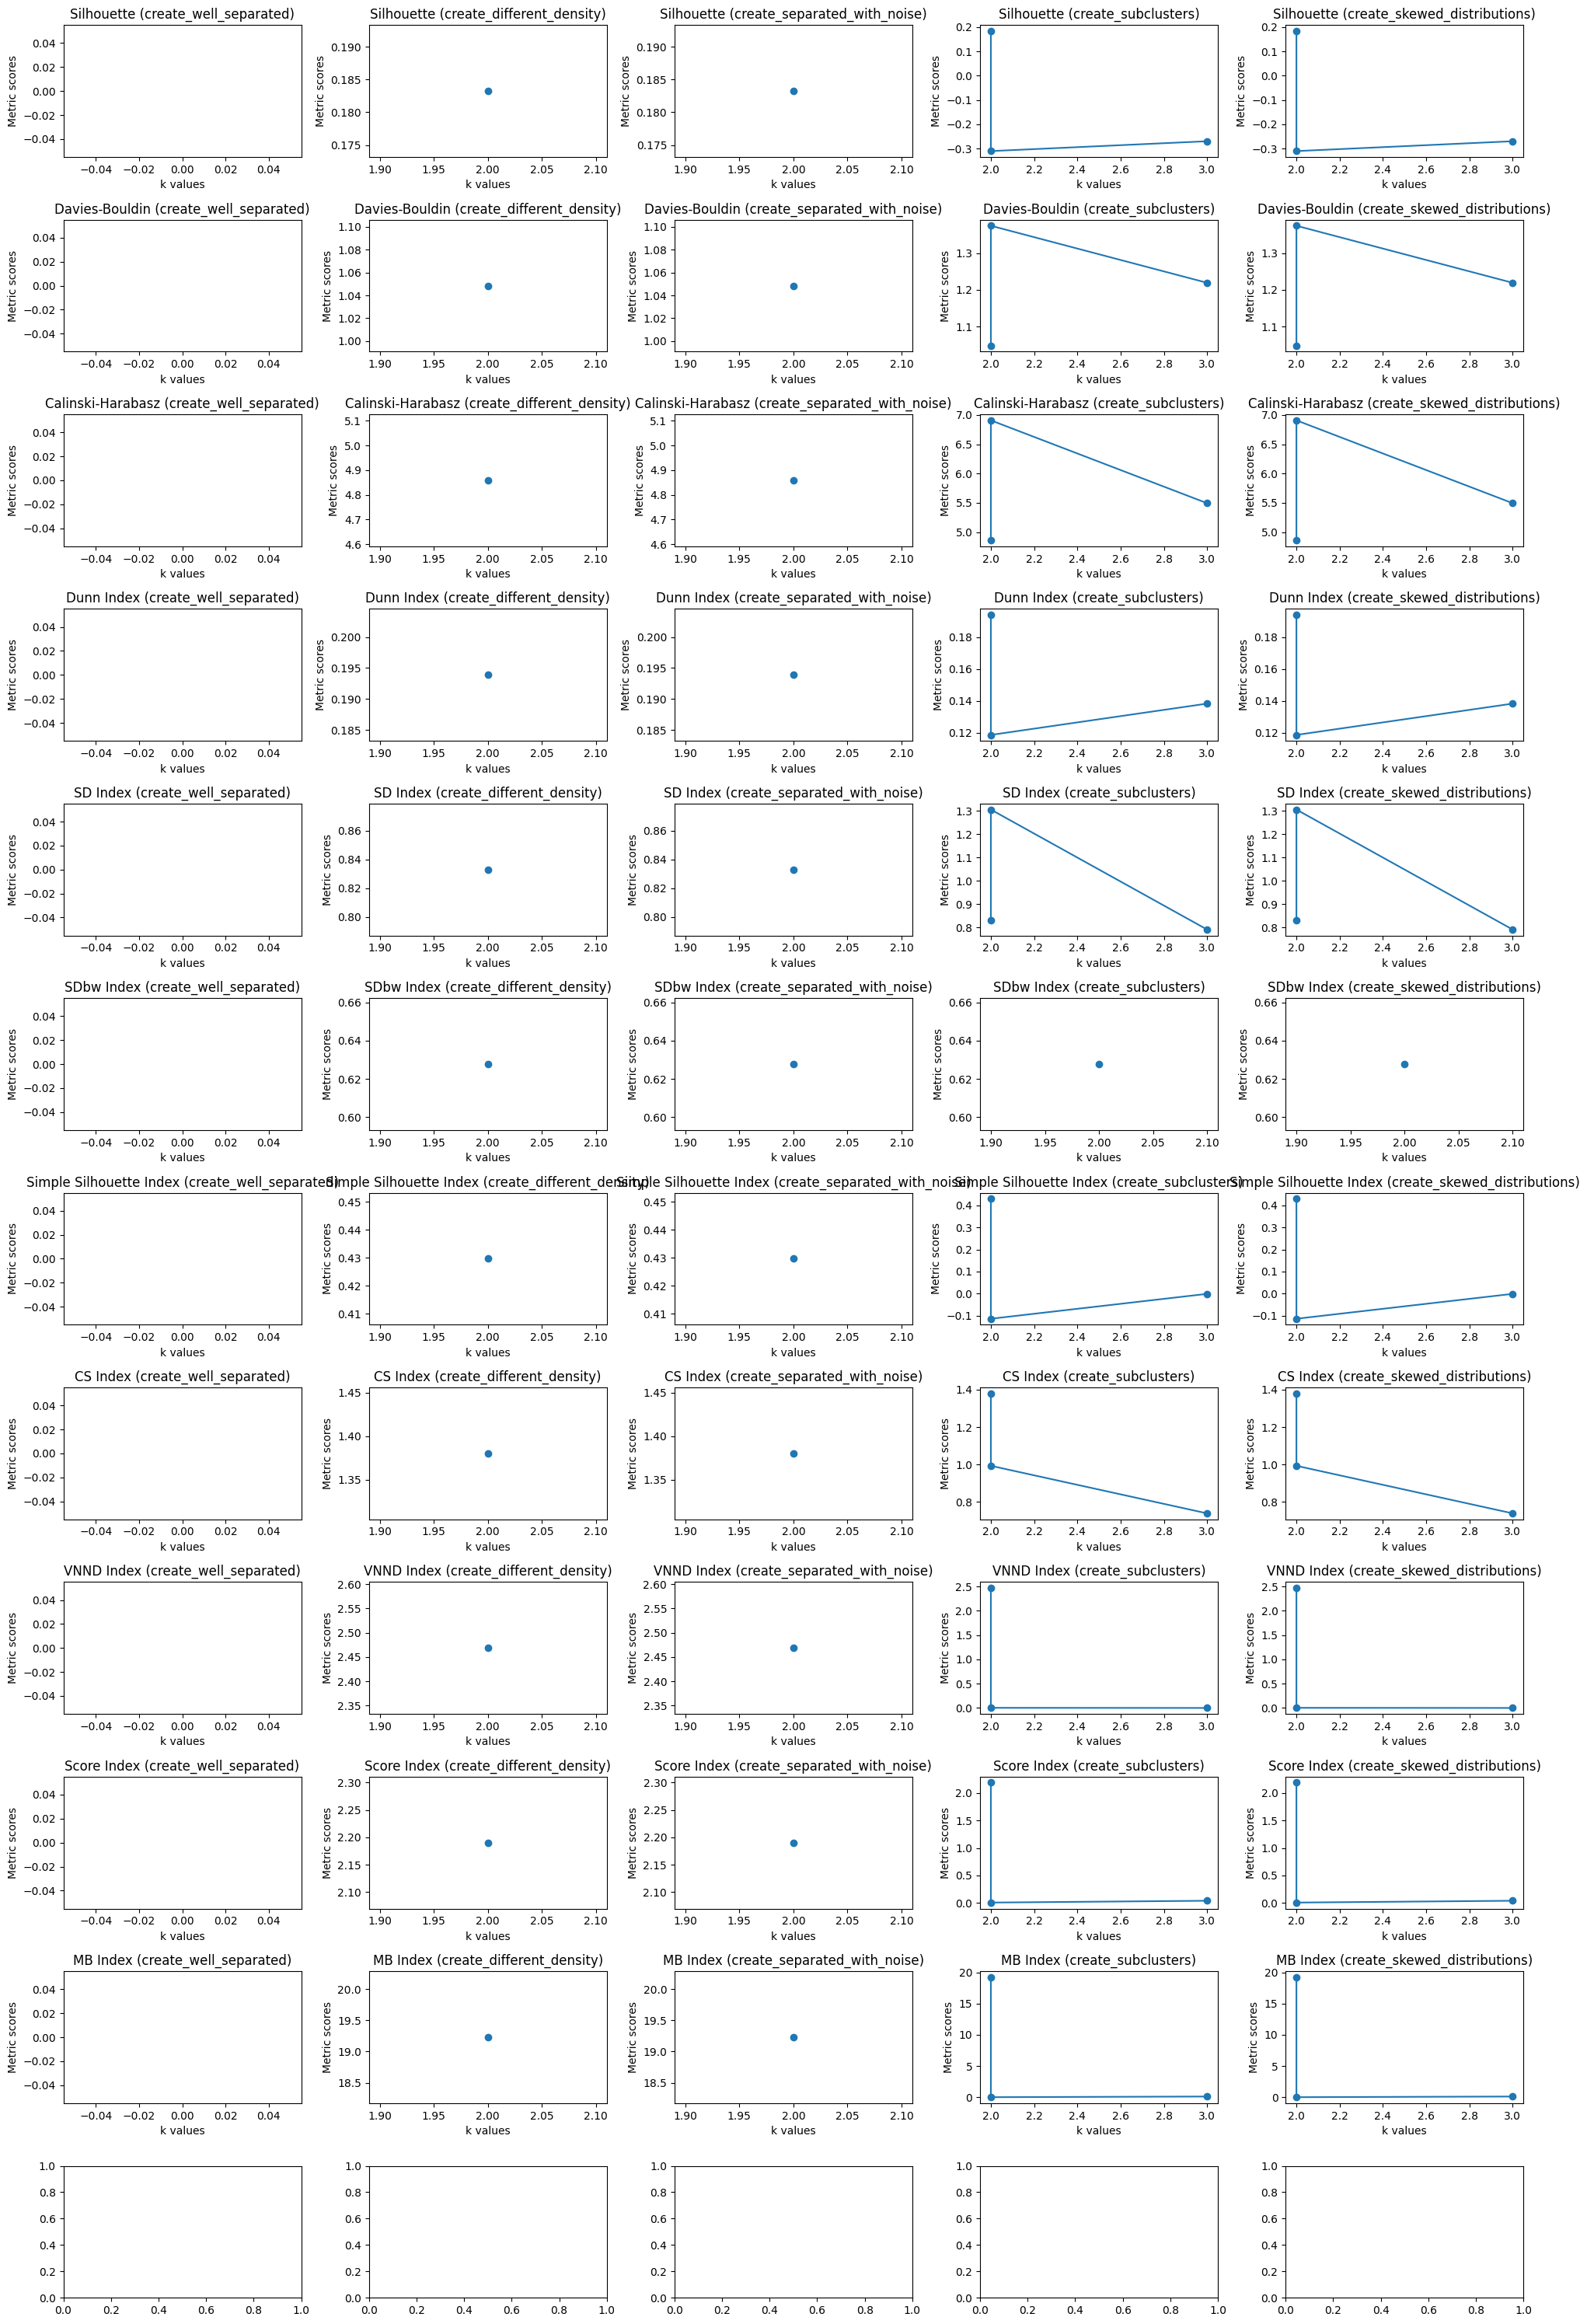

In [ ]:
import matplotlib.pyplot as plt
import json

metric_names = [
    "Silhouette", "Davies-Bouldin", "Calinski-Harabasz", "Dunn Index", "SD Index",
    "SDbw Index", "Simple Silhouette Index", "CS Index", "VNND Index", "Score Index", "MB Index"
]

def load_metrics(file_name):
    with open(file_name, "r") as f:
        return json.load(f)

data_function_names = [
    "create_well_separated", "create_different_density", "create_separated_with_noise", "create_subclusters", "create_skewed_distributions"
]

fig, axs = plt.subplots(12, 5, figsize=(20, 30))  # Adjust subplot grid for 12 metrics and 5 datasets
axs = axs.flatten()

for metric_index, metric_name in enumerate(metric_names):
    for data_function_index, data_function_name in enumerate(data_function_names):
        metrics = load_metrics(f"clustering_metrics_{data_function_name}.json")
        ks = [m[0] for m in metrics if metric_name in m[2]]
        scores = [m[2][metric_name] for m in metrics if metric_name in m[2]]

        row = metric_index
        col = data_function_index
        ax = axs[row * 5 + col]
        ax.plot(ks, scores, marker='o', linestyle='-')
        ax.set_title(f'{metric_name} ({data_function_name})')
        ax.set_xlabel('k values')
        ax.set_ylabel('Metric scores')

plt.tight_layout()
plt.show()


#Cluster metrics

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

# Define the compute_cluster_metrics function
def compute_cluster_metrics(X, labels):
    unique_labels = np.unique(labels)
    metrics = {}

    for k in unique_labels:
        cluster_points = X[labels == k]
        centroid = np.mean(cluster_points, axis=0)
        distances = pdist(cluster_points, metric='euclidean')
        dist_matrix = squareform(distances)

        # 1. Root Mean Squared Standard Deviation (RMSSTD)
        rmsstd = np.sqrt(np.sum((cluster_points - centroid) ** 2) / len(cluster_points))

        # 2. Maximum Distance to the Centroid
        max_dist_to_centroid = np.max(np.sqrt(np.sum((cluster_points - centroid) ** 2, axis=1)))

        # 3. Average Distance to the Centroid
        avg_dist_to_centroid = np.mean(np.sqrt(np.sum((cluster_points - centroid) ** 2, axis=1)))

        # 4. Maximum Distance between Points in the Cluster
        max_dist_between_points = np.max(dist_matrix)

        # 5. Average Distance between Points in the Cluster
        avg_dist_between_points = np.mean(dist_matrix[np.triu_indices_from(dist_matrix, k=1)])  # exclude diagonal

        metrics[k] = {
            'RMSSTD': rmsstd,
            'Maximum Distance to Centroid': max_dist_to_centroid,
            'Average Distance to Centroid': avg_dist_to_centroid,
            'Maximum Distance between Points': max_dist_between_points,
            'Average Distance between Points': avg_dist_between_points
        }

    return metrics




In [ ]:
import csv
# Instantiate the Wishart clustering model with the best k and h values
wishart_neighbors = 82  # Set appropriate number of neighbors
significance_level = 15  # Set appropriate significance level


wishart = Wishart(wishart_neighbors, significance_level)
labels_kb = wishart.fit(vectors_kanuri_bot)

# Compute the cluster metrics
cluster_metrics = compute_cluster_metrics(vectors_kanuri_bot, labels_kb)

# Save the metrics to a CSV file
output_file_csv = 'kanuri_bot_metrics.csv'
with open(output_file_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the header
    header = ['Cluster', 'RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid', 'Maximum Distance between Points', 'Average Distance between Points']
    writer.writerow(header)
    # Write the metrics
    for cluster, metrics in cluster_metrics.items():
        row = [cluster] + list(metrics.values())
        writer.writerow(row)

print(f"Metrics saved to {output_file_csv}")

Start clustering
Metrics saved to kanuri_bot_metrics.csv


In [ ]:
import csv
wishart_neighbors, significance_level = 74,15

# Fit the model to the vectors_kanuri_bot dataset and get the labels
wishart = Wishart(wishart_neighbors, significance_level)
labels_kh = wishart.fit(vectors_kanuri_human)

# Compute the cluster metrics
cluster_metrics = compute_cluster_metrics(vectors_kanuri_human, labels_kh)

# Save the metrics to a CSV file
output_file_csv = 'kanuri_human_metrics.csv'
with open(output_file_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the header
    header = ['Cluster', 'RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid', 'Maximum Distance between Points', 'Average Distance between Points']
    writer.writerow(header)
    # Write the metrics
    for cluster, metrics in cluster_metrics.items():
        row = [cluster] + list(metrics.values())
        writer.writerow(row)

print(f"Metrics saved to {output_file_csv}")

Start clustering
Metrics saved to kanuri_human_metrics.csv


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
wishart_neighbors, significance_level = 79,15
wishart =Wishart(wishart_neighbors, significance_level)
labels_mb = wishart.fit(vectors_miskito_bot)
cluster_metrics = compute_cluster_metrics(vectors_miskito_bot, labels_mb)
# Save the metrics to a CSV file
output_file_csv = 'miskito_bot_metrics.csv'
with open(output_file_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the header
    header = ['Cluster', 'RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid', 'Maximum Distance between Points', 'Average Distance between Points']
    writer.writerow(header)
    # Write the metrics
    for cluster, metrics in cluster_metrics.items():
        row = [cluster] + list(metrics.values())
        writer.writerow(row)

print(f"Metrics saved to {output_file_csv}")

Start clustering
Metrics saved to miskito_bot_metrics.csv


In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

def compute_cluster_metrics(X, labels):
    unique_labels = np.unique(labels)
    metrics = {}

    for k in unique_labels:
        if k == -1:
            continue  # Skip noise points

        cluster_points = X[labels == k]
        if len(cluster_points) == 0:
            continue  # Skip empty clusters

        centroid = np.mean(cluster_points, axis=0)
        distances = pdist(cluster_points, metric='euclidean')
        dist_matrix = squareform(distances)

        # 1. Root Mean Squared Standard Deviation (RMSSTD)
        rmsstd = np.sqrt(np.sum((cluster_points - centroid) ** 2) / len(cluster_points))

        # 2. Maximum Distance to the Centroid
        max_dist_to_centroid = np.max(np.sqrt(np.sum((cluster_points - centroid) ** 2, axis=1)))

        # 3. Average Distance to the Centroid
        avg_dist_to_centroid = np.mean(np.sqrt(np.sum((cluster_points - centroid) ** 2, axis=1)))

        # 4. Maximum Distance between Points in the Cluster
        max_dist_between_points = np.max(dist_matrix)

        # 5. Average Distance between Points in the Cluster
        avg_dist_between_points = np.mean(dist_matrix[np.triu_indices_from(dist_matrix, k=1)])  # exclude diagonal

        metrics[k] = {
            'RMSSTD': rmsstd,
            'Maximum Distance to Centroid': max_dist_to_centroid,
            'Average Distance to Centroid': avg_dist_to_centroid,
            'Maximum Distance between Points': max_dist_between_points,
            'Average Distance between Points': avg_dist_between_points
        }

    return metrics


wishart_neighbors, significance_level = 104,15
wishart = Wishart(wishart_neighbors, significance_level)
labels_mh = wishart.fit(vectors_miskito_human)
cluster_metrics = compute_cluster_metrics(vectors_miskito_human, labels_mh)
output_file_csv = 'miskito_human_metrics.csv'
with open(output_file_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the header
    header = ['Cluster', 'RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid', 'Maximum Distance between Points', 'Average Distance between Points']
    writer.writerow(header)
    # Write the metrics
    for cluster, metrics in cluster_metrics.items():
        row = [cluster] + list(metrics.values())
        writer.writerow(row)

print(f"Metrics saved to {output_file_csv}")

Start clustering
Metrics saved to miskito_human_metrics.csv


In [ ]:
wishart_neighbors, significance_level = 72,15

# Fit the model to the vectors_kanuri_bot dataset and get the labels
wishart = Wishart(wishart_neighbors, significance_level)
labels_fkb = wishart.fit(vectors_kanuri_bot_ft)
cluster_metrics = compute_cluster_metrics(vectors_kanuri_bot_ft, labels_fkb)

output_file_csv = 'kanuri_botft_metrics.csv'
with open(output_file_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the header
    header = ['Cluster', 'RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid', 'Maximum Distance between Points', 'Average Distance between Points']
    writer.writerow(header)
    # Write the metrics
    for cluster, metrics in cluster_metrics.items():
        row = [cluster] + list(metrics.values())
        writer.writerow(row)

print(f"Metrics saved to {output_file_csv}")


Start clustering
Metrics saved to kanuri_botft_metrics.csv


In [ ]:
wishart_neighbors, significance_level = 29,15

# Fit the model to the vectors_kanuri_bot dataset and get the labels
wishart = Wishart(wishart_neighbors, significance_level)
labels_fkh = wishart.fit(vectors_kanuri_human_ft)
cluster_metrics = compute_cluster_metrics(vectors_kanuri_human_ft, labels_fkh)
output_file_csv = 'kanuri_humanft_metrics.csv'
with open(output_file_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the header
    header = ['Cluster', 'RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid', 'Maximum Distance between Points', 'Average Distance between Points']
    writer.writerow(header)
    # Write the metrics
    for cluster, metrics in cluster_metrics.items():
        row = [cluster] + list(metrics.values())
        writer.writerow(row)

print(f"Metrics saved to {output_file_csv}")

Start clustering
Metrics saved to kanuri_humanft_metrics.csv


In [ ]:
wishart_neighbors, significance_level = 75,15

# Fit the model to the vectors_kanuri_bot dataset and get the labels
wishart = Wishart(wishart_neighbors, significance_level)
labels_fmb = wishart.fit(vectors_miskito_bot_ft)
cluster_metrics = compute_cluster_metrics(vectors_miskito_bot_ft, labels_fmb)
output_file_csv = 'miskito_botft_metrics.csv'
with open(output_file_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the header
    header = ['Cluster', 'RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid', 'Maximum Distance between Points', 'Average Distance between Points']
    writer.writerow(header)
    # Write the metrics
    for cluster, metrics in cluster_metrics.items():
        row = [cluster] + list(metrics.values())
        writer.writerow(row)

print(f"Metrics saved to {output_file_csv}")

Start clustering
Metrics saved to miskito_botft_metrics.csv


In [ ]:
wishart_neighbors, significance_level = 62,15

# Fit the model to the vectors_kanuri_bot dataset and get the labels
wishart = Wishart(wishart_neighbors, significance_level)
labels_fmh = wishart.fit(vectors_miskito_human_ft)
cluster_metrics = compute_cluster_metrics(vectors_miskito_human_ft, labels_fmh)
output_file_csv = 'miskito_humanft_metrics.csv'
with open(output_file_csv, 'w', newline='') as f:
    writer = csv.writer(f)
    # Write the header
    header = ['Cluster', 'RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid', 'Maximum Distance between Points', 'Average Distance between Points']
    writer.writerow(header)
    # Write the metrics
    for cluster, metrics in cluster_metrics.items():
        row = [cluster] + list(metrics.values())
        writer.writerow(row)

print(f"Metrics saved to {output_file_csv}")

Start clustering
Metrics saved to miskito_humanft_metrics.csv


In [ ]:

df = pd.read_csv('kanuri_bot_metrics.csv')

# Print the head (first 5 rows) of the DataFrame
print(df.head())


   Cluster    RMSSTD  Maximum Distance to Centroid  \
0        0  1.894241                      3.683995   
1        1  0.415949                      0.841453   
2        2  0.387465                      0.578084   
3        3  0.340164                      0.560797   
4        4  0.344742                      0.508986   

   Average Distance to Centroid  Maximum Distance between Points  \
0                      1.808275                         6.213032   
1                      0.405331                         1.354094   
2                      0.377328                         1.090634   
3                      0.335838                         0.943800   
4                      0.336103                         0.856712   

   Average Distance between Points  
0                         2.504323  
1                         0.568687  
2                         0.531220  
3                         0.474243  
4                         0.481812  


#Single test hypothesis

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Load the metrics from CSV files
files = {
    'Kanuri Bot Word2Vec': 'kanuri_bot_metrics.csv',
    'Kanuri Human Word2Vec': 'kanuri_human_metrics.csv',
    'Miskito Bot Word2Vec': 'miskito_bot_metrics.csv',
    'Miskito Human Word2Vec': 'miskito_human_metrics.csv',
    'Kanuri Bot FastText': 'kanuri_botft_metrics.csv',
    'Kanuri Human FastText': 'kanuri_humanft_metrics.csv',
    'Miskito Bot FastText': 'miskito_botft_metrics.csv',
    'Miskito Human FastText': 'miskito_humanft_metrics.csv'
}

metrics_to_test = ['RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid', 'Maximum Distance between Points', 'Average Distance between Points']

def load_metrics(file):
    return pd.read_csv(file)

def perform_mann_whitney_test(metrics1, metrics2, metrics_to_test):
    results_summary = {'accepted': 0, 'rejected': 0}
    test_results = []

    for metric in metrics_to_test:
        data1 = metrics1[metric].dropna()
        data2 = metrics2[metric].dropna()
        stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')

        if p_value < 0.05:
            result = f"  -> Reject the null hypothesis: Distributions differ."
            results_summary['rejected'] += 1
        else:
            result = f"  -> Fail to reject the null hypothesis: No significant difference."
            results_summary['accepted'] += 1

        test_results.append((metric, stat, p_value, result))

    return results_summary, test_results

# Define pairs for comparison
comparison_pairs = [
    ('Kanuri Bot Word2Vec', 'Kanuri Human Word2Vec'),
    ('Miskito Bot Word2Vec', 'Miskito Human Word2Vec'),
    ('Kanuri Bot FastText', 'Kanuri Human FastText'),
    ('Miskito Bot FastText', 'Miskito Human FastText')
]

print("\nMann-Whitney U Test Results for Each Metric:")
for dataset1, dataset2 in comparison_pairs:
    print(f"\nComparing {dataset1} vs {dataset2}:")
    metrics1 = load_metrics(files[dataset1])
    metrics2 = load_metrics(files[dataset2])

    results_summary, test_results = perform_mann_whitney_test(metrics1, metrics2, metrics_to_test)

    for metric, stat, p_value, result in test_results:
        print(f"{metric}: U Statistic = {stat}, P-value = {p_value:.4e}")
        print(result)

    # Summarize results
    print("\nSummary:")
    print(f"Total Rejected: {results_summary['rejected']}")
    print(f"Total Accepted: {results_summary['accepted']}")



Mann-Whitney U Test Results for Each Metric:

Comparing Kanuri Bot Word2Vec vs Kanuri Human Word2Vec:
RMSSTD: U Statistic = 8635.0, P-value = 6.7967e-13
  -> Reject the null hypothesis: Distributions differ.
Maximum Distance to Centroid: U Statistic = 8458.0, P-value = 5.9410e-12
  -> Reject the null hypothesis: Distributions differ.
Average Distance to Centroid: U Statistic = 8667.0, P-value = 4.5489e-13
  -> Reject the null hypothesis: Distributions differ.
Maximum Distance between Points: U Statistic = 8552.0, P-value = 1.8997e-12
  -> Reject the null hypothesis: Distributions differ.
Average Distance between Points: U Statistic = 8561.0, P-value = 6.6806e-14
  -> Reject the null hypothesis: Distributions differ.

Summary:
Total Rejected: 5
Total Accepted: 0

Comparing Miskito Bot Word2Vec vs Miskito Human Word2Vec:
RMSSTD: U Statistic = 125.0, P-value = 2.3767e-04
  -> Reject the null hypothesis: Distributions differ.
Maximum Distance to Centroid: U Statistic = 125.0, P-value = 2.

#Multiple test Hypothesis

In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu
import numpy as np

# Load metrics from CSV files
kanuri_bot_metrics = pd.read_csv('kanuri_bot_metrics.csv')
kanuri_human_metrics = pd.read_csv('kanuri_human_metrics.csv')
miskito_bot_metrics = pd.read_csv('miskito_bot_metrics.csv')
miskito_human_metrics = pd.read_csv('miskito_human_metrics.csv')
kanuri_botft_metrics = pd.read_csv('kanuri_botft_metrics.csv')
kanuri_humanft_metrics = pd.read_csv('kanuri_humanft_metrics.csv')
miskito_botft_metrics = pd.read_csv('miskito_botft_metrics.csv')
miskito_humanft_metrics = pd.read_csv('miskito_humanft_metrics.csv')

# Define pairs of datasets to compare
comparisons = [
    ('Kanuri Bot Word2Vec', kanuri_bot_metrics, 'Kanuri Human Word2Vec', kanuri_human_metrics),
    ('Miskito Bot Word2Vec', miskito_bot_metrics, 'Miskito Human Word2Vec', miskito_human_metrics),
    ('Kanuri Bot FastText', kanuri_botft_metrics, 'Kanuri Human FastText', kanuri_humanft_metrics),
    ('Miskito Bot FastText', miskito_botft_metrics, 'Miskito Human FastText', miskito_humanft_metrics)
]

metrics_to_test = ['RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid', 'Maximum Distance between Points', 'Average Distance between Points']
alpha = 0.05

# Store results
results = []

for comparison in comparisons:
    name1, metrics1, name2, metrics2 = comparison
    print(f"\nComparing {name1} vs {name2}:")
    comparison_results = {'name1': name1, 'name2': name2, 'metrics': []}

    p_values = []
    for metric in metrics_to_test:
        stat, p_value = mannwhitneyu(metrics1[metric], metrics2[metric], alternative='two-sided')
        comparison_results['metrics'].append((metric, stat, p_value))
        p_values.append(p_value)

    # Apply Holm-Bonferroni correction
    p_values = np.array(p_values)
    sorted_indices = np.argsort(p_values)
    m = len(p_values)
    adjusted_p_values = np.zeros(m)

    for i in range(m):
        adjusted_p_values[sorted_indices[i]] = min((alpha / (m - i)), 1) * (p_values[sorted_indices[i]] * (m - i))

    comparison_results['adjusted_p_values'] = adjusted_p_values
    results.append(comparison_results)

    for i, (metric, stat, p_value) in enumerate(comparison_results['metrics']):
        print(f"{metric}: U Statistic = {stat}, P-value = {p_value:.4e}, Adjusted P-value = {adjusted_p_values[i]:.4e}")
        if adjusted_p_values[i] < alpha:
            print("  -> Reject the null hypothesis: Distributions differ.")
        else:
            print("  -> Fail to reject the null hypothesis: No significant difference.")

# Save results for further analysis
results_df = pd.DataFrame(results)
results_df.to_csv('multiple_testing_results.csv', index=False)
print("\nResults have been saved to 'multiple_testing_results.csv'")



Comparing Kanuri Bot Word2Vec vs Kanuri Human Word2Vec:
RMSSTD: U Statistic = 8635.0, P-value = 6.7967e-13, Adjusted P-value = 3.3984e-14
  -> Reject the null hypothesis: Distributions differ.
Maximum Distance to Centroid: U Statistic = 8458.0, P-value = 5.9410e-12, Adjusted P-value = 2.9705e-13
  -> Reject the null hypothesis: Distributions differ.
Average Distance to Centroid: U Statistic = 8667.0, P-value = 4.5489e-13, Adjusted P-value = 2.2745e-14
  -> Reject the null hypothesis: Distributions differ.
Maximum Distance between Points: U Statistic = 8552.0, P-value = 1.8997e-12, Adjusted P-value = 9.4983e-14
  -> Reject the null hypothesis: Distributions differ.
Average Distance between Points: U Statistic = nan, P-value = nan, Adjusted P-value = nan
  -> Fail to reject the null hypothesis: No significant difference.

Comparing Miskito Bot Word2Vec vs Miskito Human Word2Vec:
RMSSTD: U Statistic = 125.0, P-value = 2.3767e-04, Adjusted P-value = 1.1884e-05
  -> Reject the null hypothe

#Cluster Result Plotting

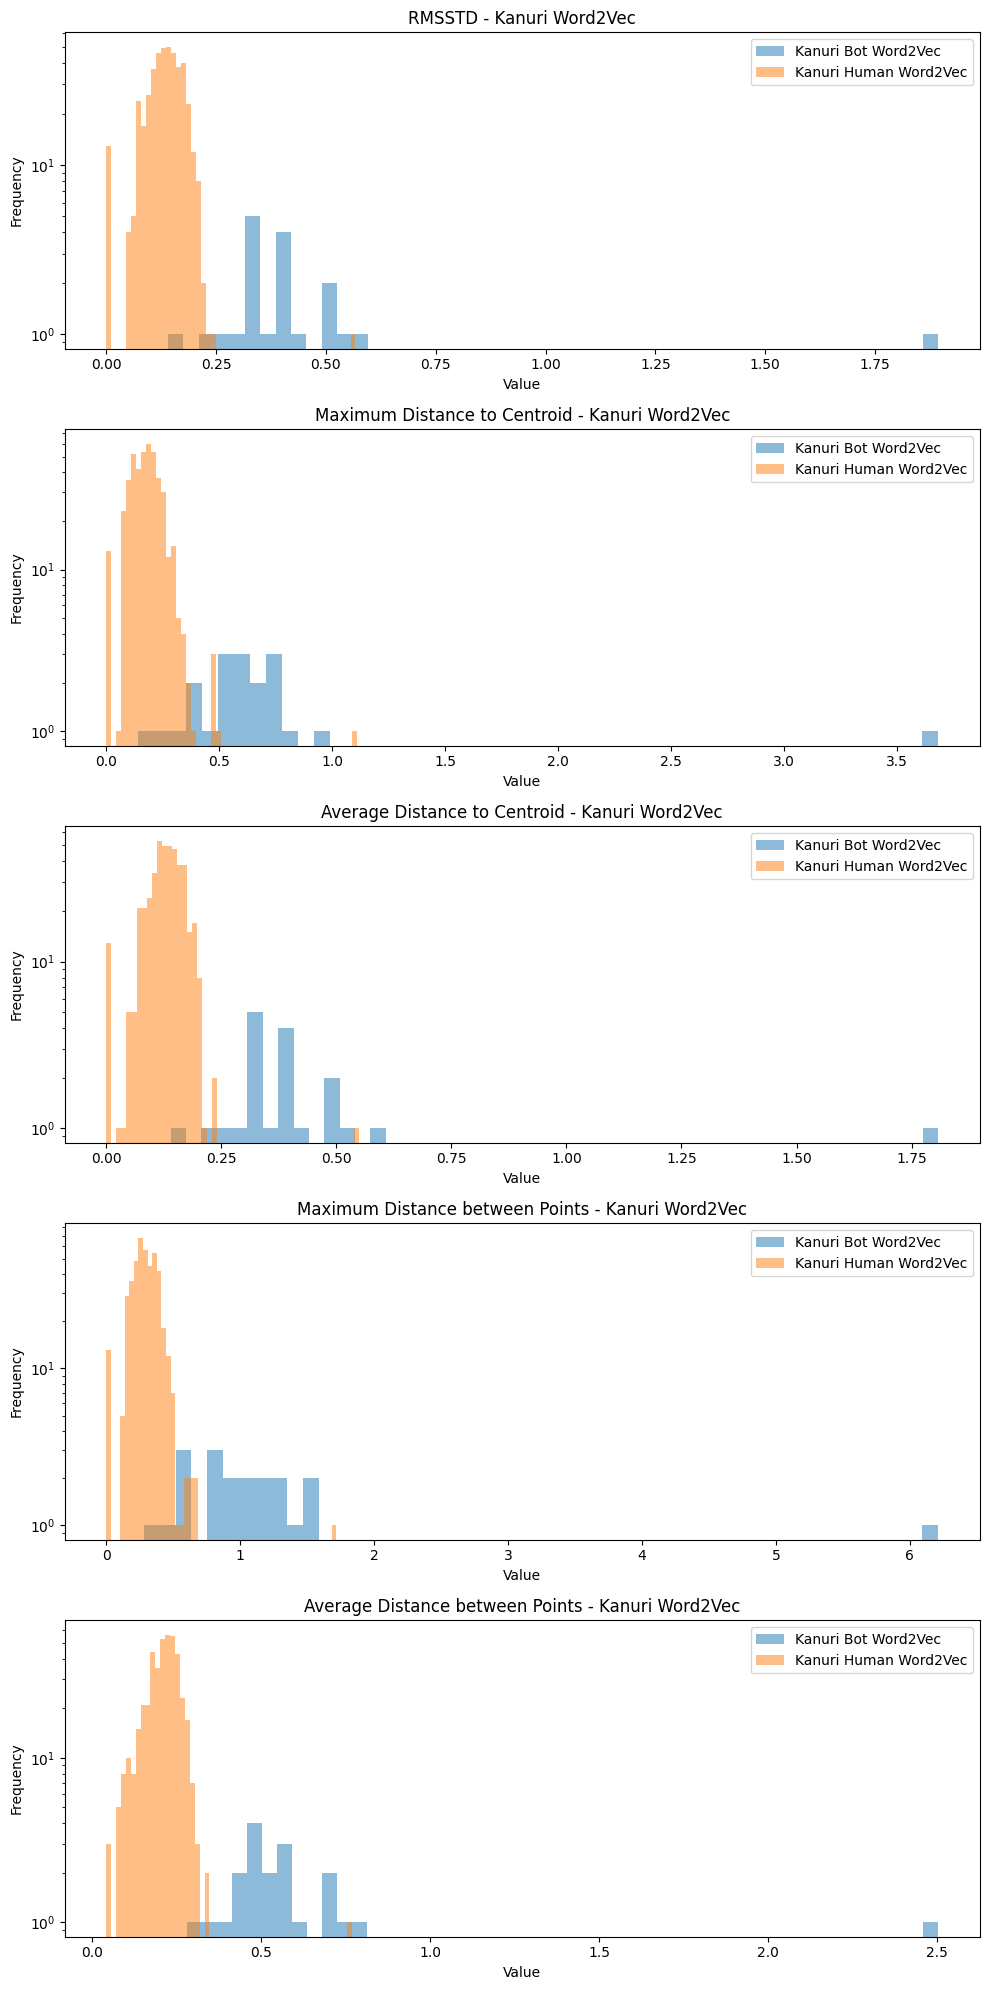

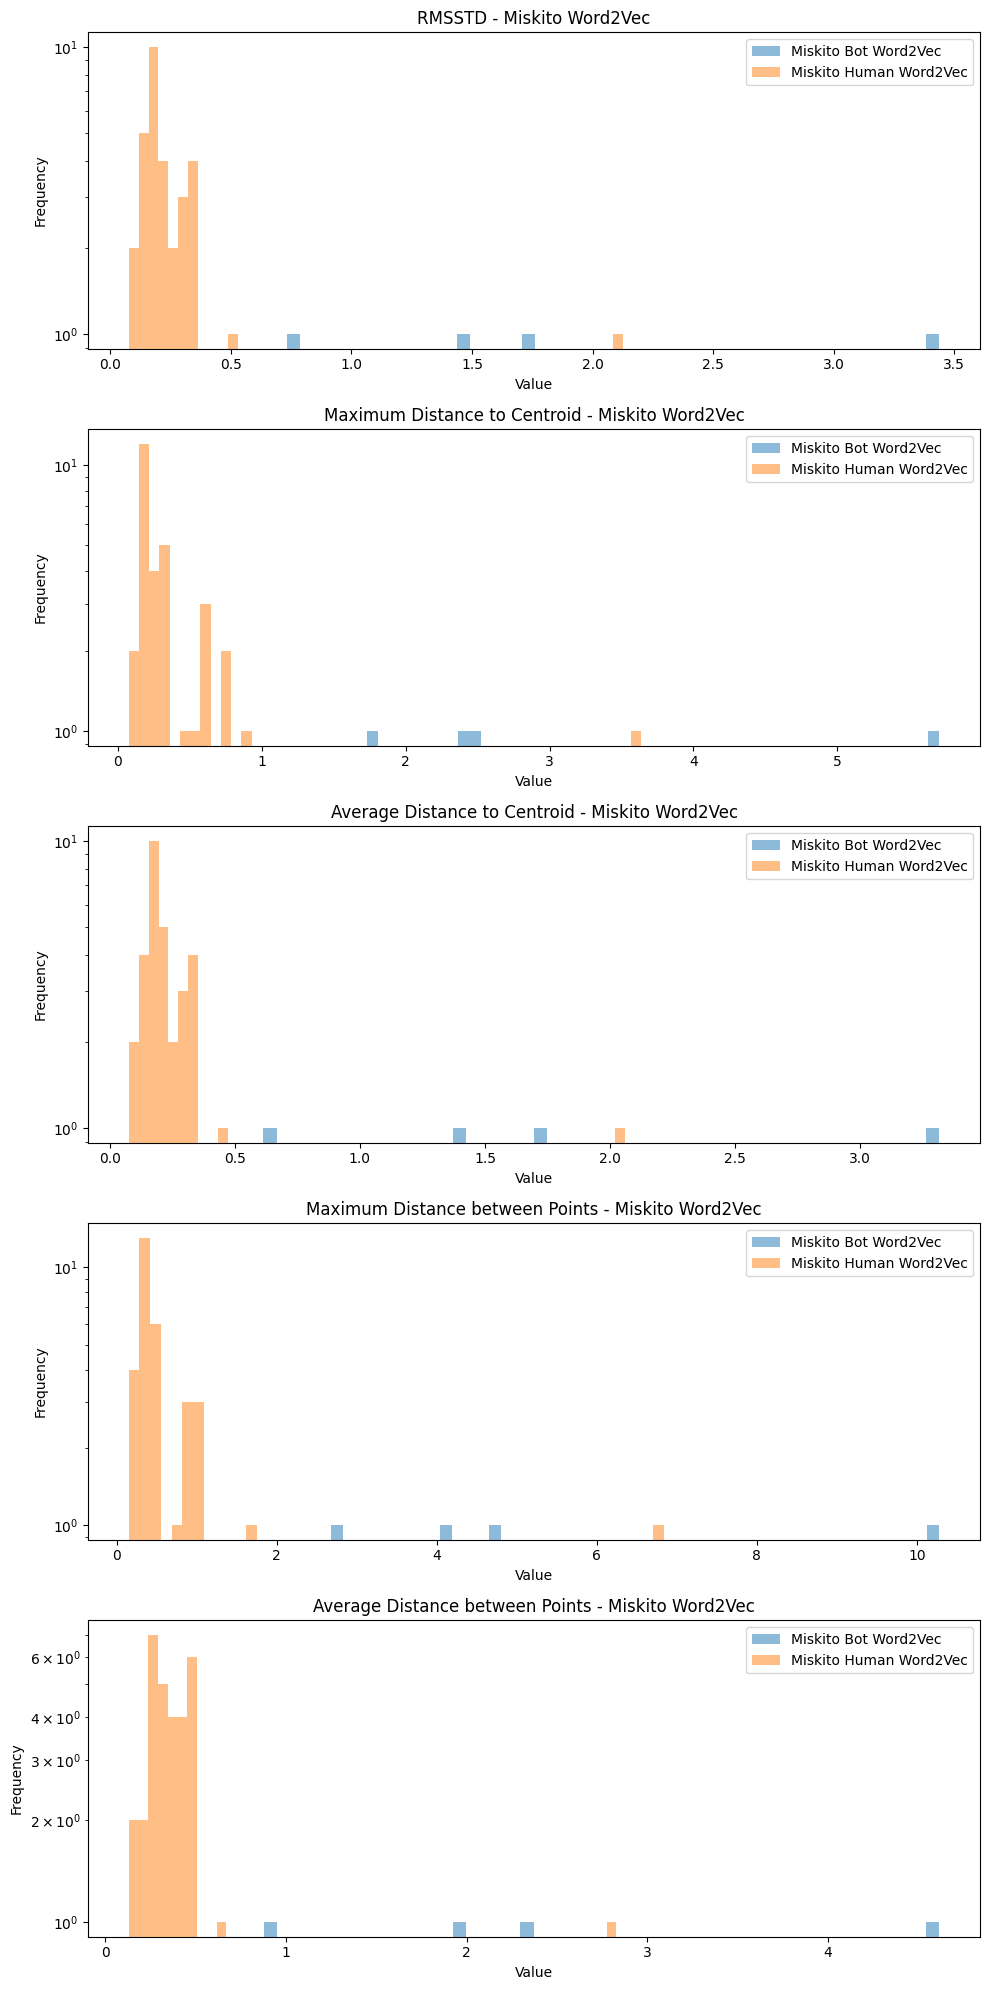

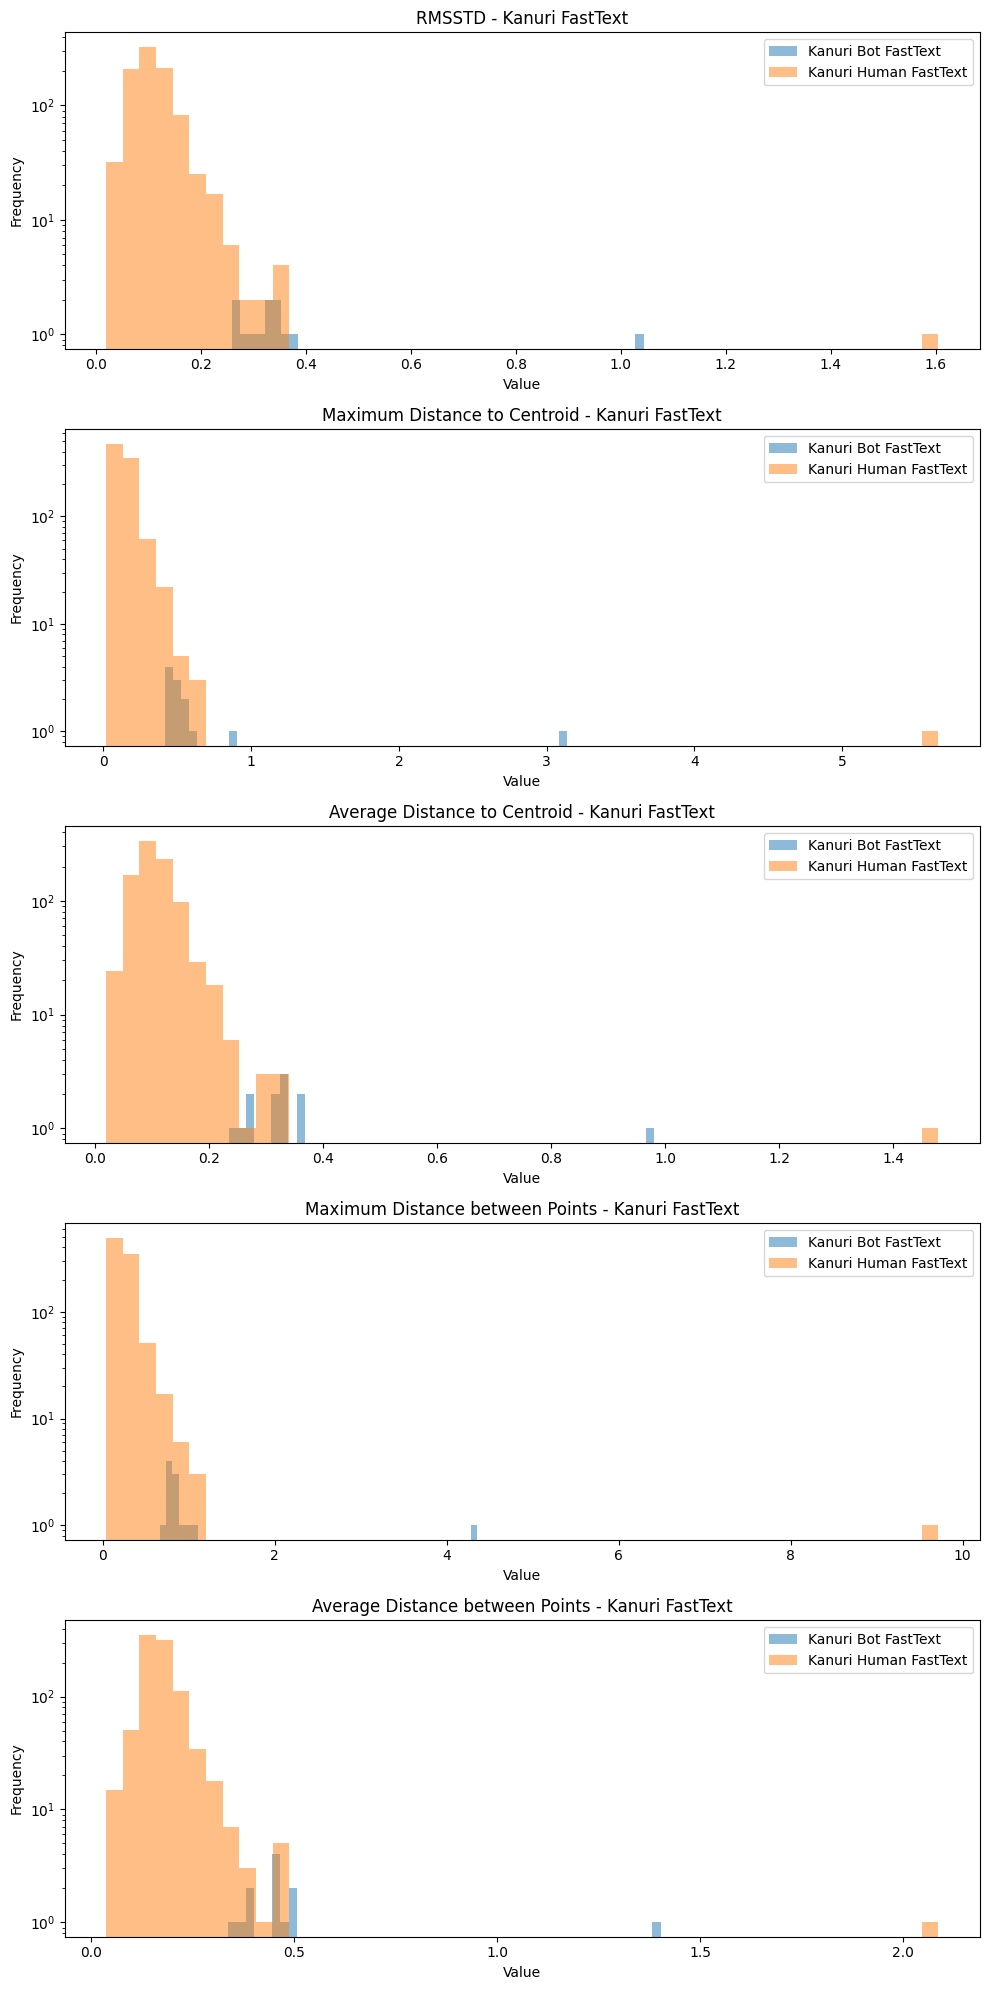

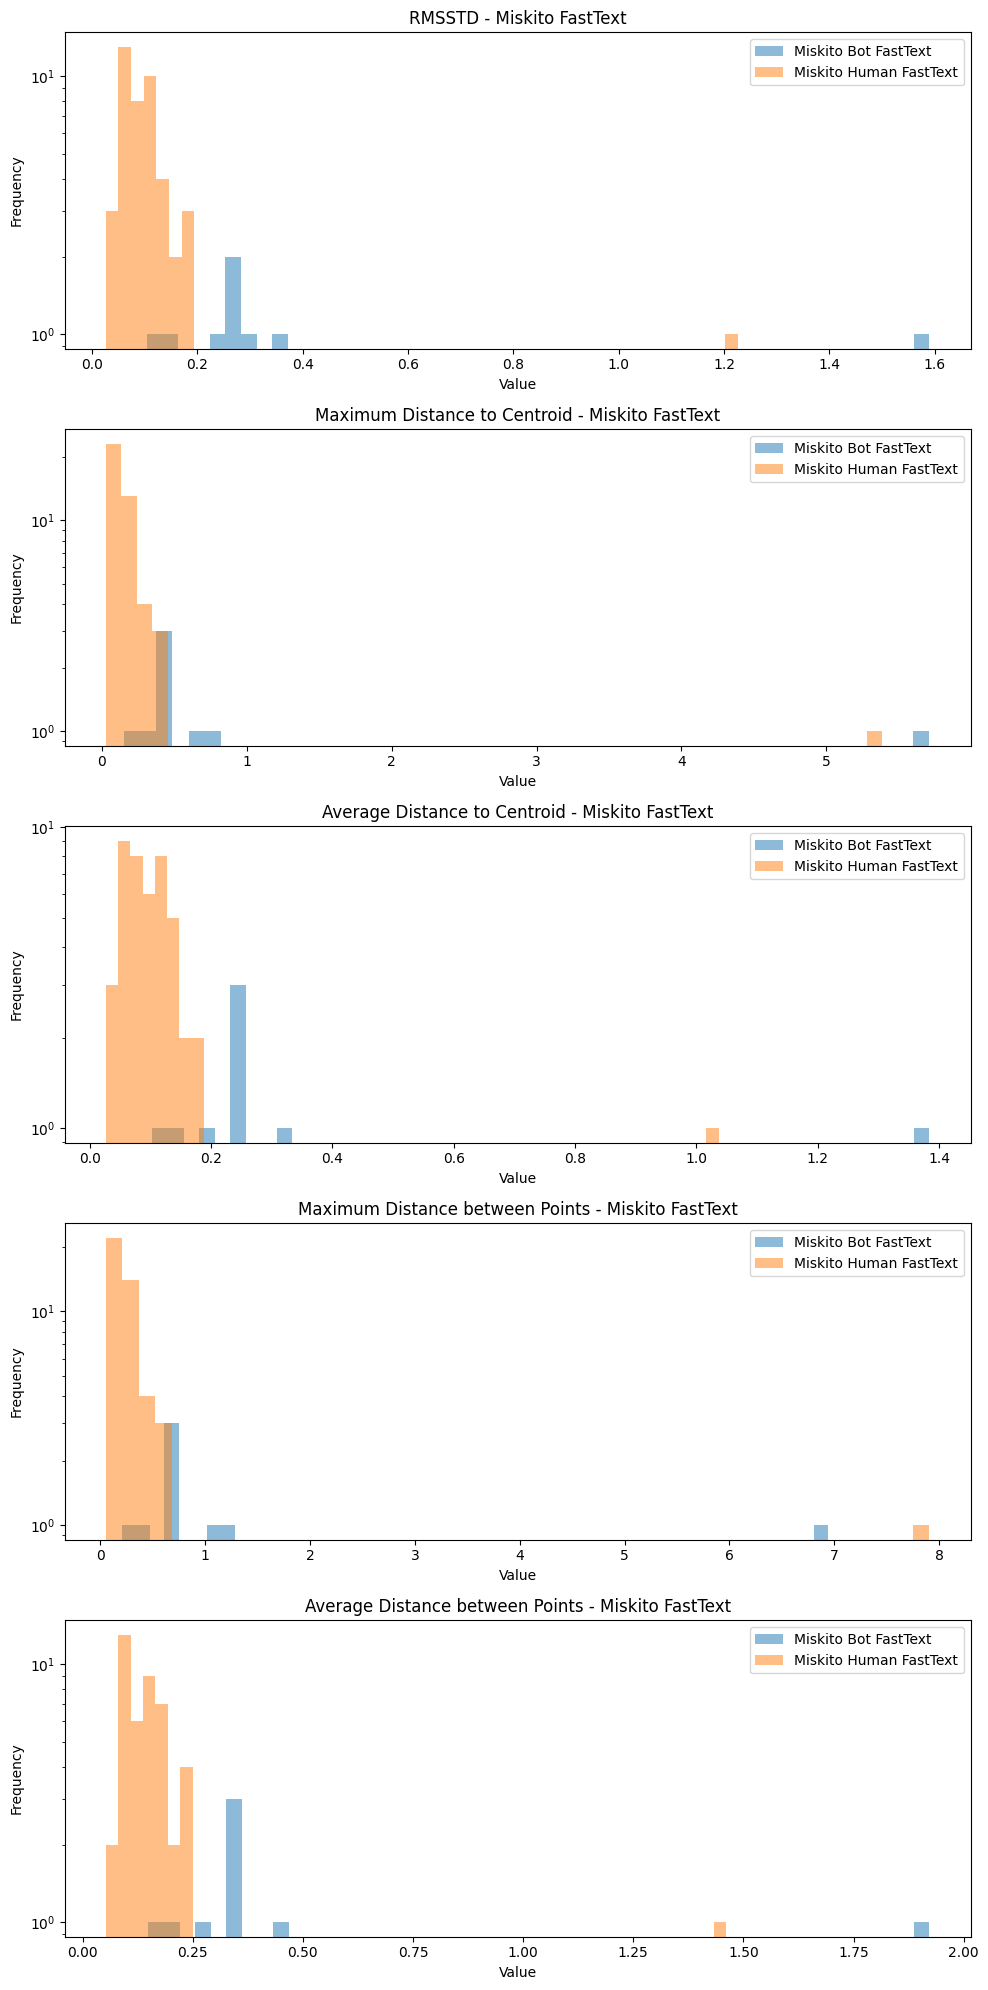

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
kanuri_bot_w2v_metrics = pd.read_csv('kanuri_bot_metrics.csv')
kanuri_human_w2v_metrics = pd.read_csv('kanuri_human_metrics.csv')
miskito_bot_w2v_metrics = pd.read_csv('miskito_bot_metrics.csv')
miskito_human_w2v_metrics = pd.read_csv('miskito_human_metrics.csv')
kanuri_bot_ft_metrics = pd.read_csv('kanuri_botft_metrics.csv')
kanuri_human_ft_metrics = pd.read_csv('kanuri_humanft_metrics.csv')
miskito_bot_ft_metrics = pd.read_csv('miskito_botft_metrics.csv')
miskito_human_ft_metrics = pd.read_csv('miskito_humanft_metrics.csv')

# List of metrics to plot
metrics_to_plot = ['RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid',
                   'Maximum Distance between Points', 'Average Distance between Points']

# Function to plot histograms for each metric
def plot_histograms(data1, data2, label1, label2, title):
    fig, axs = plt.subplots(len(metrics_to_plot), 1, figsize=(10, 20))
    for i, metric in enumerate(metrics_to_plot):
        axs[i].hist(data1[metric], bins=50, alpha=0.5, label=label1, log=True)
        axs[i].hist(data2[metric], bins=50, alpha=0.5, label=label2, log=True)
        axs[i].set_title(f'{metric} - {title}')
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
        axs[i].legend()
    plt.tight_layout()
    plt.show()

# Plot histograms for each comparison
plot_histograms(kanuri_bot_w2v_metrics, kanuri_human_w2v_metrics, 'Kanuri Bot Word2Vec', 'Kanuri Human Word2Vec', 'Kanuri Word2Vec')
plot_histograms(miskito_bot_w2v_metrics, miskito_human_w2v_metrics, 'Miskito Bot Word2Vec', 'Miskito Human Word2Vec', 'Miskito Word2Vec')
plot_histograms(kanuri_bot_ft_metrics, kanuri_human_ft_metrics, 'Kanuri Bot FastText', 'Kanuri Human FastText', 'Kanuri FastText')
plot_histograms(miskito_bot_ft_metrics, miskito_human_ft_metrics, 'Miskito Bot FastText', 'Miskito Human FastText', 'Miskito FastText')


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

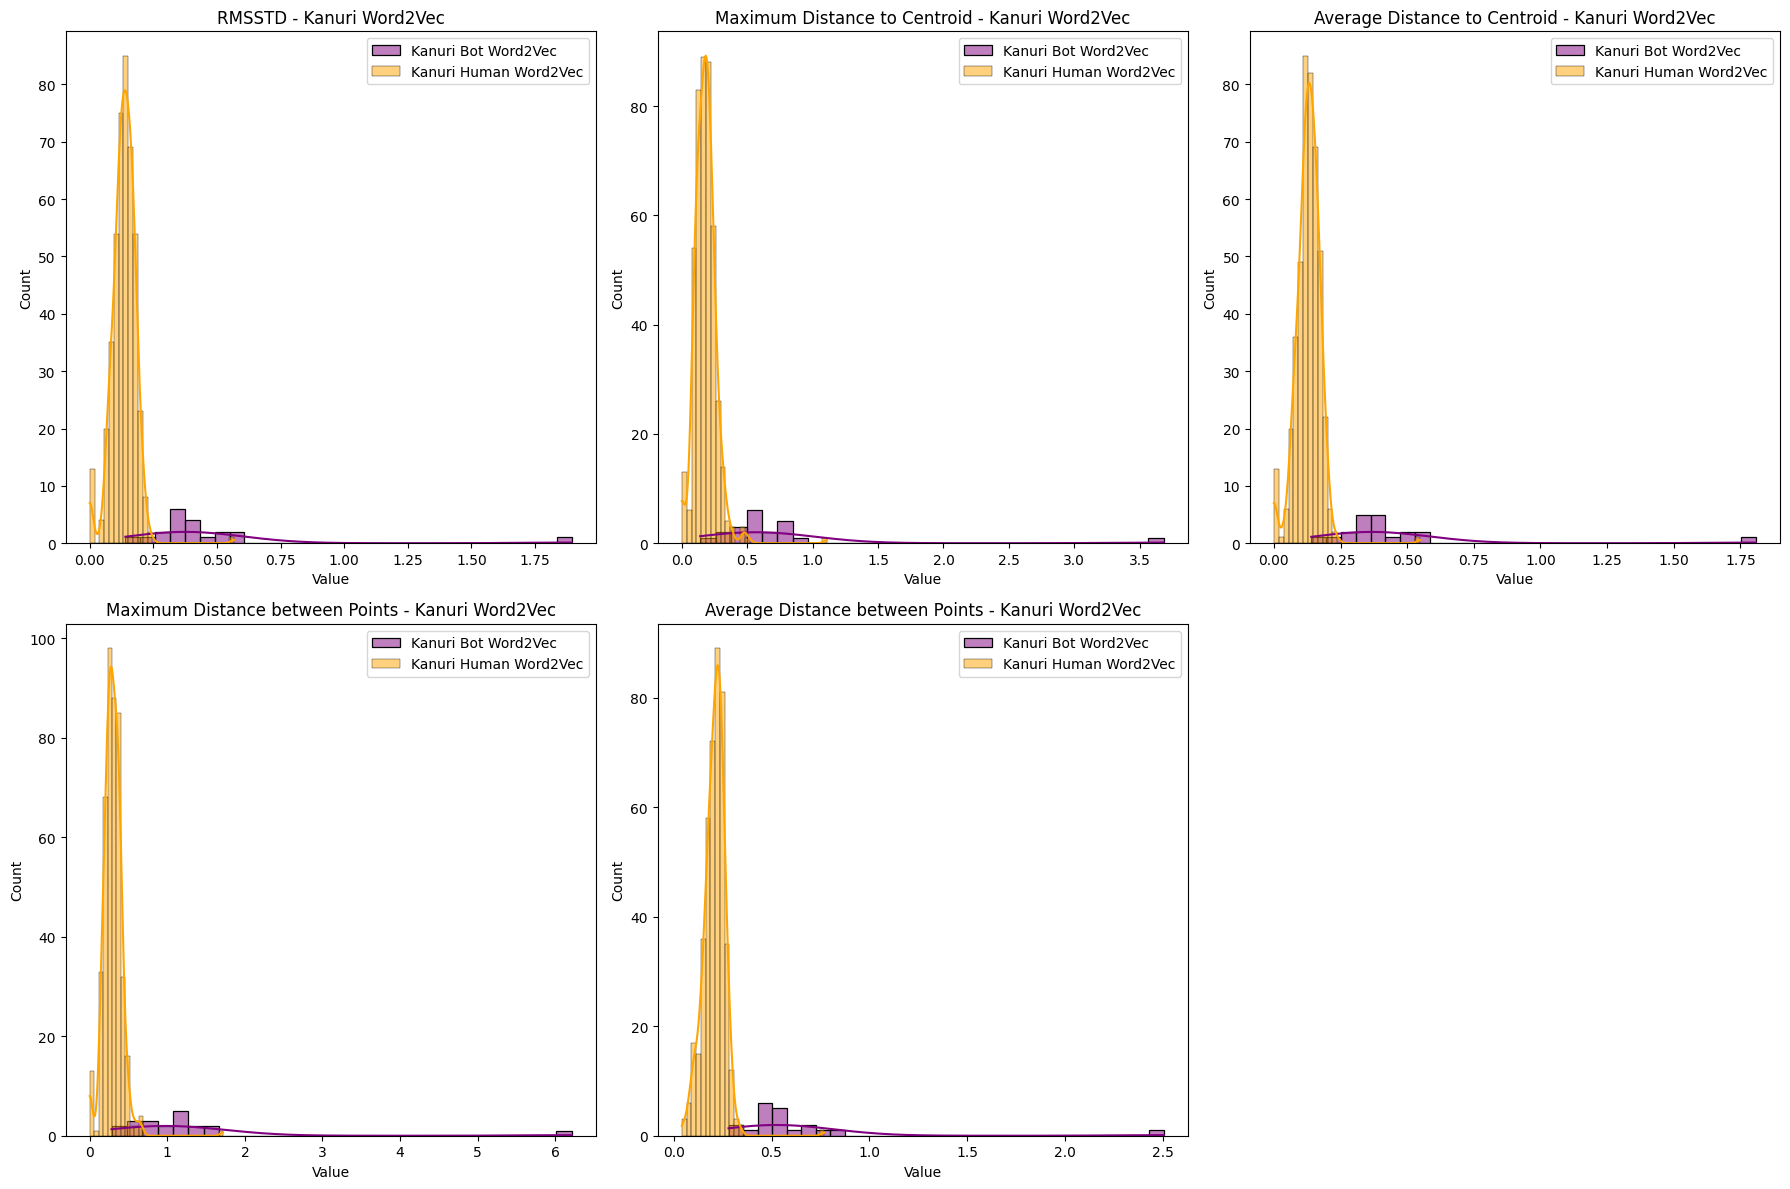

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

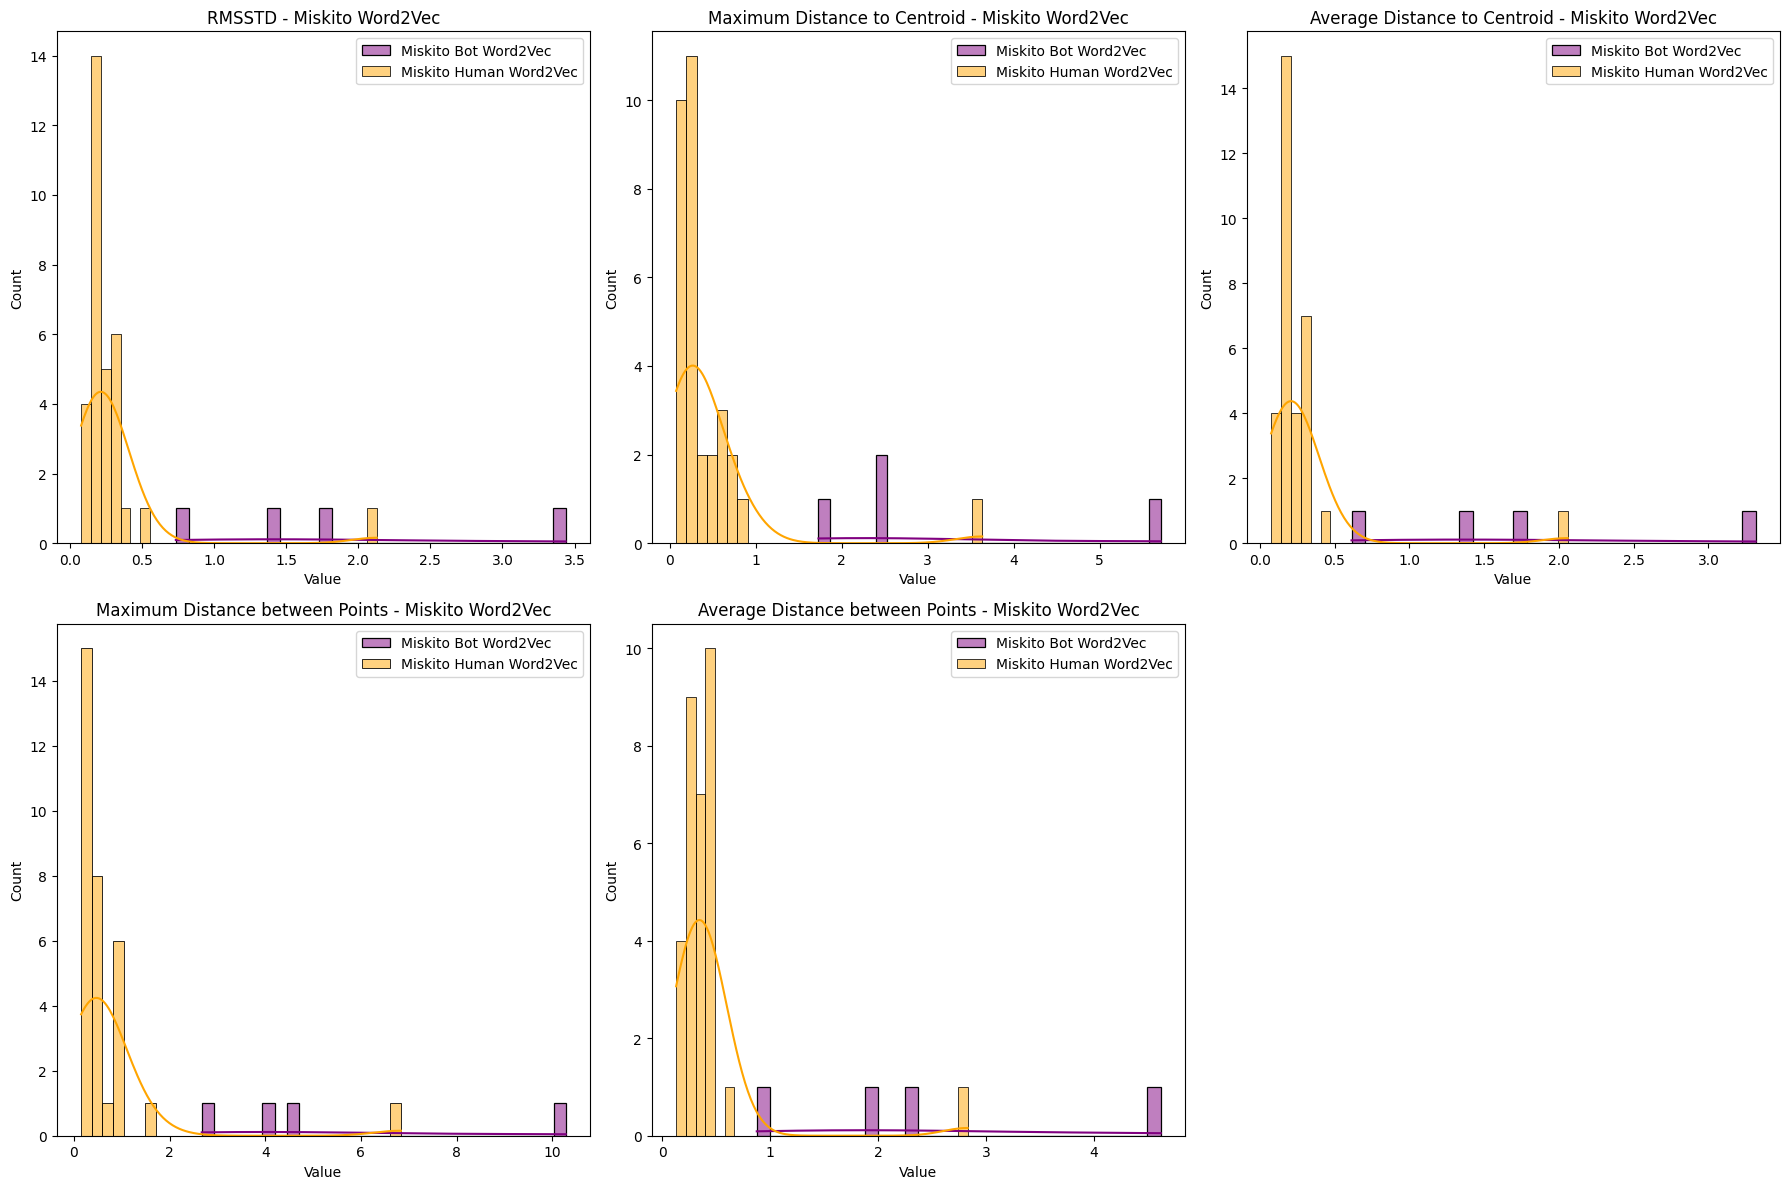

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

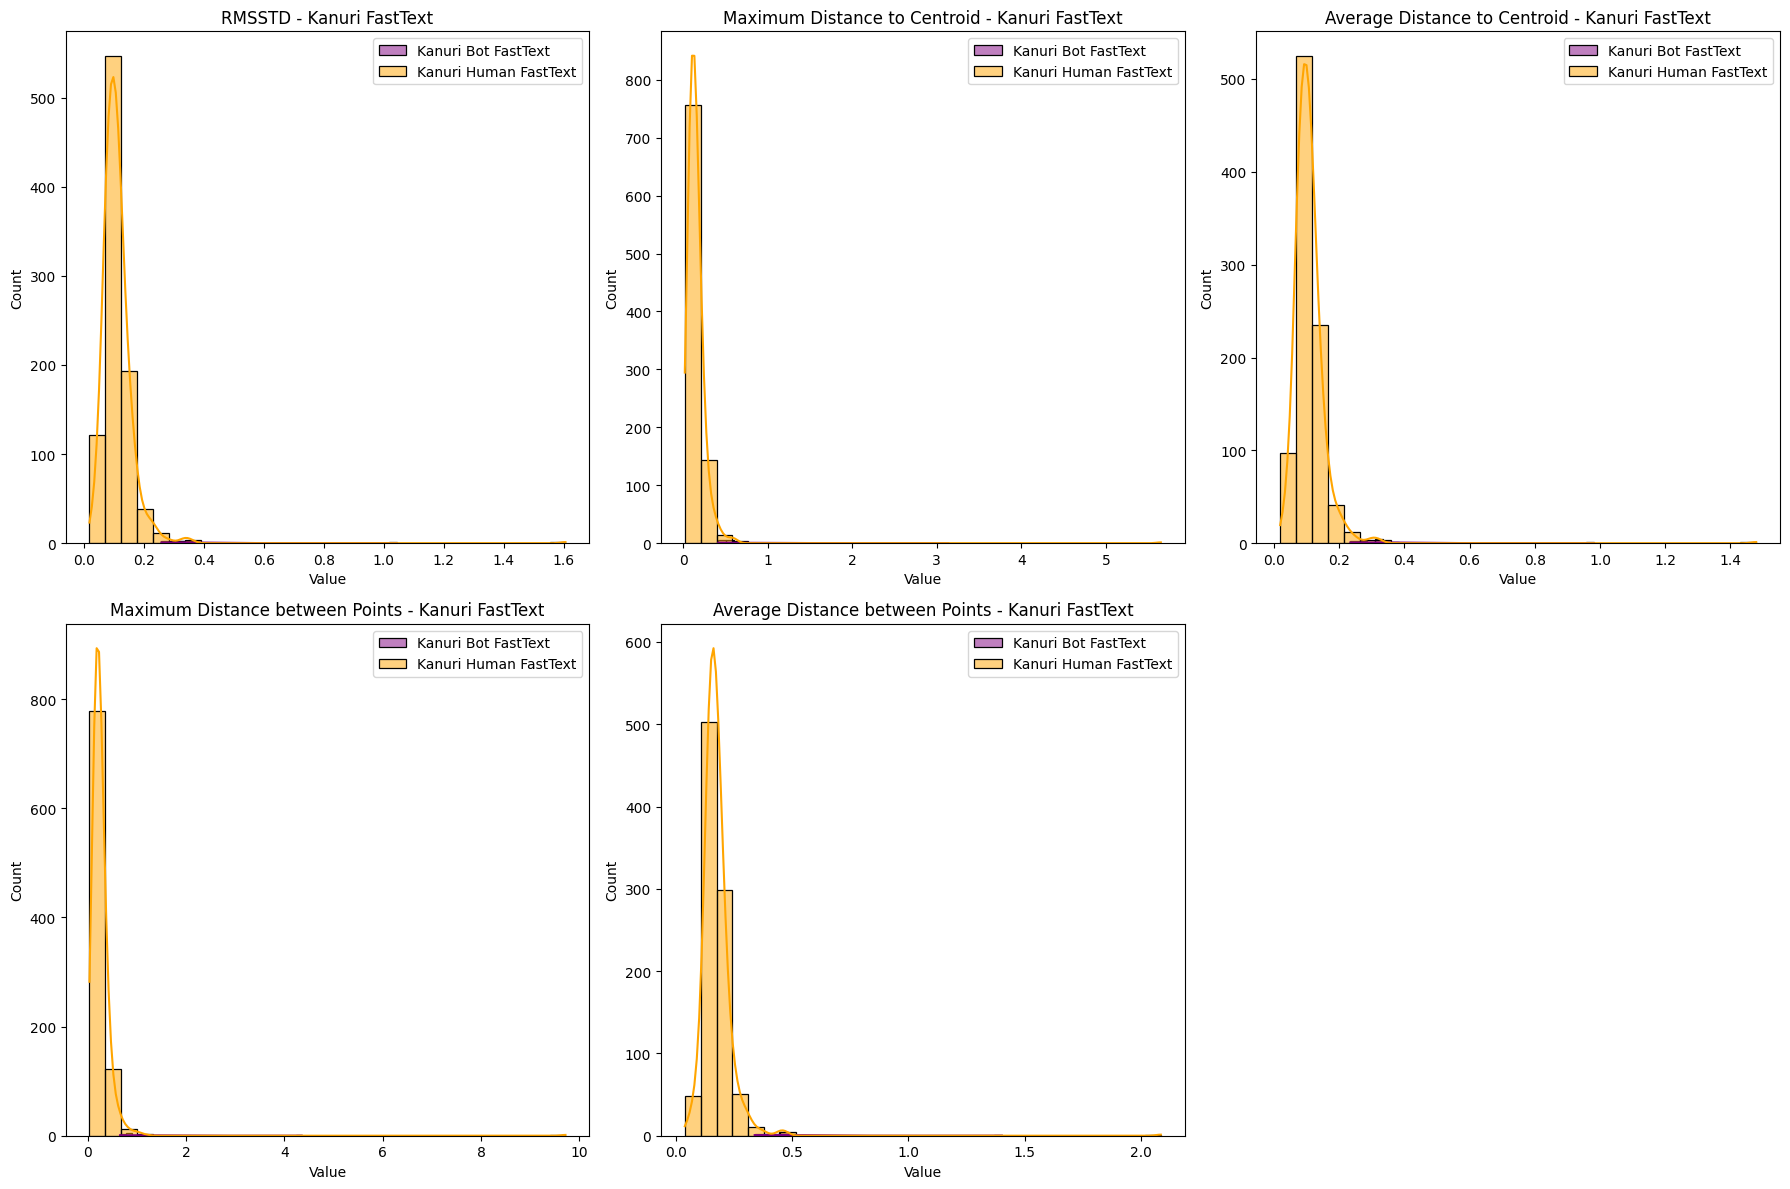

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

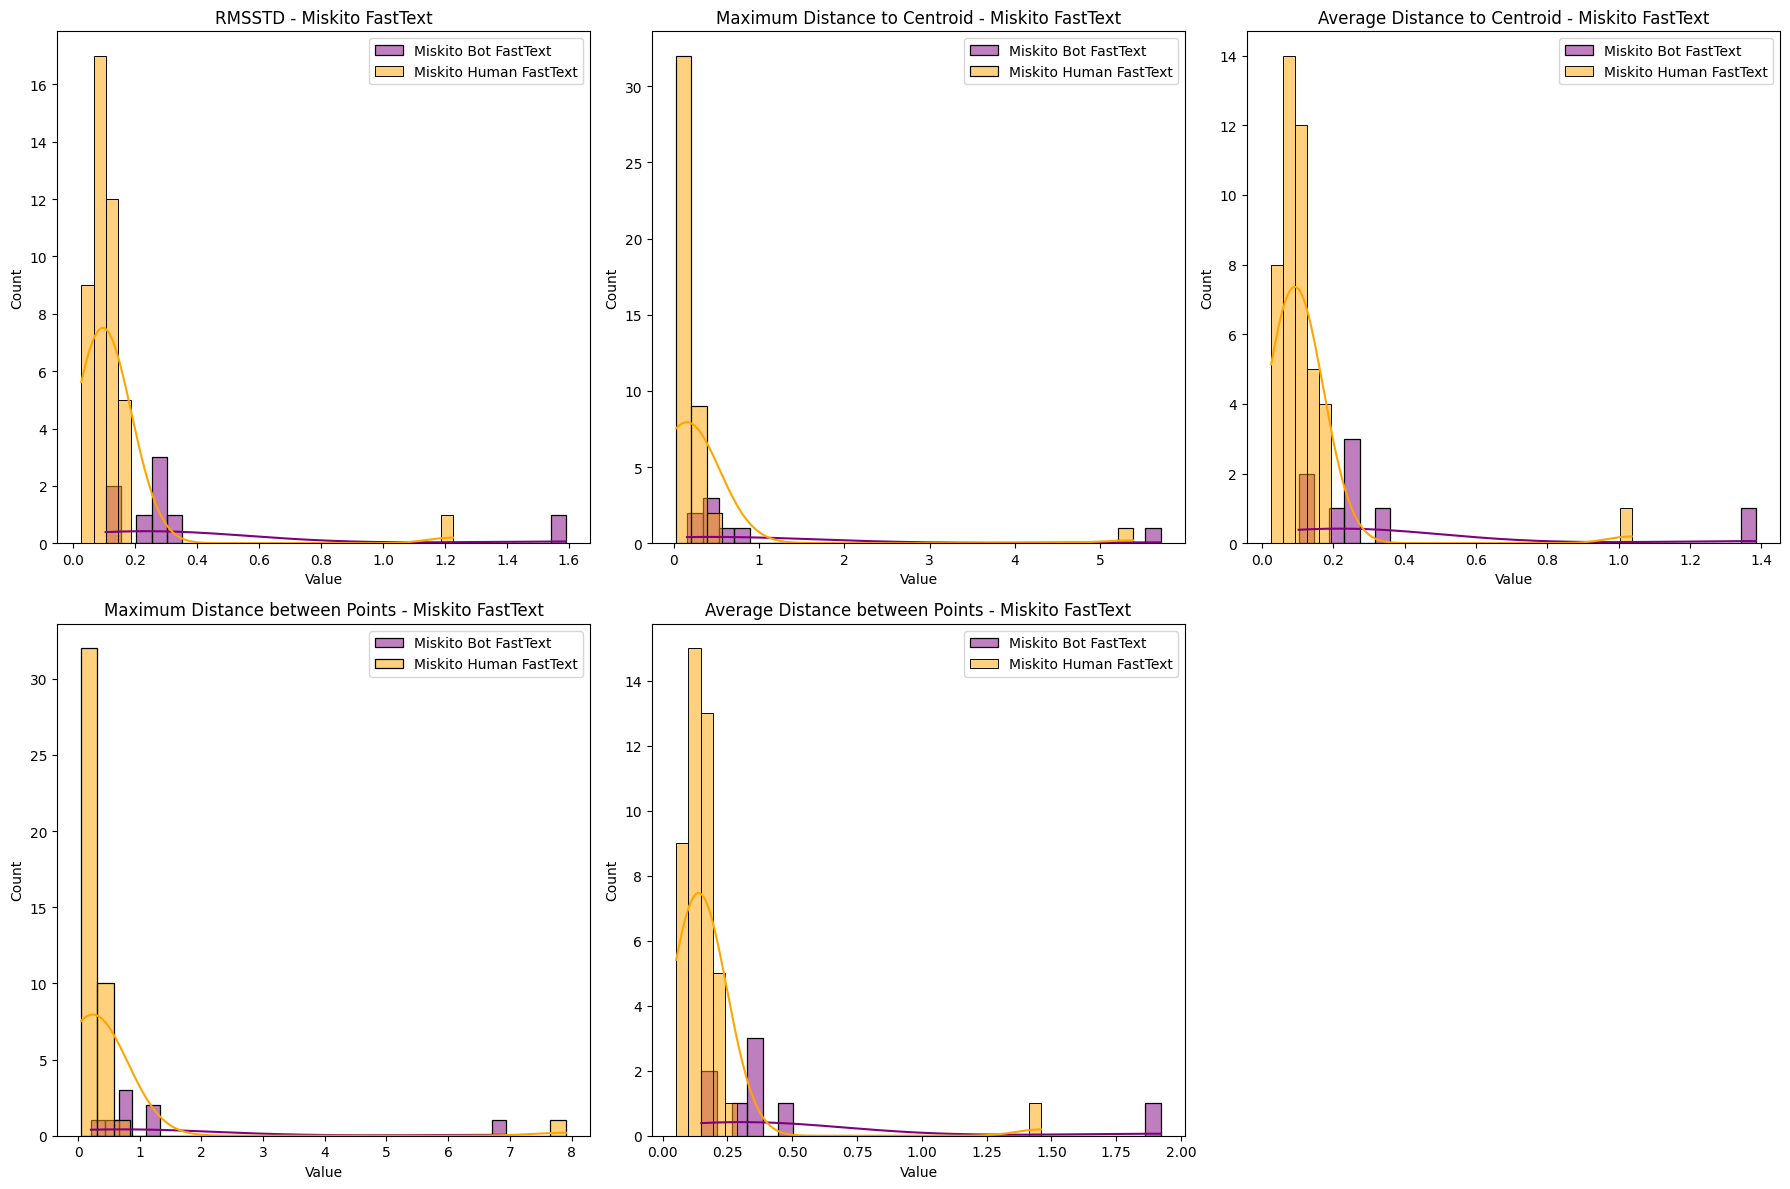

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV files
kanuri_bot_w2v_metrics = pd.read_csv('kanuri_bot_metrics.csv')
kanuri_human_w2v_metrics = pd.read_csv('kanuri_human_metrics.csv')
miskito_bot_w2v_metrics = pd.read_csv('miskito_bot_metrics.csv')
miskito_human_w2v_metrics = pd.read_csv('miskito_human_metrics.csv')
kanuri_bot_ft_metrics = pd.read_csv('kanuri_botft_metrics.csv')
kanuri_human_ft_metrics = pd.read_csv('kanuri_humanft_metrics.csv')
miskito_bot_ft_metrics = pd.read_csv('miskito_botft_metrics.csv')
miskito_human_ft_metrics = pd.read_csv('miskito_humanft_metrics.csv')

# List of metrics to plot
metrics_to_plot = ['RMSSTD', 'Maximum Distance to Centroid', 'Average Distance to Centroid',
                   'Maximum Distance between Points', 'Average Distance between Points']

# Function to plot histograms with KDE for each metric
def plot_histograms(data1, data2, label1, label2, title):
    num_metrics = len(metrics_to_plot)
    cols = 3
    rows = (num_metrics + cols - 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(18, 12))
    axs = axs.flatten()

    for i, metric in enumerate(metrics_to_plot):
        sns.histplot(data1[metric], bins=30, kde=True, color='purple', alpha=0.5, ax=axs[i], label=label1)
        sns.histplot(data2[metric], bins=30, kde=True, color='orange', alpha=0.5, ax=axs[i], label=label2)
        axs[i].set_title(f'{metric} - {title}')
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Count')
        axs[i].legend()

    # Remove any unused subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

# Plot histograms for each comparison
plot_histograms(kanuri_bot_w2v_metrics, kanuri_human_w2v_metrics, 'Kanuri Bot Word2Vec', 'Kanuri Human Word2Vec', 'Kanuri Word2Vec')
plot_histograms(miskito_bot_w2v_metrics, miskito_human_w2v_metrics, 'Miskito Bot Word2Vec', 'Miskito Human Word2Vec', 'Miskito Word2Vec')
plot_histograms(kanuri_bot_ft_metrics, kanuri_human_ft_metrics, 'Kanuri Bot FastText', 'Kanuri Human FastText', 'Kanuri FastText')
plot_histograms(miskito_bot_ft_metrics, miskito_human_ft_metrics, 'Miskito Bot FastText', 'Miskito Human FastText', 'Miskito FastText')


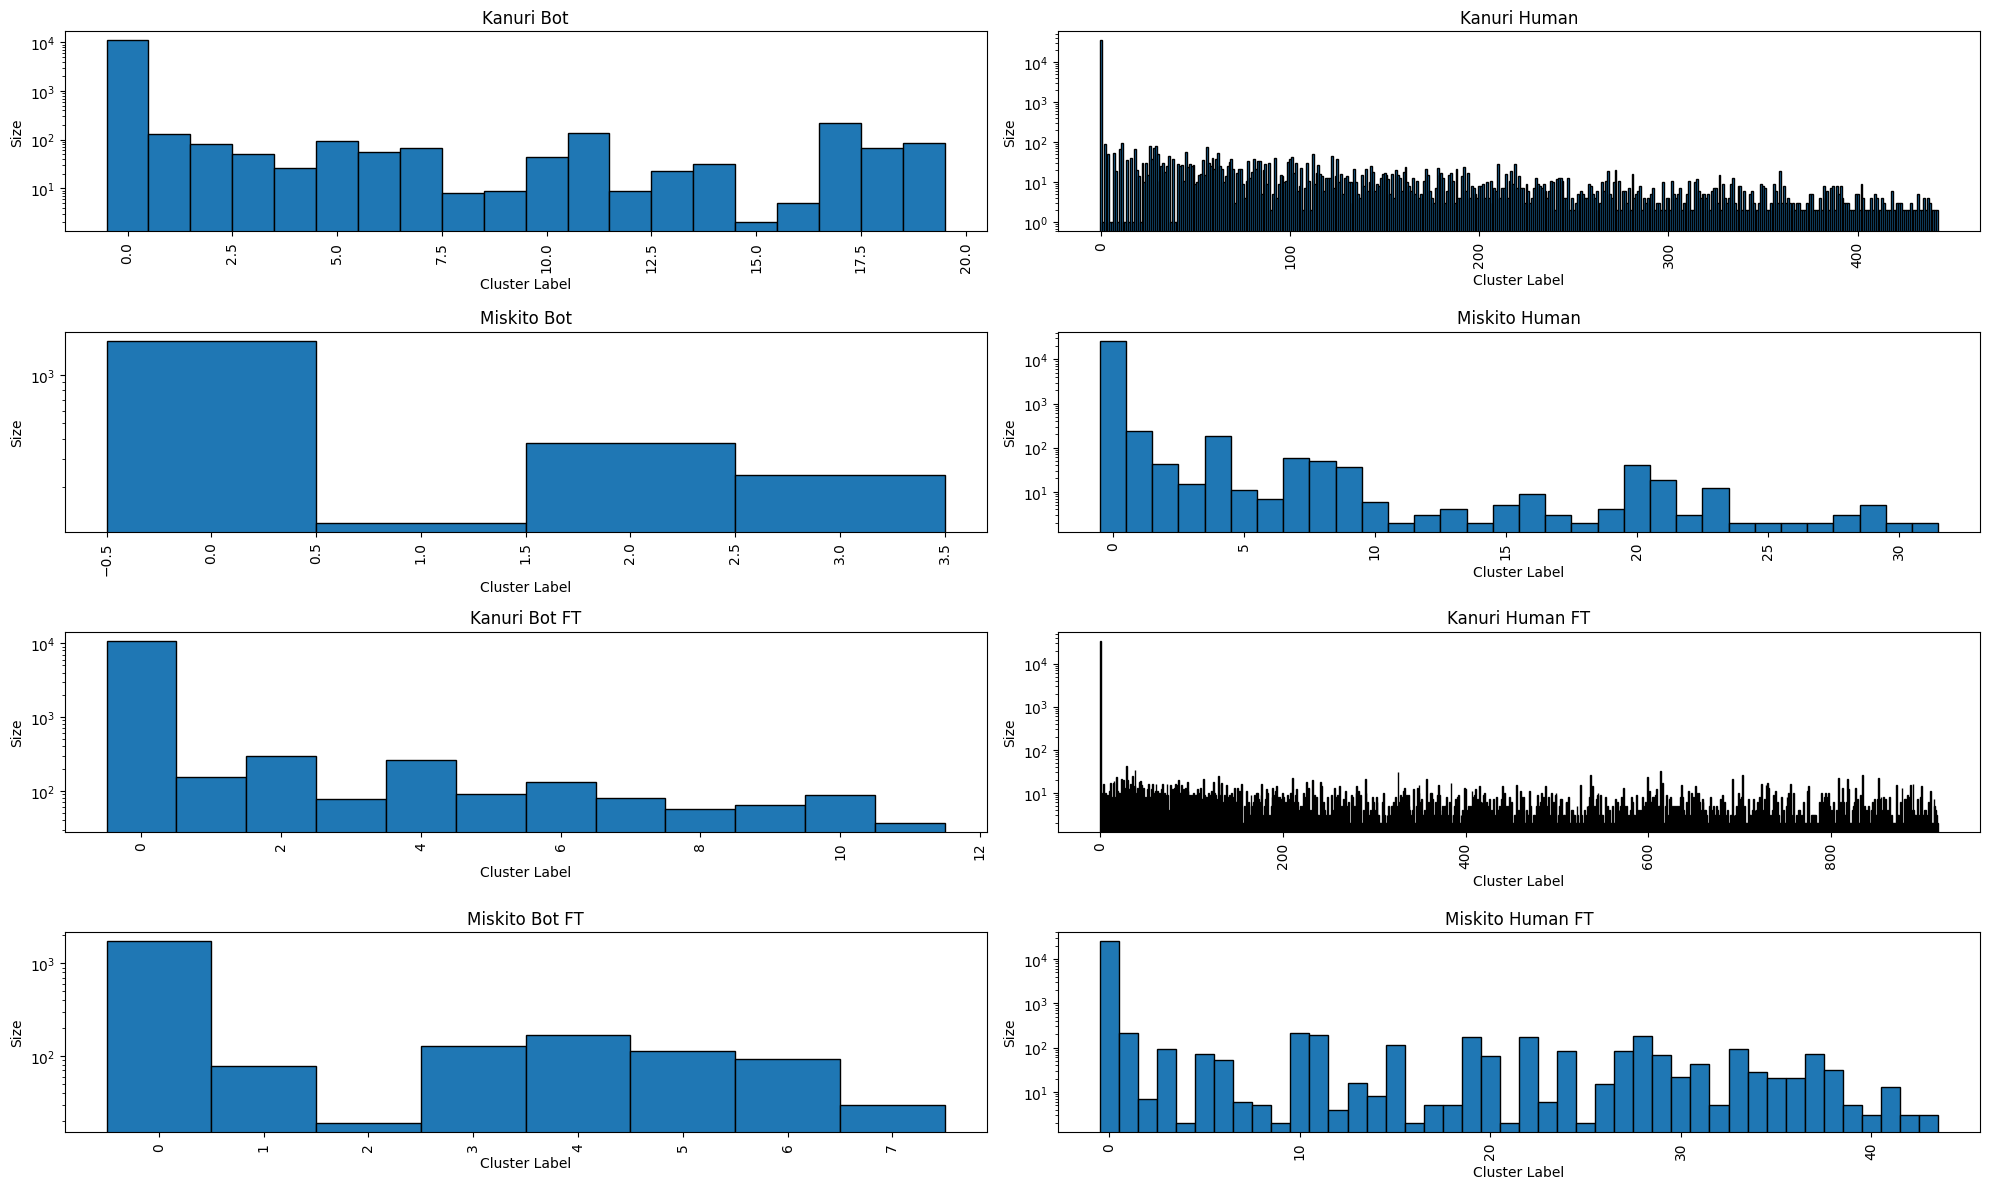

In [ ]:
#Plots for all labels

import matplotlib.pyplot as plt
from collections import Counter

# Create a list of all labels for easy iteration
label_sets = [labels_kb, labels_kh, labels_mb, labels_mh, labels_fkb, labels_fkh, labels_fmb, labels_fmh]
titles = ["Kanuri Bot", "Kanuri Human", "Miskito Bot", "Miskito Human",
          "Kanuri Bot FT", "Kanuri Human FT", "Miskito Bot FT", "Miskito Human FT"]

# Plotting
plt.figure(figsize=(20, 12))
for i, labels in enumerate(label_sets, 1):
    plt.subplot(4, 2, i)
    cluster_sizes = Counter(labels)
    sorted_cluster_sizes = sorted(cluster_sizes.items())
    sorted_labels, sorted_sizes = zip(*sorted_cluster_sizes)

    plt.bar(sorted_labels, sorted_sizes, width=1.0, edgecolor="black")
    plt.title(titles[i-1])
    plt.xlabel('Cluster Label')
    plt.ylabel('Size')
    plt.yscale('log')  # Logarithmic scale
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

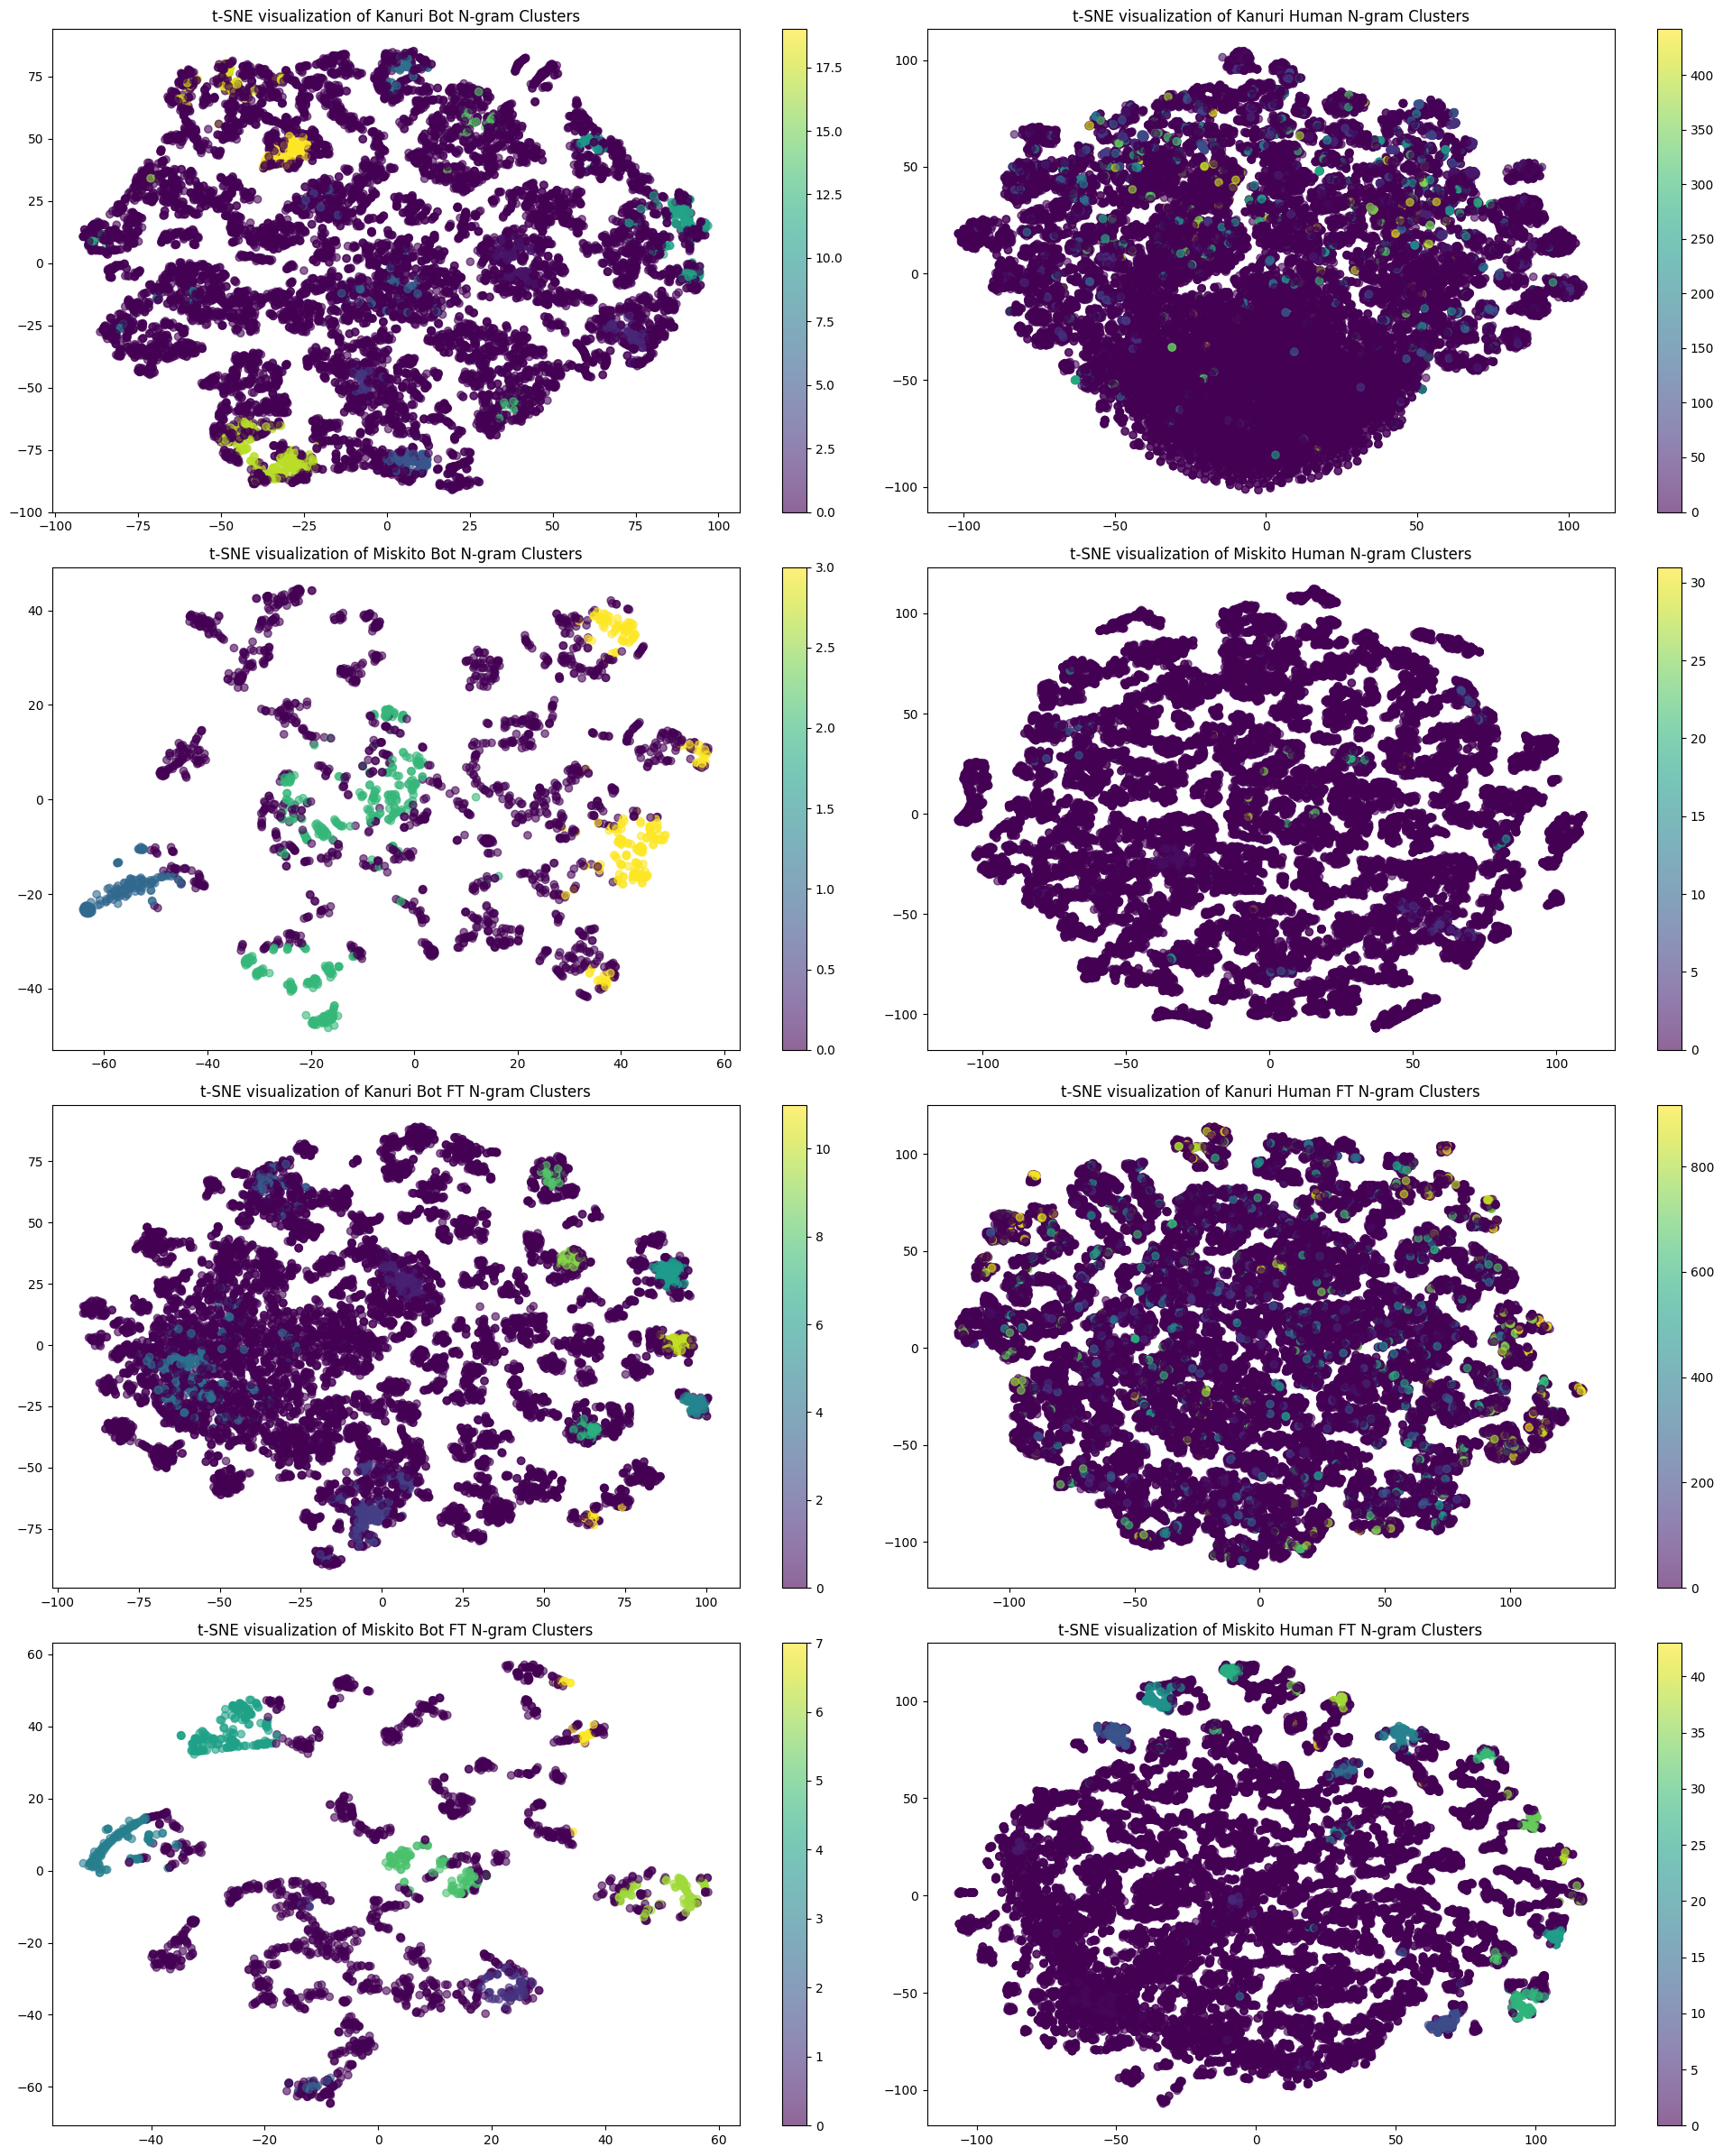

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# Function to find representative n-grams for each cluster
def find_representative_ngrams(ngrams, vectors, labels):
    # Check for out of bounds label indices
    if np.any(labels >= len(vectors)):
        raise ValueError("Label index exceeds vector bounds")

    unique_labels = np.unique(labels)
    representative_ngrams = {}

    for label in unique_labels:
        cluster_indices = np.where(labels == label)[0]
        if cluster_indices.size == 0:
            continue
        cluster_vectors = vectors[cluster_indices]
        cluster_center = np.mean(cluster_vectors, axis=0)
        distances = euclidean_distances(cluster_vectors, [cluster_center])
        min_index = np.argmin(distances)
        representative_ngram = ngrams[cluster_indices[min_index]]
        representative_ngrams[label] = representative_ngram

    return representative_ngrams

# lists of ngrams and vectors for each dataset
ngrams_lists = [ngrams_kanuri_bot, ngrams_kanuri_human, ngrams_miskito_bot, ngrams_miskito_human,
                ngrams_kanuri_bot_ft, ngrams_kanuri_human_ft, ngrams_miskito_bot_ft, ngrams_miskito_human_ft]
vectors_lists = [vectors_kanuri_bot, vectors_kanuri_human, vectors_miskito_bot, vectors_miskito_human,
                 vectors_kanuri_bot_ft, vectors_kanuri_human_ft, vectors_miskito_bot_ft, vectors_miskito_human_ft]

# list of all labels for easy iteration
label_sets = [labels_kb, labels_kh, labels_mb, labels_mh, labels_fkb, labels_fkh, labels_fmb, labels_fmh]
titles = ["Kanuri Bot", "Kanuri Human", "Miskito Bot", "Miskito Human",
          "Kanuri Bot FT", "Kanuri Human FT", "Miskito Bot FT", "Miskito Human FT"]

plt.figure(figsize=(20, 24))
for i, (labels, vectors, ngrams) in enumerate(zip(label_sets, vectors_lists, ngrams_lists), 1):
    plt.subplot(4, 2, i)

    # Ensure labels do not exceed vector bounds
    if max(labels) >= len(vectors):
        print(f"Skipping dataset {i} due to label index exceeding vector bounds.")
        continue

    # Calculate representative n-grams
    rep_ngrams = find_representative_ngrams(ngrams, vectors, labels)

    # Perform t-SNE
    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
    tsne_results = tsne.fit_transform(vectors)

    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)

    # Annotate representative n-grams
    """for label, ngram in rep_ngrams.items():
        indices = np.where(labels == label)[0]
        mean_x = np.mean(tsne_results[indices, 0])
        mean_y = np.mean(tsne_results[indices, 1])
        plt.annotate(ngram, (mean_x, mean_y), textcoords="offset points", xytext=(0,10), ha='center')"""

    plt.title(f't-SNE visualization of {titles[i-1]} N-gram Clusters')

plt.tight_layout()
plt.show()


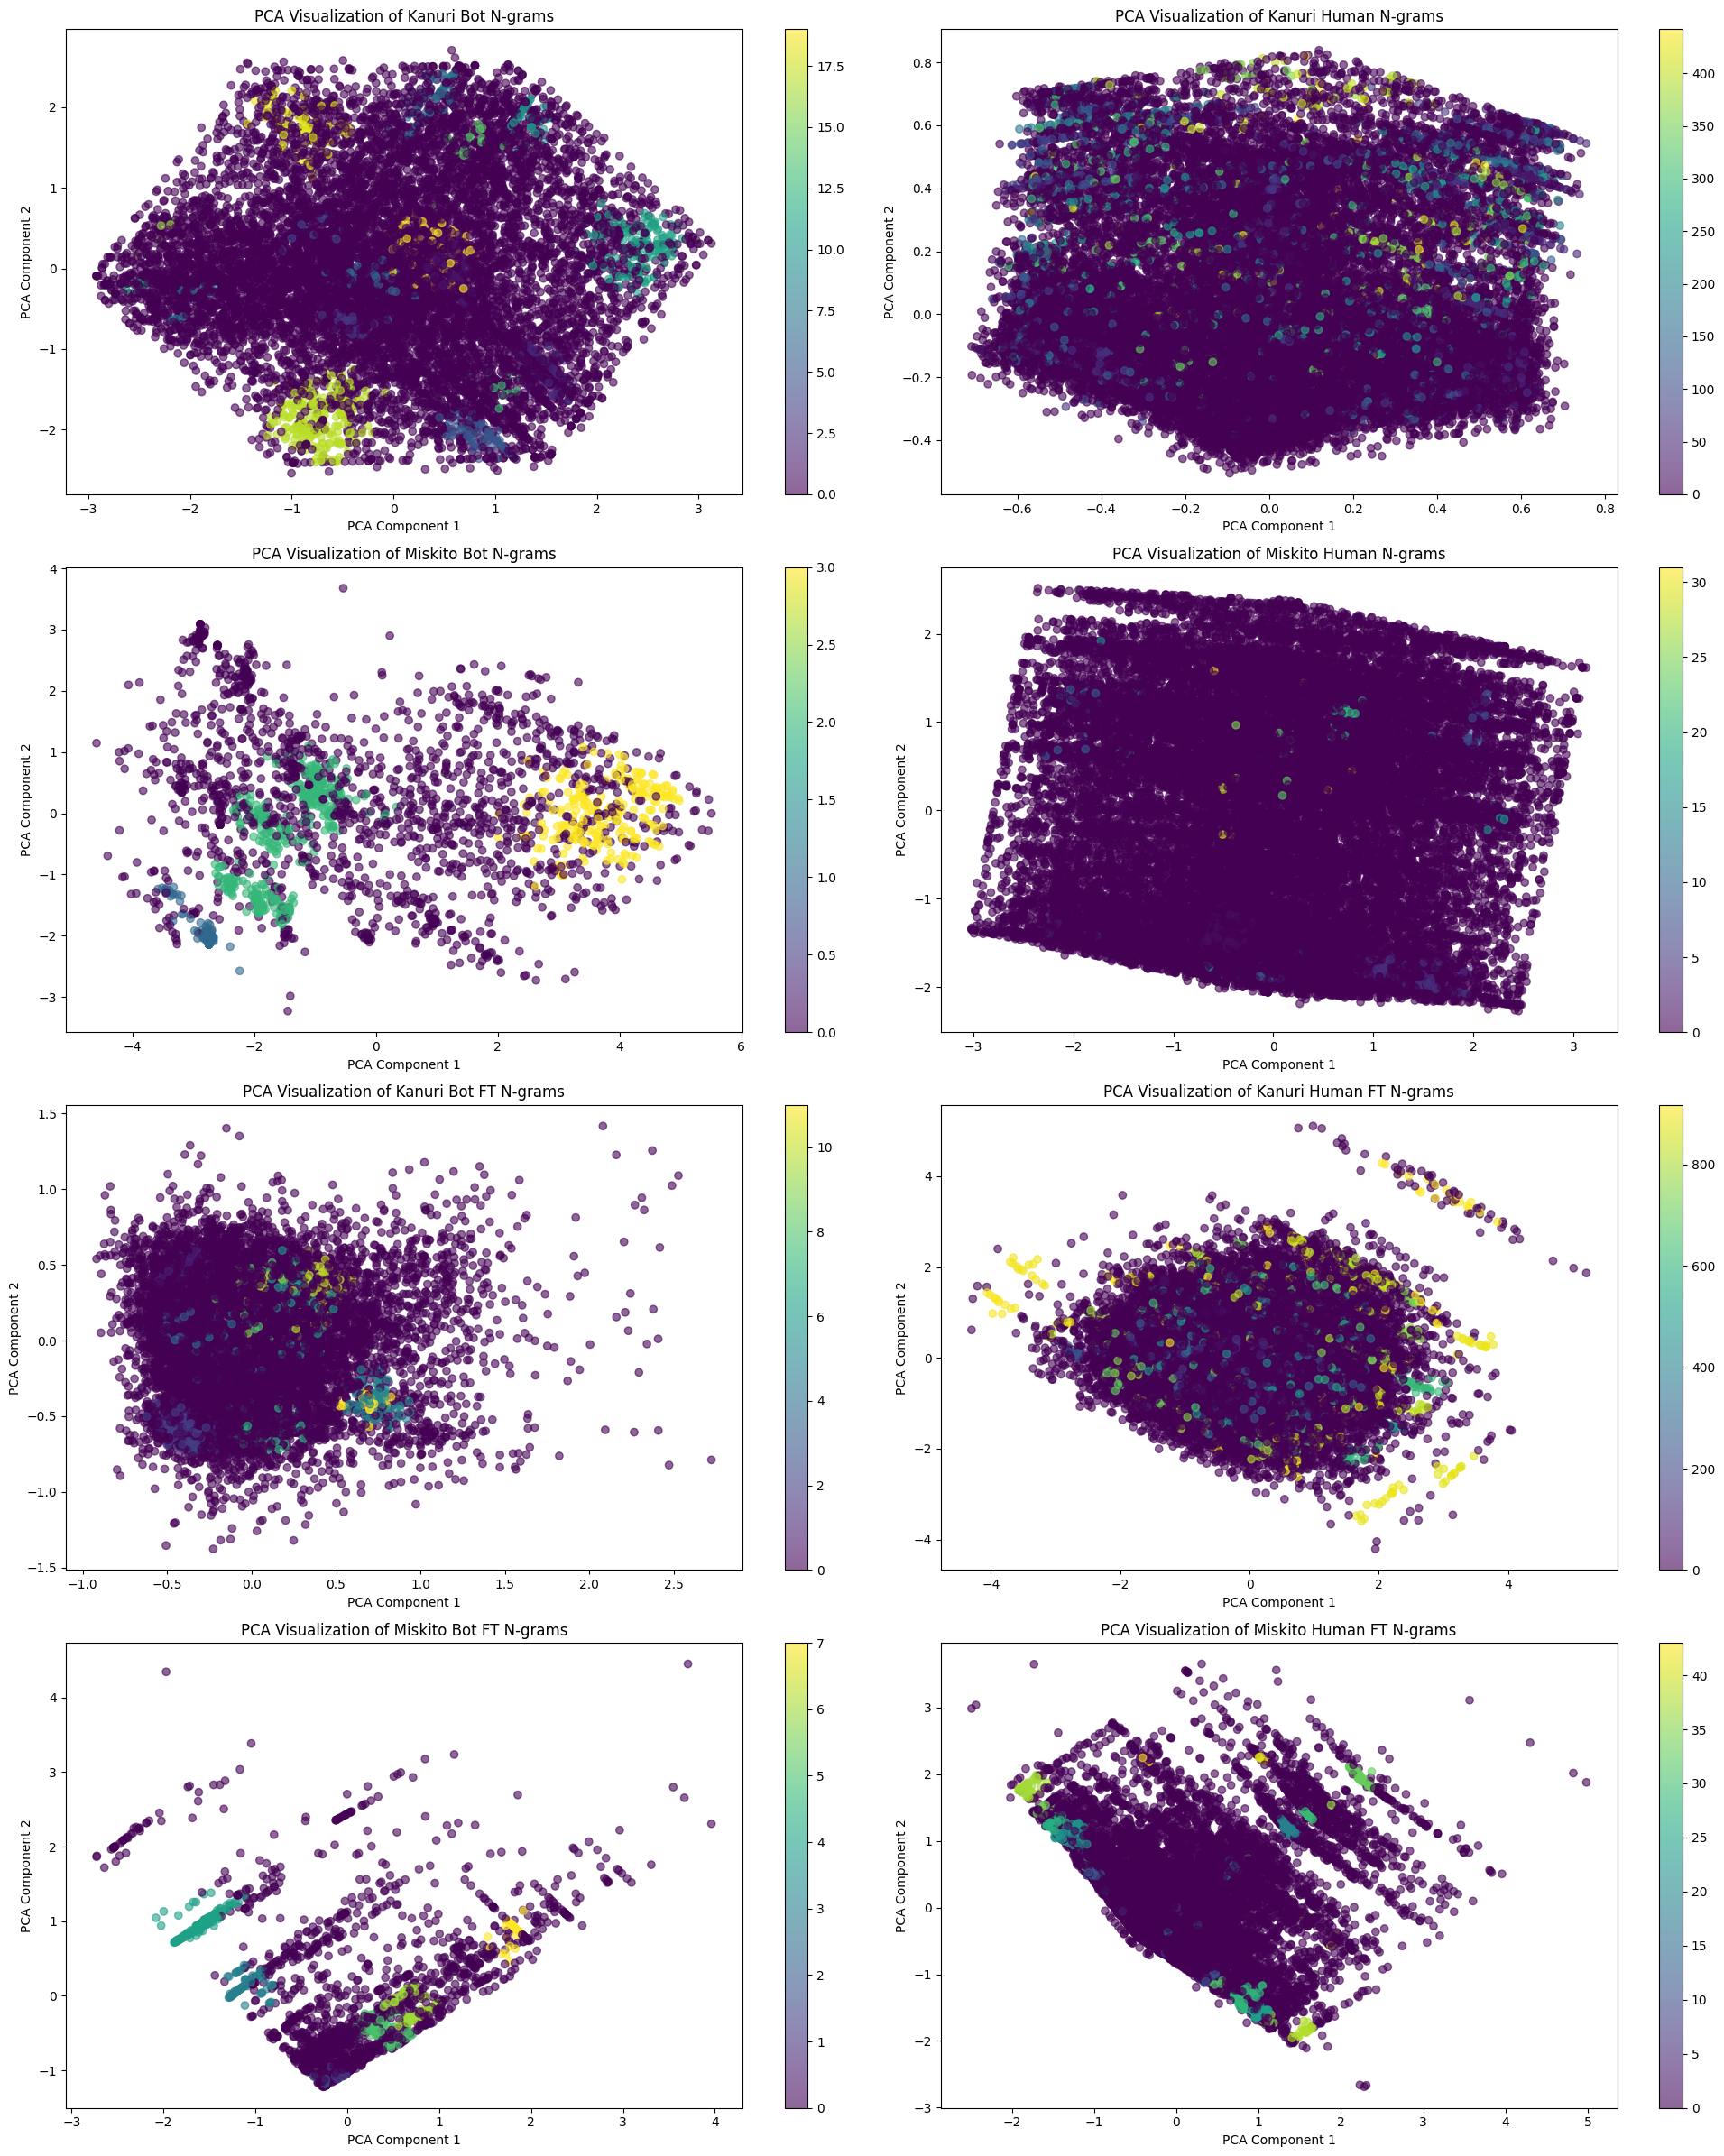

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have lists of vectors for each dataset
vectors_lists = [vectors_kanuri_bot, vectors_kanuri_human, vectors_miskito_bot, vectors_miskito_human,
                 vectors_kanuri_bot_ft, vectors_kanuri_human_ft, vectors_miskito_bot_ft, vectors_miskito_human_ft]

# Create a list of all labels for easy iteration
label_sets = [labels_kb, labels_kh, labels_mb, labels_mh, labels_fkb, labels_fkh, labels_fmb, labels_fmh]
titles = ["Kanuri Bot", "Kanuri Human", "Miskito Bot", "Miskito Human",
          "Kanuri Bot FT", "Kanuri Human FT", "Miskito Bot FT", "Miskito Human FT"]

plt.figure(figsize=(20, 24))
for i, (vectors, labels) in enumerate(zip(vectors_lists, label_sets), 1):
    plt.subplot(4, 2, i)
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(vectors)

    scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.colorbar(scatter)
    plt.title(f'PCA Visualization of {titles[i-1]} N-grams')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()
